In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import scipy.io as sio
from scipy.stats import bernoulli
import os
from mpl_toolkits.axes_grid.inset_locator import inset_axes

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_77346/3962609772.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


# Loading Data

In [2]:
def normalize(data, colName):
    data[colName] = (data[colName] - np.min(data[colName]))/ (np.max(data[colName]) - np.min(data[colName]))

def standardize(df, colName, newColName):
    df[newColName] =( df[colName] - df[colName].mean() ) / df[colName].std()

def findIntOrder(targetDf,trgtIdx):
    img = targetDf.loc[trgtIdx,'presentedImgs']
    seg = targetDf.loc[trgtIdx,'segPos'] - 1

    segImg = np.zeros((10,10))

    for i in range(len(seg)):
        row = seg[i,0]
        col = seg[i,1]

        segImg[row, col] = img[row, col]

    # Find the intensity order of the shown segment
    intOrder = np.max(segImg)

    return intOrder

def regenerateImgs(df,trgt):
    img = df.loc[trgt, 'segIntensity']
    seg = df.loc[trgt, 'segPos'] - 1 

    segImg = np.zeros((10,10))

    for i in range(len(seg)):
        row = seg[i,0]
        col = seg[i,1]

        segImg[row, col] = img[row, col]

    return segImg

def r_2(y_acc, y_model):
    residuals = y_acc - y_model
    SumResSquared = np.sum(residuals**2)
    TotalSumSquares = np.sum((y_acc - np.mean(y_acc))**2)
    RSquared = 1 - (SumResSquared/TotalSumSquares)

    return RSquared


In [3]:
file_pth ='data/all.csv'
df = pd.read_csv(file_pth)
df['eff_label'] = pd.cut(x=df['effortAll'], bins=[0, 0.048, 0.06, 13],
                     labels=['Easy', 'Normal', 'Difficult'])

In [4]:
# Store contrast values
idsAll = ['da','eb', 'go', 'js', 'mae', 're']
cntrst_all = [0.0384, 0.0175, 0.0276, 0.0197, 0.0160, 0.0121]

cntrst = dict()
for i, id in enumerate(idsAll):
    cntrst[id] = cntrst_all[i]

In [5]:
file_pth = 'data/all_img_cumNcuts.csv'

# Load all the cumulative Ncut values
allImgs = pd.read_csv(file_pth, header= None)

imgColNames = ['imgId', 'cutNo', 'ncut', 'stab','cumNcut']
allImgs.columns = imgColNames


# Previous Data

In [11]:
colNames = ['trialId','trialNo','blockNo','cutNo','expCond','control','keyCode',
            'reactionTime','segSize','segCenterX', 'segCenterY','segCentDist',
            'intDiff','intStd','segNcut','segStab', 'leaf','correct', 'meanImgInt',
            'meanSegInt','deltaInt']

myData = pd.read_csv('data/pilots/data_29.9/my_5blocks_3deg_twoSegs.csv', index_col=False, header=None)
myData.columns = colNames
myData.loc[myData['expCond'] == 1,'expTime'] = 0.5
myData.loc[myData['expCond'] == 2,'expTime'] = 0.8
myData['expType'] = 1

myData2 = pd.read_csv('data/pilots/data_29.9/my_5blocks_3deg_twoSegs_2.csv', index_col=False, header=None)
myData2.columns = colNames
myData2.loc[myData2['expCond'] == 1,'expTime'] = 0.3
myData2.loc[myData2['expCond'] == 2,'expTime'] = 0.8
myData2['expType'] = 2

myData3 = pd.read_csv('data/pilots/data_29.9/my_5blocks_3deg_twoSegs_3.csv', index_col=False, header=None)
myData3.columns = colNames
myData3.loc[myData3['expCond'] == 1,'expTime'] = 0.3
myData3.loc[myData3['expCond'] == 2,'expTime'] = 0.6
myData3['expType'] = 3

myData4 = pd.read_csv('data/pilots/data_29.9/my_5blocks_3deg_twoSegs_4.csv', index_col=False, header=None)
myData4.columns = colNames
myData4.loc[myData4['expCond'] == 1,'expTime'] = 0.3
myData4.loc[myData4['expCond'] == 2,'expTime'] = 0.9
myData4['expType'] = 4

myData5 = pd.read_csv('data/pilots/data_29.9/my_5blocks_3deg_twoSegs_5.csv', index_col=False, header=None)
myData5.columns = colNames
myData5.loc[myData5['expCond'] == 1,'expTime'] = 0.3
myData5.loc[myData5['expCond'] == 2,'expTime'] = 1
myData5['expType'] = 5


myData6 = pd.read_csv('data/pilots/data_6.10/my_5blocks_3deg_threeSegs_0.5.csv', index_col=False, header=None)
myData6.columns = colNames
myData6.loc[myData6['expCond'] == 1,'expTime'] = 0.5
myData6['expType'] = 6

myData7 = pd.read_csv('data/pilots/data_6.10/my_5blocks_3deg_threeSegs_0.6.csv', index_col=False, header=None)
myData7.columns = colNames
myData7.loc[myData7['expCond'] == 1,'expTime'] = 0.6
myData7['expType'] = 7

myData8 = pd.read_csv('data/pilots/data_6.10/my_5blocks_3deg_threeSegs_0.9.csv', index_col=False, header=None)
myData8.columns = colNames
myData8.loc[myData8['expCond'] == 1,'expTime'] = 0.9
myData8['expType'] = 8

rtList = [[0.5, 0.8], [0.3, 0.8], [0.3, 0.6],[0.3, 0.9], [0.3, 1]]


df = pd.concat([myData, myData2, myData3, myData4, myData5,myData6,myData7,myData8])
df['participantID'] = 'my'
df['deltaInt'] = df['deltaInt']

df = df.reset_index(drop=True)

# Define continuous variables
contVars = ['reactionTime', 'segSize', 'segCenterX', 'segCenterY', 'segCentDist',
            'intDiff','intStd','segNcut','segStab','meanImgInt', 'meanSegInt','deltaInt']

# Define factors
catVars = ['blockNo','cutNo','expTime','control','leaf','correct']


# Make -1 nCut Values 1
df.loc[df['segNcut'] == -1,'segNcut'] = 1

# Make negative reaction Times positive
df['reactionTime'] = np.abs(df['reactionTime'])

# Check for missed trials
if len(df.loc[df['keyCode'].isnull()]) > 0:
    idxMissed = df.loc[df['keyCode'].isnull()].index[0]
    df = df.drop(idxMissed)

# Normalize your data
for i in contVars:
    normalize(df, i)

In [12]:
df.groupby(['participantID','cutNo','expTime'],as_index=True)['correct'].count()

participantID  cutNo  expTime
my             2      0.3        160
                      0.5        120
                      0.6        120
                      0.8         80
                      0.9        120
                      1.0         40
               3      0.5         80
                      0.6         80
                      0.9         80
               5      0.3        160
                      0.5        120
                      0.6        120
                      0.8         80
                      0.9        120
                      1.0         40
Name: correct, dtype: int64

<Figure size 1600x1000 with 0 Axes>

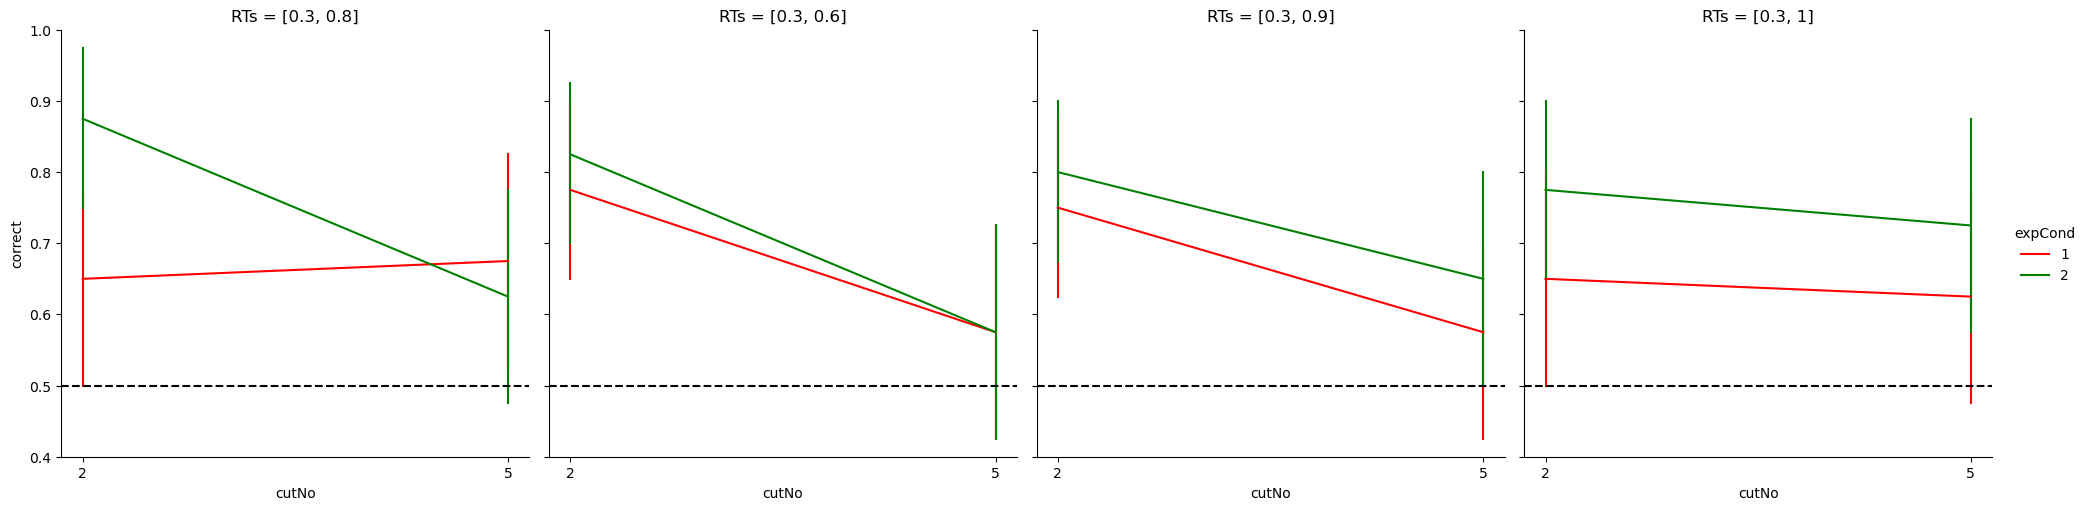

In [16]:
rtList = [[0.3, 0.8], [0.3, 0.6],[0.3, 0.9], [0.3, 1]]

fig = plt.figure(figsize=(16,10))
accPlot = sns.relplot(
    data=df[(df['expType'] < 5) & (df['expType'] != 0)], x="cutNo", y="correct",
    col="expType",
    hue="expCond",
    kind="line", err_style = 'bars',
    palette=['r','g']
)
#accPlot.legend.set_label(['Short', 'Long'])

axs = accPlot.axes
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        axs[row,col].axhline(0.5,ls = '--', color = 'k')
        axs[row,col].set_title('RTs = {}'.format(rtList[col]))        
        axs[row,col].set_xticks([2,5])

accPlot.set(ylim = (0.4,1))


ValueError: The palette list has the wrong number of colors.

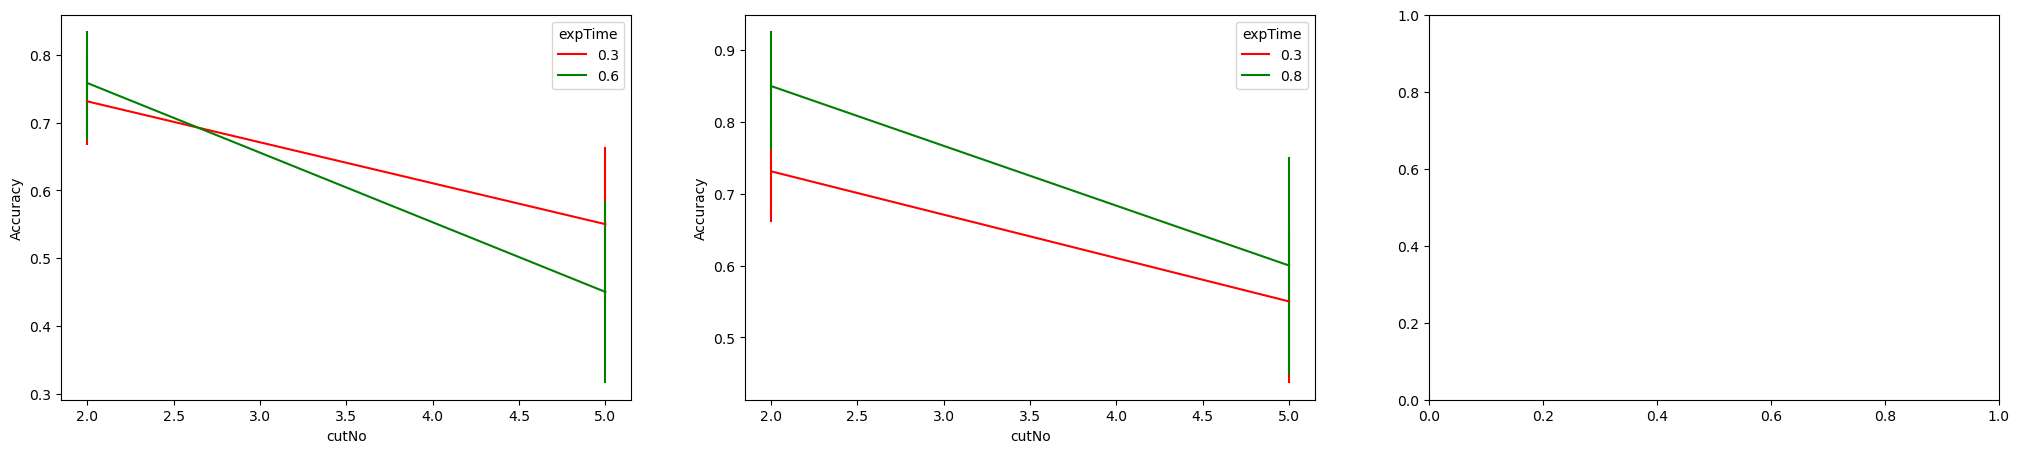

In [17]:
df_comp = df[(df['cutNo']== 2) | (df['cutNo']== 5) & (df['control'] == 0)]

fig = plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.lineplot(data = df_comp[(df_comp['expTime']== 0.3) | (df_comp['expTime']== 0.6) ], x = 'cutNo', y = 'correct', err_style='bars', hue='expTime', palette=['r','g'] )
plt.ylabel('Accuracy')

plt.subplot(1,3,2)
sns.lineplot(data = df_comp[(df_comp['expTime']== 0.3) | (df_comp['expTime']== 0.8) ], x = 'cutNo', y = 'correct', err_style='bars', hue='expTime', palette=['r','g'] )
plt.ylabel('Accuracy')

plt.subplot(1,3,3)
sns.lineplot(data = df_comp[(df_comp['expTime']== 0.3) | (df_comp['expTime']== 2) ], x = 'cutNo', y = 'correct', err_style='bars', hue='expTime', palette=['r','g'] )
plt.ylabel('Accuracy')

fig.suptitle('Exposure Time Comparison')
figname = 'figs/ExpTimeControlComparison.png'
#plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [ ]:
y_mean = df_comp_cont0.groupby(['cutNo','expTime'],as_index=False)['correct'].mean()
y_mean

ValueError: 'x' and 'y' must have the same size

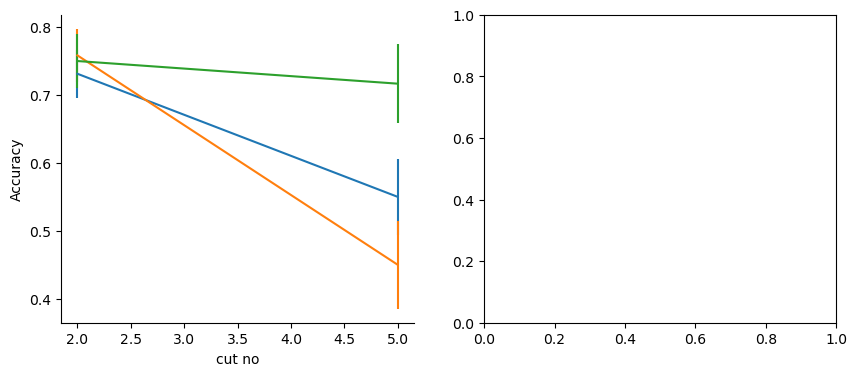

In [18]:
df_comp_cont0 = df[(df['cutNo']== 2) | (df['cutNo']== 5) & (df['control'] == 0)]
df_comp_cont1 = df[(df['cutNo']== 2) | (df['cutNo']== 5) & (df['control'] == 1)]

fig, ax = plt.subplots(1,2,figsize=(10,4))

error = df_comp_cont0.groupby(['cutNo','expTime'],as_index=False)['correct'].sem()
error_03 = error.loc[(error['expTime'] == 0.3), 'correct']
error_06 = error.loc[(error['expTime'] == 0.6), 'correct']
error_09 = error.loc[(error['expTime'] == 0.9), 'correct']
error_2 =  error.loc[(error['expTime'] == 2), 'correct']

y_mean = df_comp_cont0.groupby(['cutNo','expTime'],as_index=False)['correct'].mean()
y_mean_03 = y_mean.loc[(y_mean['expTime'] == 0.3),'correct']
y_mean_06 = y_mean.loc[(y_mean['expTime'] == 0.6),'correct']
y_mean_09 = y_mean.loc[(y_mean['expTime'] == 0.9),'correct']
y_mean_2 = y_mean.loc[(y_mean['expTime'] == 2),'correct']

x = [2,5]

# Compute upper and lower bounds
lower_03 = y_mean_03 - error_03
upper_03 = y_mean_03 + error_03

lower_06 = y_mean_06 - error_06
upper_06 = y_mean_06 + error_06

lower_09 = y_mean_09 - error_09
upper_09 = y_mean_09 + error_09

lower_2 = y_mean_2 - error_2
upper_2 = y_mean_2 + error_2

ax[0].errorbar(x, y_mean_03, yerr = error_03, label='0.3s')
ax[0].set_xlabel('cut no')
ax[0].set_ylabel('Accuracy')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].errorbar(x, y_mean_06, yerr = error_06, label='0.6s')
ax[0].set_xlabel('cut no')
ax[0].set_ylabel('Accuracy')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].errorbar(x, y_mean_09, yerr = error_09, label='0.9s')
ax[0].set_xlabel('cut no')
ax[0].set_ylabel('Accuracy')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].errorbar(x, y_mean_2, yerr = error_2, label='2s')
ax[0].set_xlabel('cut no')
ax[0].set_ylabel('Accuracy')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].set_xticks([2,5])
ax[0].axhline(0.5,ls = '--', color = 'k')    
ax[0].legend(loc = 'lower left')
ax[0].set_title('Test')

# Plot Control only conditions
error = df_comp_cont1.groupby(['cutNo','expTime'],as_index=False)['correct'].sem()
error_03 = error.loc[(error['expTime'] == 0.3), 'correct']
error_06 = error.loc[(error['expTime'] == 0.6), 'correct']
error_09 = error.loc[(error['expTime'] == 0.9), 'correct']
error_2 =  error.loc[(error['expTime'] == 2), 'correct']

y_mean = df_comp_cont1.groupby(['cutNo','expTime'],as_index=False)['correct'].mean()
y_mean_03 = y_mean.loc[(y_mean['expTime'] == 0.3),'correct']
y_mean_06 = y_mean.loc[(y_mean['expTime'] == 0.6),'correct']
y_mean_09 = y_mean.loc[(y_mean['expTime'] == 0.9),'correct']
y_mean_2 = y_mean.loc[(y_mean['expTime'] == 2),'correct']

x = [2,5]

# Compute upper and lower bounds
lower_03 = y_mean_03 - error_03
upper_03 = y_mean_03 + error_03

lower_06 = y_mean_06 - error_06
upper_06 = y_mean_06 + error_06

lower_09 = y_mean_09 - error_09
upper_09 = y_mean_09 + error_09

lower_2 = y_mean_2 - error_2
upper_2 = y_mean_2 + error_2

ax[1].errorbar(x, y_mean_03, yerr = error_03, label='0.3s')
ax[1].set_xlabel('cut no')
ax[1].set_ylabel('Accuracy')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].errorbar(x, y_mean_06, yerr = error_06, label='0.6s')
ax[1].set_xlabel('cut no')
ax[1].set_ylabel('Accuracy')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)


ax[1].errorbar(x, y_mean_09, yerr = error_09, label='0.9s')
ax[1].set_xlabel('cut no')
ax[1].set_ylabel('Accuracy')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].errorbar(x, y_mean_2, yerr = error_2, label='2s')
ax[1].set_xlabel('cut no')
ax[1].set_ylabel('Accuracy')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].set_xticks([2,5])
ax[1].axhline(0.5,ls = '--', color = 'k')    
ax[1].legend()
ax[1].set_title('Control')

fig.suptitle('Exposure Time Comparison')

figname = 'figs/ExpTimeComparison.png'
#plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)


In [22]:
df_comp_cont0.expTime.unique()

array([0.8, 0.5, 0.3, 0.6, 0.9, 1. ])

In [31]:
pilotDf = df
file_pth = 'data/pilotData.csv'
pilotDf.to_csv(file_pth,index=False)

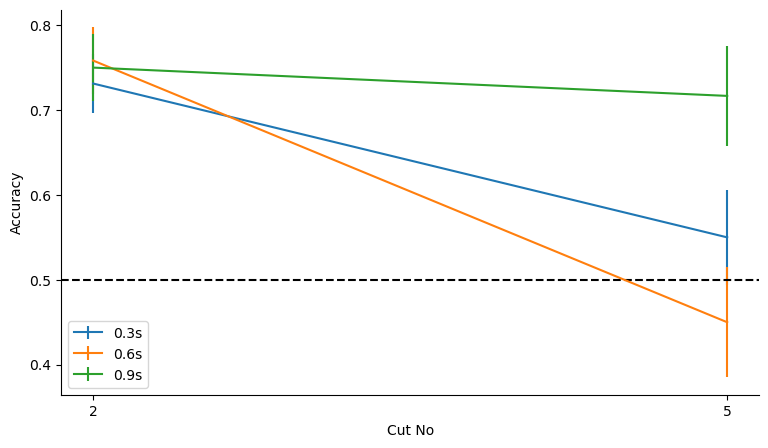

In [28]:
df_comp_cont0 = df[(df['cutNo']== 2) | (df['cutNo']== 5) & (df['control'] == 0)]

fig, ax = plt.subplots(figsize=(9,5))

error = df_comp_cont0.groupby(['cutNo','expTime'],as_index=False)['correct'].sem()
error_03 = error.loc[(error['expTime'] == 0.3), 'correct']
error_06 = error.loc[(error['expTime'] == 0.6), 'correct']
error_09 = error.loc[(error['expTime'] == 0.9), 'correct']
error_1 =  error.loc[(error['expTime'] == 1), 'correct']

y_mean = df_comp_cont0.groupby(['cutNo','expTime'],as_index=False)['correct'].mean()
y_mean_03 = y_mean.loc[(y_mean['expTime'] == 0.3),'correct']
y_mean_06 = y_mean.loc[(y_mean['expTime'] == 0.6),'correct']
y_mean_09 = y_mean.loc[(y_mean['expTime'] == 0.9),'correct']
y_mean_1 = y_mean.loc[(y_mean['expTime'] == 1),'correct']

x = [2,5]

# Compute upper and lower bounds
lower_03 = y_mean_03 - error_03
upper_03 = y_mean_03 + error_03

lower_06 = y_mean_06 - error_06
upper_06 = y_mean_06 + error_06

lower_09 = y_mean_09 - error_09
upper_09 = y_mean_09 + error_09

lower_1 = y_mean_1 - error_1
upper_1 = y_mean_1 + error_1

ax.errorbar(x, y_mean_03, yerr = error_03, label='0.3s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_06, yerr = error_06, label='0.6s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_09, yerr = error_09, label='0.9s')
ax.set_xlabel('Cut No')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks([2,5])
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend(loc = 'lower left')
#ax.set_title('Test')

figname = 'figs/ExpTimeComparison.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [ ]:
df_comp = df[(df['cutNo']== 2) | (df['cutNo']== 5) & (df['control'] == 1)]

plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.lineplot(data = df_comp[(df_comp['expTime']== 0.3) | (df_comp['expTime']== 0.6) ], x = 'cutNo', y = 'correct', err_style='bars', hue='expTime', palette=['r','g'] )

plt.subplot(1,3,2)
sns.lineplot(data = df_comp[(df_comp['expTime']== 0.3) | (df_comp['expTime']== 0.8) ], x = 'cutNo', y = 'correct', err_style='bars', hue='expTime', palette=['r','g'] )

plt.subplot(1,3,3)
sns.lineplot(data = df_comp[(df_comp['expTime']== 0.3) | (df_comp['expTime']== 2) ], x = 'cutNo', y = 'correct', err_style='bars', hue='expTime', palette=['r','g'] )

In [ ]:
fig = plt.figure(figsize=(16,10))
accPlot = sns.relplot(
    data=df[(df['expTime']!= 0.5) & ((df['cutNo']== 2) | (df['cutNo']== 5) | (df['cutNo']== 3))], x="cutNo", y="correct",
    col="expTime", row = 'control',
    kind="line", err_style = 'bars',
    palette=['r','g']
)

axs = accPlot.axes
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        axs[row,col].axhline(0.5,ls = '--', color = 'k')    
        axs[row,col].set_xticks([2,3,5])

fig.tight_layout()
accPlot.set(ylim = (0.4,1))
figname = 'figs/ExpTimeControlComparison.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [ ]:
df.groupby(by = ['expTime','cutNo','control'], as_index= False)['keyCode'].count()

In [ ]:
plt.figure(figsize=(16,10))
accPlot = sns.relplot(
    data=df[df['control']==0], x="cutNo", y="correct",
    col="expTime",
    kind="line", err_style = 'bars',
    palette=['r','g']
)

axs = accPlot.axes
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        axs[row,col].axhline(0.5,ls = '--', color = 'k')    
        axs[row,col].set_xticks([2,3,5])

accPlot.set(ylim = (0.4,1))


In [ ]:
plt.figure(figsize=(16,10))
accPlot = sns.relplot(
    data=df[df['control']==1], x="cutNo", y="correct",
    col="expTime",
    kind="line", err_style = 'bars',
    palette=['r','g']
)

axs = accPlot.axes
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        axs[row,col].axhline(0.5,ls = '--', color = 'k')    
        axs[row,col].set_xticks([2,3,5])

accPlot.set(ylim = (0.4,1))

In [ ]:
df.to_csv('data/data_rt_comp_all.csv', index = False)

$f(\pi) = logit(\pi) = ln(\frac{\pi}{1 - \pi}) = \beta_0 + \beta_1 \cdot cutNo5 + \beta_2 \cdot expTime2 + \beta_3 \cdot cutNo5:expTime2$

$\pi = E(y|X)$

# 21.10 - Results with Threshold Experiment, Leaf Only

In [ ]:
colNames = ['trialId','trialNo','blockNo','cutNo','expCond','control','keyCode',
            'reactionTime','segSize','segCenterX', 'segCenterY','segCentDist',
            'intDiff','intStd','segNcut','segStab', 'leaf','correct', 'meanImgInt',
            'meanSegInt','deltaInt']

myData = pd.read_csv('data/data_21.10/my_sensitivity_exp1.csv', index_col=False, header=None)
myData.columns = colNames
myData.loc[myData['expCond'] == 1,'expTime'] = 0.5
myData.loc[myData['expCond'] == 2,'expTime'] = 0.8


myData2 = pd.read_csv('data/data_21.10/my_sensitivity_exp2.csv', index_col=False, header=None)
myData2.columns = colNames
myData2.loc[myData2['expCond'] == 1,'expTime'] = 1

df = pd.concat([myData, myData2])
df['participantID'] = 'my'
df['deltaInt'] = df['deltaInt']

df = df.reset_index(drop=True)

# Define continuous variables
contVars = ['reactionTime', 'segSize', 'segCenterX', 'segCenterY', 'segCentDist',
            'intDiff','intStd','meanImgInt', 'meanSegInt','deltaInt']

# Define factors
catVars = ['blockNo','cutNo','expTime','control','leaf','correct']

# Make -1 nCut Values 1
df.loc[df['segNcut'] == -1,'segNcut'] = 1

# Make negative reaction Times positive
df['reactionTime'] = np.abs(df['reactionTime'])


data = ['my_1blocks_3deg_thrExp_comp_leaf.mat', 'my_2blocks_3deg_thrExp_comp_leaf.mat', 'my_3blocks_3deg_thrExp_comp_leaf.mat', 'my_4blocks_3deg_thrExp_comp_leaf.mat', 'my_1exp_3blocks_3deg_thrExp_leaf.mat']

for i,j in enumerate(data):
    mat_fname = ('data/data_21.10/dataNonFiltered/' + j)
    mat_contents = sio.loadmat(mat_fname)

    if i == 0:
        presentedImgs = mat_contents['presentedSegs'][:,3]    
        segPos = mat_contents['presentedSegs'][:,4]
    
    else:
        presentedImgs = np.concatenate((presentedImgs, mat_contents['presentedSegs'][:,3]), axis=0)
        segPos = np.concatenate((segPos, mat_contents['presentedSegs'][:,4]), axis=0)

    
df['presentedImgs'] = presentedImgs
df['segPos'] = segPos
df['intVals'] = pd.Series([np.reshape(mat_contents['settings'][1][0],-1)]*len(df))
df['intDelta'] = mat_contents['settings'][4][0][0][0]
df['date'] = '21102022'
df['nmcPars'] = pd.Series([np.reshape(mat_contents['settings'][2][0],-1)]*len(df))


# Arrange positions
participantId = df.pop('participantID')
df.insert(0,'participantID',participantId)

expData = df.pop('date')
df.insert(1,'date',expData)


Read .mat files from matlab

In [ ]:
path =r'/Users/mehmetyoruten/Library/CloudStorage/OneDrive-bwedu/Documents/School/Master/CPI Lab/Thesis/Experiment/behavioral analyses/data/data_26.10/'
list_of_files = []

for file in os.listdir(path):
    if file.endswith(".mat"):
        list_of_files.append(file)

num_trials = []
for i,j in enumerate(list_of_files):
    mat_fname = (path + j)
    mat_contents = sio.loadmat(mat_fname)

    if i == 0:
        presentedImgs = mat_contents['presentedSegs'][:,3]    
        segPos = mat_contents['presentedSegs'][:,4]
        respMatrix = mat_contents['respMatrix']
        num_trials.append(respMatrix.shape[0])
    else:
        newPresentedImg = mat_contents['presentedSegs'][:,3]
        presentedImgs = np.concatenate((presentedImgs, newPresentedImg), axis=0)

        newSegPos = mat_contents['presentedSegs'][:,4]
        segPos = np.concatenate((segPos, newSegPos), axis=0)

        newRespMatrix = mat_contents['respMatrix']
        num_trials.append(newRespMatrix.shape[0])
        respMatrix = np.concatenate((respMatrix, newRespMatrix), axis=0)


colNames = ['trialId','trialNo','blockNo','cutNo','expCond','control','keyCode',
            'reactionTime','segSize','segCenterX', 'segCenterY','segCentDist',
            'intDiff','intStd','segNcut','segStab', 'leaf','correct', 'meanImgInt',
            'meanSegInt','deltaInt']

new_df = pd.DataFrame(respMatrix, columns = colNames)
new_df['participantID'] = 'my'

# Make -1 nCut Values 1
new_df.loc[new_df['segNcut'] == -1,'segNcut'] = 1

# Make negative reaction Times positive
new_df['reactionTime'] = np.abs(new_df['reactionTime'])

# Assign expTime

new_df.loc[0:480,'expTime'] = 1.5
new_df.loc[480:640,'expTime'] = 0.2
new_df.loc[640:800,'expCond'] = 0.5

new_df[800::].loc[new_df['expCond'] == 1,'expTime'] = 0.5
new_df[800::].loc[new_df['expCond'] == 2,'expTime'] = 1.5

new_df['presentedImgs'] = presentedImgs
new_df['segPos'] = segPos
new_df['intVals'] = pd.Series([np.reshape(mat_contents['settings'][1][0],-1)]*len(new_df))
new_df['intDelta'] = mat_contents['settings'][4][0][0][0]
new_df['date'] = '26102022'
new_df['nmcPars'] = pd.Series([np.reshape(mat_contents['settings'][2][0],-1)]*len(new_df))


# Arrange positions
participantId = new_df.pop('participantID')
new_df.insert(0,'participantID',participantId)

expData = new_df.pop('date')
new_df.insert(1,'date',expData)

df = pd.concat([df, new_df])
df = df.reset_index(drop=True)

In [ ]:
path =r'/Users/mehmetyoruten/Library/CloudStorage/OneDrive-bwedu/Documents/School/Master/CPI Lab/Thesis/Experiment/behavioral analyses/data/data_27.10/'
list_of_files = []

for file in os.listdir(path):
    if file.endswith(".mat"):
        list_of_files.append(file)

num_trials = []
for i,j in enumerate(list_of_files):
    mat_fname = (path + j)
    mat_contents = sio.loadmat(mat_fname)

    if i == 0:
        presentedImgs = mat_contents['presentedSegs'][:,3]    
        segPos = mat_contents['presentedSegs'][:,4]
        respMatrix = mat_contents['respMatrix']
        num_trials.append(respMatrix.shape[0])
    else:
        newPresentedImg = mat_contents['presentedSegs'][:,3]
        presentedImgs = np.concatenate((presentedImgs, newPresentedImg), axis=0)

        newSegPos = mat_contents['presentedSegs'][:,4]
        segPos = np.concatenate((segPos, newSegPos), axis=0)

        newRespMatrix = mat_contents['respMatrix']
        num_trials.append(newRespMatrix.shape[0])
        respMatrix = np.concatenate((respMatrix, newRespMatrix), axis=0)


colNames = ['trialId','trialNo','blockNo','cutNo','expCond','control','keyCode',
            'reactionTime','segSize','segCenterX', 'segCenterY','segCentDist',
            'intDiff','intStd','segNcut','segStab', 'leaf','correct', 'meanImgInt',
            'meanSegInt','deltaInt']

new_df2 = pd.DataFrame(respMatrix, columns = colNames)
new_df2['participantID'] = 'my'

# Make -1 nCut Values 1
new_df2.loc[new_df2['segNcut'] == -1,'segNcut'] = 1

# Make negative reaction Times positive
new_df2['reactionTime'] = np.abs(new_df2['reactionTime'])

# Assign expTime

new_df2.loc[0:800,'expTime'] = 1
new_df2.loc[800:1600,'expTime'] = 0.2


new_df2['presentedImgs'] = presentedImgs
new_df2['segPos'] = segPos
new_df2['intVals'] = pd.Series([np.reshape(mat_contents['settings'][1][0],-1)]*len(new_df2))
new_df2['intDelta'] = mat_contents['settings'][4][0][0][0]
new_df2['date'] = '27102022'
new_df2['nmcPars'] = pd.Series([np.reshape(mat_contents['settings'][2][0],-1)]*len(new_df2))


# Arrange positions
participantId = new_df2.pop('participantID')
new_df2.insert(0,'participantID',participantId)

expData = new_df2.pop('date')
new_df2.insert(1,'date',expData)

df = pd.concat([df, new_df2])
df = df.reset_index(drop=True)


In [ ]:
# Normalize your data
for i in contVars:
    normalize(df, i)

In [ ]:
df.groupby(['participantID','cutNo','expTime','control'],as_index=True)['correct'].mean()

In [ ]:
df.head()

In [ ]:
testTrials = df.loc[df['control'] == 0]
idxTest = testTrials.index

for i in idxTest:
    testTrials.loc[i,'intOrder'] = findIntOrder(testTrials,i)


In [ ]:
fig = plt.figure(figsize = (25,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    sns.histplot(data = testTrials[testTrials['cutNo'] == i+1], x = 'intOrder', discrete = True)
    plt.title('CutNo {}'.format(i+1))

fig.tight_layout()
figname = 'figs/sensitivityExp/intensity_order.png'
plt.savefig(figname, facecolor='white', transparent=True, dpi =300)

In [ ]:
contVars = ['reactionTime', 'segSize', 'segCenterX', 'segCenterY', 'segCentDist',
            'intDiff','meanImgInt', 'meanSegInt','deltaInt']
sns.pairplot(df, vars = contVars, hue = 'cutNo', corner = True, kind = 'reg', plot_kws ={'scatter_kws':{'alpha': 0.1}})

In [ ]:
fig = plt.figure(figsize=(24,13))
plt.subplot(2,3,1)
sns.violinplot(x = "cutNo", y = "segSize", data = df[(df['correct'] == 1) & (df['control'] == 0)])

plt.subplot(2,3,2)
plt.title('Hits')
sns.violinplot(x = "cutNo", y = "segCentDist", data = df[(df['correct'] == 1) & (df['control'] == 0)])

plt.subplot(2,3,3)
sns.violinplot(x = "cutNo", y = "meanSegInt", data = df[(df['correct'] == 1) & (df['control'] == 0)])

plt.subplot(2,3,4)
sns.violinplot(x = "cutNo", y = "segSize", data = df[(df['correct'] == 0) & (df['control'] == 0)])

plt.subplot(2,3,5)
sns.violinplot(x = "cutNo", y = "segCentDist", data = df[(df['correct'] == 0) & (df['control'] == 0)])
plt.title('Misses')

plt.subplot(2,3,6)
sns.violinplot(x = "cutNo", y = "meanSegInt", data = df[(df['correct'] == 0) & (df['control'] == 0)])




In [ ]:
sd = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
ps = sd['correct']

In [ ]:
np.sqrt((.9 * .1)/100)

In [ ]:
ovrllAcc = plt.figure(figsize=(16,10))
ovrllAcc = sns.lineplot(data = df[df['expTime'] != 0.8], x = 'cutNo', y = 'correct', hue = 'expTime', palette = "Set2", err_style = "bars", markers=True)
ovrllAcc.axhline(.5,ls = '--', color = 'k')
ovrllAcc.set_title('Overall Accuracy')

figname = 'figs/sensitivityExp/OverallAcc.png'
plt.savefig(figname, facecolor='white', transparent=False)

In [ ]:
accPlot = plt.figure(figsize=(16,10))
accPlot = sns.relplot(
    data=df[df['expTime'] != 0.8], x="cutNo", y="correct", hue = 'expTime',
    col="control",
    kind="line", err_style = 'bars',
    palette="Set2"
)

axs = accPlot.axes
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        axs[row,col].axhline(0.5,ls = '--', color = 'k')    
        axs[row,col].set_xticks([1,2,3,4,5])

figname = 'figs/sensitivityExp/CompareControl.png'
plt.savefig(figname, facecolor='white', transparent=False)

In [ ]:
ovrllAcc = sns.lineplot(data = df[(df['expTime'] == 0.2) | (df['expTime'] == 1.5)], x = 'cutNo', y = 'correct', hue = 'expTime', palette = "Set2", err_style = "bars", markers=True)
ovrllAcc.axhline(.5,ls = '--', color = 'k')
ovrllAcc.set_title('Overall Accuracy')

In [ ]:
accPlot = plt.figure(figsize=(16,10))
accPlot = sns.relplot(
    data = df[(df['expTime'] == 0.2) | (df['expTime'] == 1.5) ], x="cutNo", y="correct", hue = 'expTime',
    col="control",
    kind="line", err_style = 'bars',
    palette="Set2"
)

axs = accPlot.axes
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        axs[row,col].axhline(0.5,ls = '--', color = 'k')    
        axs[row,col].set_xticks([1,2,3,4,5])

In [ ]:
df[df['expTime']!=0.8].groupby(['cutNo','expTime','control', 'correct'],as_index=True)['correct'].count()

In [ ]:
N= 10
x = np.arange(0,N)
y = np.arange(0,N)

# making pairs
positions = np.array([(i,j) for i in x for j in y])
intensities = df.loc[0,'intVals']
color_labels = df.loc[0,'presentedImgs'].flatten()

plt.scatter(positions[:, 0], positions[:, 1], c = color_labels);

In [ ]:
positions

In [ ]:
df.to_csv('data/data_threshold.csv', index = False)

# 10/11.11 - SW Data

In [ ]:
path ='data/sw/'
list_of_files = []

for file in os.listdir(path):
    if file.endswith(".mat"):
        list_of_files.append(file)

num_trials = []
for i,j in enumerate(list_of_files):
    mat_fname = (path + j)
    mat_contents = sio.loadmat(mat_fname)

    if i == 0:
        presentedImgs = mat_contents['presentedSegs'][:,3]    
        segPos = mat_contents['presentedSegs'][:,4]
        respMatrix = mat_contents['respMatrix']
        num_trials.append(respMatrix.shape[0])
    else:
        newPresentedImg = mat_contents['presentedSegs'][:,3]
        presentedImgs = np.concatenate((presentedImgs, newPresentedImg), axis=0)

        newSegPos = mat_contents['presentedSegs'][:,4]
        segPos = np.concatenate((segPos, newSegPos), axis=0)

        newRespMatrix = mat_contents['respMatrix']
        num_trials.append(newRespMatrix.shape[0])
        respMatrix = np.concatenate((respMatrix, newRespMatrix), axis=0)


colNames = ['trialId','trialNo','blockNo','cutNo','expCond','control','keyCode',
            'reactionTime','segSize','segCenterX', 'segCenterY','segCentDist',
            'intDiff','intStd','segNcut','segStab', 'leaf','correct', 'meanImgInt',
            'meanSegInt','deltaInt']

sw_df = pd.DataFrame(respMatrix, columns = colNames)
sw_df['participantID'] = 'sw'

# Make -1 nCut Values 1
sw_df.loc[sw_df['segNcut'] == -1,'segNcut'] = 1

# Make negative reaction Times positive
sw_df['reactionTime'] = np.abs(sw_df['reactionTime'])

# Assign expTime
sw_df.loc[sw_df['expCond'] == 1,'expTime'] = 0.2
sw_df.loc[sw_df['expCond'] == 2,'expTime'] = 1


sw_df['presentedImgs'] = presentedImgs
sw_df['segIntensity'] = 0
sw_df['segPos'] = segPos
sw_df['intVals'] = pd.Series([np.reshape(mat_contents['settings'][1][0],-1)]*len(sw_df))
sw_df['intDelta'] = mat_contents['settings'][4][0][0][0]
sw_df['date'] = '10-11-2022'
sw_df['nmcPars'] = pd.Series([np.reshape(mat_contents['settings'][2][0],-1)]*len(sw_df))

# Add intensity orders
sw_df['intOrder'] = 0
sw_df_control_idx = sw_df[sw_df['control'] == 0].index
for i in sw_df_control_idx:
    sw_df.loc[i,'intOrder'] = findIntOrder(sw_df,i)


# Arrange positions
participantId = sw_df.pop('participantID')
sw_df.insert(0,'participantID',participantId)

expData = sw_df.pop('date')
sw_df.insert(1,'date',expData)
sw_df.reset_index(drop=True)

intOrder = sw_df.pop('intOrder')
sw_df.insert(23, 'intOrder', intOrder)
sw_df.reset_index(drop=True)

#df = pd.concat([df, new_df2])
#df = df.reset_index(drop=True)

# Define continuous variables
contVars = ['cutNo','reactionTime', 'segSize', 'segCenterX', 'segCenterY', 'segCentDist',
            'intDiff','intStd','meanImgInt', 'meanSegInt','deltaInt']

newContVars = ['normed_cutNo','normed_reactionTime', 'normed_segSize', 'normed_segCenterX', 'normed_segCenterY', 'normed_segCentDist',
            'normed_intDiff','normed_intStd','normed_meanImgInt', 'normed_meanSegInt','normed_deltaInt', 'normed_intOrder']


# Define factors
catVars = ['blockNo','expTime','control','leaf','correct']

# Normalize your data
for i,j in enumerate(contVars):
    standardize(sw_df, j, newContVars[i])

In [ ]:
sw_df.groupby(['participantID','cutNo','expTime','control'],as_index=True)['correct'].mean()

In [ ]:
sw_df.groupby(['participantID','cutNo','expTime','control'],as_index=True)['correct'].count()

In [ ]:
plt.figure(figsize=(5,5))

keyPlot = sns.histplot(data = sw_df, x = 'keyCode', hue = 'keyCode', multiple='layer', discrete=True, shrink=.8)
keyPlot.legend(loc = 'upper right')
keyPlot.set_xticks([0,1])
keyPlot.set_xticklabels(['Yes','No']);

In [ ]:
ovrllAcc = plt.figure(figsize=(8,6))
ovrllAcc = sns.lineplot(data = sw_df, x = 'cutNo', y = 'correct', hue = 'expTime', palette = "Set2", err_style = "bars", markers=True)
ovrllAcc.axhline(.5,ls = '--', color = 'k')
ovrllAcc.set_title('Overall Accuracy')
ovrllAcc.set_xticks([1,2,3,4,5]);

#figname = 'figs/sensitivityExp/OverallAcc.png'
#plt.savefig(figname, facecolor='white', transparent=False)

In [ ]:
accPlot = plt.figure(figsize=(16,10))
accPlot = sns.relplot(
    data=sw_df, x="cutNo", y="correct", hue = 'expTime',
    col="control",
    kind="line", err_style = 'bars',
    palette="Set2"
)

axs = accPlot.axes
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        axs[row,col].axhline(0.5,ls = '--', color = 'k')    
        axs[row,col].set_xticks([1,2,3,4,5])

#figname = 'figs/sensitivityExp/CompareControl.png'
#plt.savefig(figname, facecolor='white', transparent=False)

In [ ]:
error = sw_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0), 'correct']

y_mean = sw_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0),'correct']

x = np.arange(1,6)

# Compute upper and lower bounds
lower_short = y_mean_short - error_short
upper_short = y_mean_short + error_short

lower_long = y_mean_long + error_long
upper_long = y_mean_long - error_long

In [ ]:
# Draw a plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, y_mean_short, label='0.2s')
ax.plot(x, lower_short, color='tab:blue', alpha=0.1)
ax.plot(x, upper_short, color='tab:blue', alpha=0.1)
ax.fill_between(x, lower_short, upper_short, alpha=0.2)
ax.set_xlabel('cut no')
ax.set_ylabel('accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.plot(x, y_mean_long, label='1s')
ax.plot(x, lower_long, color='tab:blue', alpha=0.1)
ax.plot(x, upper_long, color='tab:blue', alpha=0.1)
ax.fill_between(x, lower_long, upper_long, alpha=0.2)
ax.set_xlabel('cut no')
ax.set_ylabel('accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))

error = sw_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0), 'correct']

y_mean = sw_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0),'correct']

x = np.arange(1,6)

# Compute upper and lower bounds
lower_short = y_mean_short - error_short
upper_short = y_mean_short + error_short

lower_long = y_mean_long + error_long
upper_long = y_mean_long - error_long

axs[0].errorbar(x, y_mean_short, yerr = error_short, label='0.2s')
axs[0].set_xlabel('cut no')
axs[0].set_ylabel('accuracy')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[0].errorbar(x, y_mean_long, yerr = error_long, label='1s')
axs[0].set_xlabel('cut no')
axs[0].set_ylabel('accuracy')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[0].set_xticks(np.arange(1,6))
axs[0].axhline(0.5,ls = '--', color = 'k')    
axs[0].legend()
axs[0].set_title('Test Only')

error = sw_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1), 'correct']

y_mean = sw_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1),'correct']

x = np.arange(1,6)

# Compute upper and lower bounds
lower_short = y_mean_short - error_short
upper_short = y_mean_short + error_short

lower_long = y_mean_long + error_long
upper_long = y_mean_long - error_long

axs[1].errorbar(x, y_mean_short, yerr = error_short, label='0.2s')
axs[1].set_xlabel('cut no')
axs[1].set_ylabel('accuracy')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[1].errorbar(x, y_mean_long, yerr = error_long, label='1s')
axs[1].set_xlabel('cut no')
axs[1].set_ylabel('accuracy')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[1].set_xticks(np.arange(1,6))
axs[1].axhline(0.5,ls = '--', color = 'k')    
axs[1].legend()
axs[1].set_title('Control Only')


figname = 'figs/sensitivityExp/sw_test_cont_comparison.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [ ]:
error = sw_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0), 'correct']

y_mean = sw_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0),'correct']

x = np.arange(1,6)

# Compute upper and lower bounds
lower_short = y_mean_short - error_short
upper_short = y_mean_short + error_short

lower_long = y_mean_long + error_long
upper_long = y_mean_long - error_long

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, label='1s')
ax.set_xlabel('Cut No')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Test')

figname = 'figs/sensitivityExp/sw_test.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [ ]:
error = sw_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1), 'correct']

y_mean = sw_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1),'correct']

x = np.arange(1,6)

# Compute upper and lower bounds
lower_short = y_mean_short - error_short
upper_short = y_mean_short + error_short

lower_long = y_mean_long + error_long
upper_long = y_mean_long - error_long

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, label='1s')
ax.set_xlabel('Cut No')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Control')

figname = 'figs/sensitivityExp/sw_control.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [ ]:
sw_df.to_csv('data/sw_11.11_threshold.csv', index = False)

# 17.11 - MY

In [ ]:
path ='data/my/'
list_of_files = []

for file in os.listdir(path):
    if file.endswith(".mat"):
        list_of_files.append(file)

num_trials = []
for i,j in enumerate(list_of_files):
    mat_fname = (path + j)
    mat_contents = sio.loadmat(mat_fname)

    if i == 0:
        presentedImgs = mat_contents['presentedSegs'][:,4]
        segIntensity = mat_contents['presentedSegs'][:,5]
        segPos = mat_contents['presentedSegs'][:,6]
        respMatrix = mat_contents['respMatrix']
        num_trials.append(respMatrix.shape[0])
    else:
        newPresentedImg = mat_contents['presentedSegs'][:,4]
        presentedImgs = np.concatenate((presentedImgs, newPresentedImg), axis=0)

        newSegIntensity = mat_contents['presentedSegs'][:,5]
        segIntensity = np.concatenate((segIntensity, newSegIntensity), axis=0)

        newSegPos = mat_contents['presentedSegs'][:,6]
        segPos = np.concatenate((segPos, newSegPos), axis=0)

        newRespMatrix = mat_contents['respMatrix']
        num_trials.append(newRespMatrix.shape[0])
        respMatrix = np.concatenate((respMatrix, newRespMatrix), axis=0)


colNames = ['trialId','trialNo','blockNo','cutNo','expCond','control','keyCode',
            'reactionTime','segSize','segCenterX', 'segCenterY','segCentDist',
            'intDiff','intStd','segNcut','segStab', 'leaf','correct', 'meanImgInt',
            'meanSegInt','deltaInt','intOrder']

my_thr_df = pd.DataFrame(respMatrix, columns = colNames)
my_thr_df['participantID'] = 'my'

# Make -1 nCut Values 1
my_thr_df.loc[my_thr_df['segNcut'] == -1,'segNcut'] = 1

# Make negative reaction Times positive
my_thr_df['reactionTime'] = np.abs(my_thr_df['reactionTime'])

# Assign expTime
my_thr_df.loc[my_thr_df['expCond'] == 1,'expTime'] = 0.2
my_thr_df.loc[my_thr_df['expCond'] == 2,'expTime'] = 1


my_thr_df['presentedImgs'] = presentedImgs
my_thr_df['segIntensity'] = segIntensity
my_thr_df['segPos'] = segPos
my_thr_df['intVals'] = pd.Series([np.reshape(mat_contents['settings'][1][0],-1)]*len(my_thr_df))
my_thr_df['intDelta'] = mat_contents['settings'][4][0][0][0]
my_thr_df['date'] = '17112022'
my_thr_df['nmcPars'] = pd.Series([np.reshape(mat_contents['settings'][2][0],-1)]*len(my_thr_df))

# Arrange positions
participantId = my_thr_df.pop('participantID')
my_thr_df.insert(0,'participantID', participantId)

expData = my_thr_df.pop('date')
my_thr_df.insert(1,'date',expData)
my_thr_df.reset_index(drop=True)

#df = pd.concat([df, new_df2])
#df = df.reset_index(drop=True)

# Define continuous variables
contVars = ['cutNo','reactionTime', 'segSize', 'segCenterX', 'segCenterY', 'segCentDist',
            'intDiff','intStd','meanImgInt', 'meanSegInt','deltaInt']


newContVars = ['normed_cutNo','normed_reactionTime', 'normed_segSize', 'normed_segCenterX', 'normed_segCenterY', 'normed_segCentDist',
            'normed_intDiff','normed_intStd','normed_meanImgInt', 'normed_meanSegInt','normed_deltaInt', 'normed_intOrder']

# Define factors
catVars = ['blockNo','expTime','control','leaf','correct', 'intOrder', 'segNcut']

my_thr_df.loc[(my_thr_df['control'] == 1),'intOrder'] = 0

## ADD NEW NCUTS
filename = 'my_newNcuts1.csv'
newNcut1 = pd.read_csv(path + filename, header = None)
filename = 'my_newNcuts2.csv'
newNcut2 = pd.read_csv(path + filename, header = None)
newNcut = pd.concat([newNcut1,newNcut2])
newNcut = newNcut.reset_index()
my_thr_df['segNcut'] = newNcut.iloc[:,4]

# Normalize your data
for i,j in enumerate(contVars):
    standardize(my_thr_df, j, newContVars[i])

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))

error = my_thr_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0), 'correct']

y_mean = my_thr_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0),'correct']

x = np.arange(1,6)

# Compute upper and lower bounds
lower_short = y_mean_short - error_short
upper_short = y_mean_short + error_short

lower_long = y_mean_long + error_long
upper_long = y_mean_long - error_long

axs[0].errorbar(x, y_mean_short, yerr = error_short, label='0.2s')
axs[0].set_xlabel('cut no')
axs[0].set_ylabel('accuracy')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[0].errorbar(x, y_mean_long, yerr = error_long, label='1s')
axs[0].set_xlabel('cut no')
axs[0].set_ylabel('accuracy')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[0].set_xticks(np.arange(1,6))
axs[0].axhline(0.5,ls = '--', color = 'k')    
axs[0].legend()
axs[0].set_title('Test')

error = my_thr_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1), 'correct']

y_mean = my_thr_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1),'correct']

x = np.arange(1,6)

# Compute upper and lower bounds
lower_short = y_mean_short - error_short
upper_short = y_mean_short + error_short

lower_long = y_mean_long + error_long
upper_long = y_mean_long - error_long

axs[1].errorbar(x, y_mean_short, yerr = error_short, label='0.2s')
axs[1].set_xlabel('cut no')
axs[1].set_ylabel('Accuracy')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[1].errorbar(x, y_mean_long, yerr = error_long, label='1s')
axs[1].set_xlabel('cut no')
axs[1].set_ylabel('Accuracy')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[1].set_xticks(np.arange(1,6))
axs[1].axhline(0.5,ls = '--', color = 'k')    
axs[1].legend()
axs[1].set_title('Control')


figname = 'figs/sensitivityExp/my_test_cont_comparison_sem.png'
plt.savefig(figname, facecolor='white', transparent=False)

In [ ]:
error = my_thr_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0), 'correct']

y_mean = my_thr_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0),'correct']

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Test')

figname = 'figs/sensitivityExp/my_test.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [ ]:
error = my_thr_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1), 'correct']

y_mean = my_thr_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1),'correct']

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Control')

figname = 'figs/sensitivityExp/my_control.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [ ]:
df = pd.concat([sw_df, my_thr_df])
df = df.reset_index()

In [ ]:
plt.figure(figsize=(5,5))

keyPlot = sns.histplot(data = my_thr_df, x = 'keyCode', hue = 'keyCode', multiple='layer', discrete=True, shrink=.8)
keyPlot.legend(['No','Yes'],loc = 'lower right')
keyPlot.set_xticks([0,1])
keyPlot.set_xticklabels(['Yes','No']);

figname = 'figs/sensitivityExp/my_key_press_dist.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [ ]:
my_thr_df.loc[my_thr_df['intOrder'] != 0, 'intOrder'] =( my_thr_df.loc[my_thr_df['intOrder'] != 0, 'intOrder'] - my_thr_df.loc[my_thr_df['intOrder'] != 0, 'intOrder'].mean() ) / my_thr_df.loc[my_thr_df['intOrder'] != 0, 'intOrder'].std()

In [ ]:
my_thr_df.to_csv('data/my_thr_full.csv', index = False)

# 05.12 - EB

In [ ]:
participantId = 'eb'
path ='data/' + participantId + '/'
list_of_files = []

for file in os.listdir(path):
    if file.endswith(".mat"):
        list_of_files.append(file)

num_trials = []
for i,j in enumerate(list_of_files):
    mat_fname = (path + j)
    mat_contents = sio.loadmat(mat_fname)

    if i == 0:
        presentedImgs = mat_contents['presentedSegs'][:,7]
        segIntensity = mat_contents['presentedSegs'][:,8]
        segPos = mat_contents['presentedSegs'][:,9]
        respMatrix = mat_contents['respMatrix']
        num_trials.append(respMatrix.shape[0])
    else:
        newPresentedImg = mat_contents['presentedSegs'][:,7]
        presentedImgs = np.concatenate((presentedImgs, newPresentedImg), axis=0)

        newSegIntensity = mat_contents['presentedSegs'][:,8]
        segIntensity = np.concatenate((segIntensity, newSegIntensity), axis=0)

        newSegPos = mat_contents['presentedSegs'][:,9]
        segPos = np.concatenate((segPos, newSegPos), axis=0)

        newRespMatrix = mat_contents['respMatrix']
        num_trials.append(newRespMatrix.shape[0])
        respMatrix = np.concatenate((respMatrix, newRespMatrix), axis=0)


colNames = ['trialId','trialNo','blockNo','cutNo','expCond','control','keyCode',
            'shownImgID', 'shownFoilID', 'shownSegID',
            'reactionTime','segSize','segCenterX', 'segCenterY','segCentDist',
            'intDiff','intStd','segNcut','segStab', 'leaf','correct', 'meanImgInt',
            'meanSegInt','deltaInt','intOrder']

eb = pd.DataFrame(respMatrix, columns = colNames)
eb['participantID'] = participantId

# Make -1 nCut Values 1
eb.loc[eb['segNcut'] == -1,'segNcut'] = 1

# Make negative reaction Times positive
eb['reactionTime'] = np.abs(eb['reactionTime'])

# Assign expTime
eb.loc[eb['expCond'] == 1,'expTime'] = 0.2
eb.loc[eb['expCond'] == 2,'expTime'] = 1


eb['presentedImgs'] = presentedImgs
eb['segIntensity'] = segIntensity
eb['segPos'] = segPos
eb['intVals'] = pd.Series([np.reshape(mat_contents['settings'][1][0],-1)]*len(eb))
eb['intDelta'] = mat_contents['settings'][4][0][0][0]
eb['date'] = '03-12-2022'
eb['nmcPars'] = pd.Series([np.reshape(mat_contents['settings'][2][0],-1)]*len(eb))

# Arrange positions
participantIdList = eb.pop('participantID')
eb.insert(0,'participantID', participantIdList)

expData = eb.pop('date')
eb.insert(1,'date',expData)


# Define continuous variables
contVars = ['cutNo','reactionTime', 'segSize', 'segCenterX', 'segCenterY', 'segCentDist',
            'intDiff','intStd','meanImgInt', 'meanSegInt','deltaInt', 'intOrder']

newContVars = ['normed_cutNo','normed_reactionTime', 'normed_segSize', 'normed_segCenterX', 'normed_segCenterY', 'normed_segCentDist',
            'normed_intDiff','normed_intStd','normed_meanImgInt', 'normed_meanSegInt','normed_deltaInt', 'normed_intOrder']

# Define factors
catVars = ['blockNo','expTime','control','leaf','correct', 'intOrder', 'segNcut']

eb = eb[eb['blockNo'] > 0]
eb = eb.sort_values(by = 'trialId')
eb.loc[eb['blockNo'] > 10, 'date'] = '05-12-2022'

eb = eb.reset_index(drop=True)

# Normalize your data
for i,j in enumerate(contVars):
    standardize(eb, j, newContVars[i])

eb = eb.set_index('trialId')

KeyError: 'presentedSegs'

In [ ]:
# Load effort scores
filename = path + 'eb_cumNcuts.csv'
eb_cumNcuts = pd.read_csv(filename, index_col=False, header=None)


cumNcutColNames = ['id', 'blockNo', 'trialNo', 'cutNo','effScoreAll', 'effScoreCutNo']
eb_cumNcuts.columns = cumNcutColNames

eb_cumNcuts = eb_cumNcuts.set_index('id')
eb['effortAll'] = eb_cumNcuts.iloc[:,3]
eb['effortUp'] = eb_cumNcuts.iloc[:,4]

standardize(eb, 'effortAll', 'normed_effortAll')

In [ ]:
# Load similarity scores
filename = path + 'eb_similarityScores.csv'
eb_similarity = pd.read_csv(filename, index_col=False, header=None)


simColNames = ['id','blockNo', 'trialNo', 'cutNo','simScore','closestCutNo']
eb_similarity.columns = simColNames
eb_similarity = eb_similarity.set_index('id')

#eb_sim_grouped = eb_similarity.groupby(by ='id', as_index=False)['avgCrossCorr'].max()
#eb_sim_grouped = eb_sim_grouped.set_index('id')

# Assign them into the main df
eb['simScore'] = eb_similarity['simScore']
eb['closestSeg'] = eb_similarity['closestCutNo']

standardize(eb, 'simScore', 'normed_simScore')

In [ ]:
eb = eb.dropna(subset = ['keyCode'])

In [ ]:
eb.groupby(['cutNo','expTime','control'],as_index=False)['correct'].count()

Choose from the dataset

In [ ]:
participantId = 'eb'
trgt_df = df.loc[df['participantID'] == participantId]

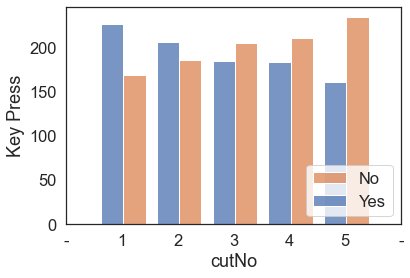

In [ ]:
min_val = trgt_df.cutNo.min()
max_val = trgt_df.cutNo.max()
val_width = max_val - min_val
n_bins = 5
bin_width = val_width/n_bins

keyPlot = sns.histplot(data=trgt_df, x="cutNo", hue="keyCode", multiple="dodge", bins=n_bins, binrange=(min_val, max_val), shrink = 0.8)
keyPlot.legend(['No','Yes'],loc = 'lower right')
#keyPlot.set_xticks(np.unique(eb['cutNo'])) # <--- set the ticks first
keyPlot.set_xticks(np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width)) # <--- set the ticks first
keyPlot.set_xticklabels(['-','1', '2', '3', '4', '5','-']);
keyPlot.set_ylabel('Key Press')

figname = 'figs/' + participantId + '/' + participantId +'_key_press_dist.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

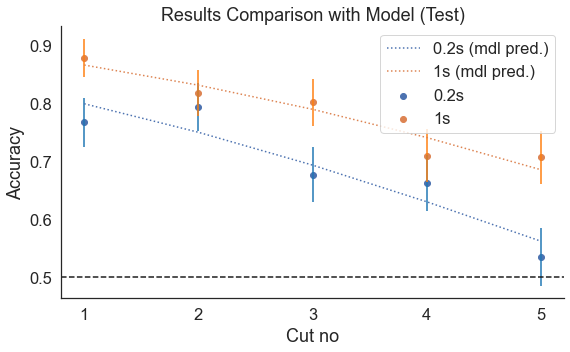

In [ ]:
participantId = 'eb'

error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_cutNo'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId) ,'pHat_cutNo']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 0) & (y_model_mean['participantID'] == participantId),'pHat_cutNo']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Results Comparison with Model (Test)')

figname = 'figs/' + participantId + '/' + participantId +'_test.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

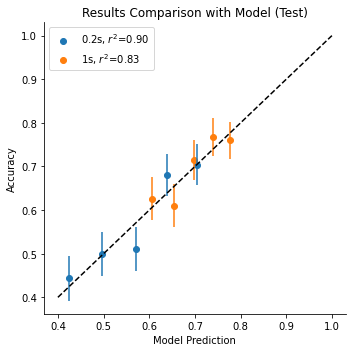

In [ ]:
participantId = 'go'

error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_cutNo'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId) ,'pHat_cutNo']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 0) & (y_model_mean['participantID'] == participantId),'pHat_cutNo']

## Compute R^2
short_r2 = r_2(y_mean_short, y_model_short)
long_r2 = r_2(y_mean_long, y_model_long)


ident = [0.4, 1.0]

fig, ax = plt.subplots(figsize=(5,5))
ax.errorbar(y_model_short, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(y_model_short, y_mean_short, label=r'0.2s, $r^2$={:.2f}'.format(short_r2))
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(y_model_long, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(y_model_long, y_mean_long, label=r'1s, $r^2$={:.2f}'.format(long_r2))
ax.set_xlabel('Model Prediction')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(ident,ident, 'k--')
ax.legend()
ax.set_title('Results Comparison with Model (Test)')

plt.tight_layout()

figname = 'figs/' + participantId + '/' + participantId +'_test_diag.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

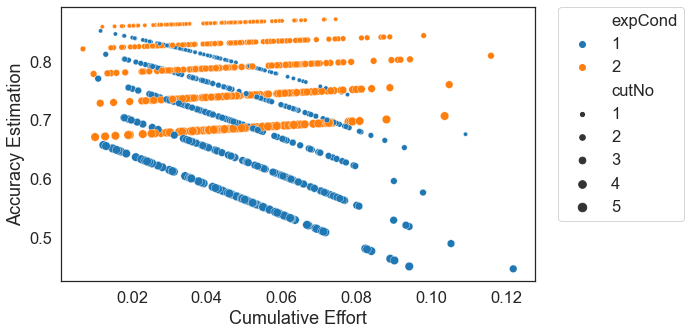

In [ ]:
# color palette as dictionary
palette = {1:"tab:blue",
           2:"tab:orange"
           }

fig = plt.figure(figsize=(10,5))
sns.scatterplot(data = df[(df['participantID'] == participantId) & (df['control'] == 0)], x = 'effortAll', y = 'pHat_effort', hue = 'expCond', palette=palette, size = 'cutNo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Cumulative Effort')
plt.ylabel('Accuracy Estimation')
plt.tight_layout()

figname = 'figs/' + participantId + '/' + participantId +'_model_pred_eff.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

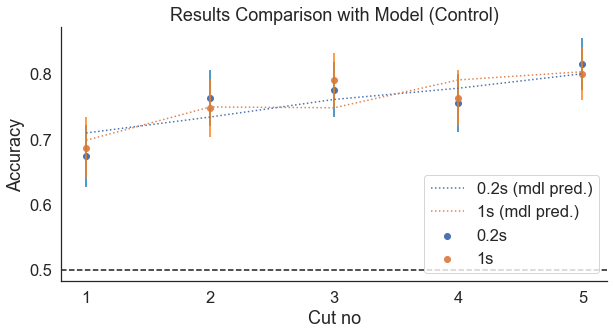

In [ ]:
error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_sim'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 1)& (y_model_mean['participantID'] == participantId) ,'pHat_sim']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 1) & (y_model_mean['participantID'] == participantId),'pHat_sim']


x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Results Comparison with Model (Control)')
plt.legend(loc='lower right')
plt.tight_layout()

figname = 'figs/' + participantId + '/' + participantId +'_control.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

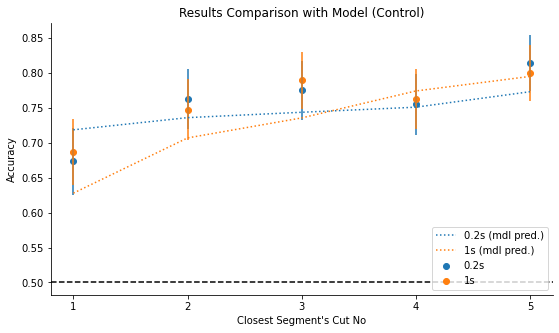

In [ ]:
participantId = 'eb'
error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','closestSeg','expTime','control'],as_index=False)['pHat_seg'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 1)& (y_model_mean['participantID'] == participantId) ,'pHat_seg']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 1) & (y_model_mean['participantID'] == participantId),'pHat_seg']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel("Closest Segment's Cut No")
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend(loc = 'lower right')
ax.set_title('Results Comparison with Model (Control)')

figname = 'figs/' + participantId + '/' + participantId +'_control_closeSeg.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

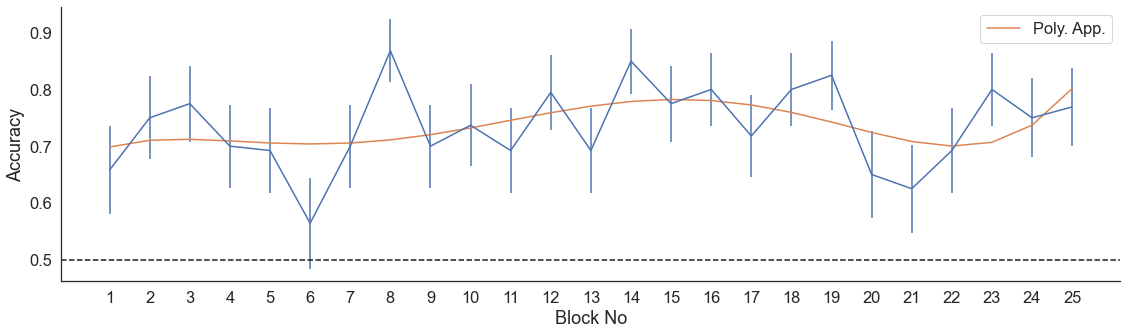

In [ ]:
participantId = 'eb'

error = trgt_df.groupby(['blockNo','control'],as_index=False)['correct'].sem()
error_test = error.loc[(error['control'] == 0), 'correct']

y_mean = trgt_df.groupby(['blockNo','control'],as_index=False)['correct'].mean()
y_mean_test = y_mean.loc[(y_mean['control'] == 0),'correct']

x = np.arange(1,26)

# polynomial smoothing
poly = np.polyfit(x,y_mean_test,5)
poly_y = np.poly1d(poly)(x)

fig, ax = plt.subplots(figsize=(16,5))
ax.errorbar(x, y_mean_test, yerr = error_test)
ax.plot(x, poly_y, label = 'Poly. App.')
ax.set_xlabel('Block No')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,26))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()

plt.tight_layout()

figname = 'figs/' + participantId + '/' + participantId +'_learning.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

## Image Difficulty

(array([682, 589, 691]), array([0.   , 0.04 , 0.055, 0.11 ]))

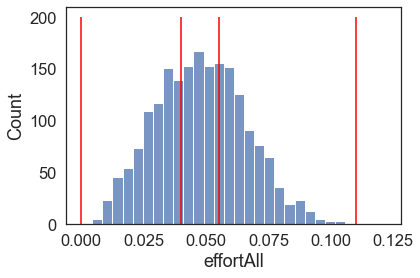

In [ ]:
participantId = 'eb'
trgt_df = df.loc[df['participantID']==participantId]
bins = [0, 0.04, 0.055, 0.11]
grph = sns.histplot(trgt_df['effortAll'])
grph.vlines(x = bins, ymin = 0, ymax = 200, colors = 'red')
np.histogram(trgt_df.effortAll, bins = bins)

In [ ]:
df['eff_label'] = pd.cut(x=df['effortAll'], bins=bins,
                     labels=['Easy', 'Normal', 'Difficult'])

In [ ]:

trgt_df['effortAll'].describe()

count    1981.000000
mean        0.047701
std         0.017784
min         0.006131
25%         0.034856
50%         0.047224
75%         0.059645
max         0.114730
Name: effortAll, dtype: float64

 bins=[0, 0.048, 0.06, 13]

No handles with labels found to put in legend.


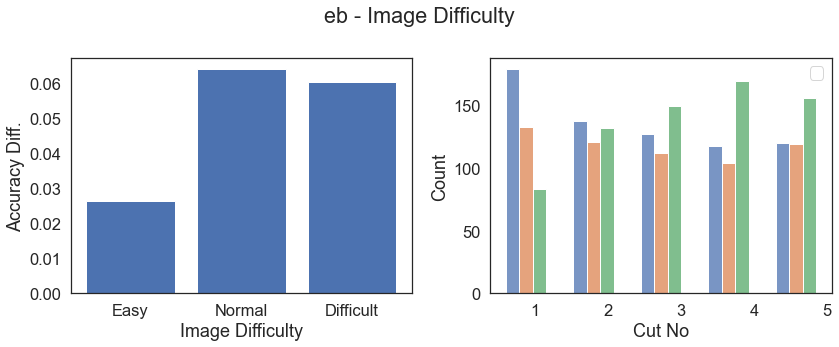

In [ ]:
participantId = 'eb'

trgt_df = df.loc[df['participantID'] == participantId, :]

img_diff_grpd = trgt_df.groupby(by = ['eff_label', 'expTime'], as_index = False)['correct'].mean()
eff_labels = img_diff_grpd['eff_label'].unique()

img_diff_grpd['acc_diff'] = 0
for lbl in eff_labels:
    img_diff_grpd.loc[(img_diff_grpd['eff_label'] == lbl) & (img_diff_grpd['expTime'] == 1.0), 'acc_diff'] = img_diff_grpd.loc[(img_diff_grpd['eff_label'] == lbl) & (img_diff_grpd['expTime'] == 1.0), 'correct'].values - img_diff_grpd.loc[(img_diff_grpd['eff_label'] == lbl) & (img_diff_grpd['expTime'] == 0.2), 'correct'].values
    
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].bar(x = eff_labels, height = img_diff_grpd.loc[img_diff_grpd['expTime'] == 1.0, 'acc_diff'].values)
#sns.barplot(data = df.loc[df['participantID'] == participantId, :], x = 'eff_label', y = 'correct', hue = 'expTime', ax = ax[0])
ax[0].set_xlabel('Image Difficulty')
ax[0].set_ylabel('Accuracy Diff.')

sns.histplot(data = df.loc[df['participantID'] == participantId, :], x = 'cutNo', hue = 'eff_label', multiple = "dodge", shrink = 1.8, ax = ax[1])
ax[1].set_xlabel('Cut No')
ax[1].get_legend().set_title("Image Difficulty")
plt.legend()

fig.suptitle(participantId + ' - Image Difficulty')
plt.tight_layout()

figname = 'figs/' + participantId + '/' + participantId +'_img_diff.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

## Response Model

In [ ]:
cogEffort = np.array(allImgs.quantile(np.arange(.65,.95,.05)).cumNcut)
#cogEffort = [0.01, 0.9]

initEff = 0.005

participantId = 'eb'
trgt_df = df[(df['participantID'] == participantId) & (df['control'] == 0)]

keyPress_dist = trgt_df.groupby(by = ['cutNo','expCond'], as_index=False)['keyCode'].mean()

imgs = trgt_df.shownImgID.values
segs = trgt_df.shownSegID.values
expTimes = trgt_df.expCond.values
cutNos = trgt_df.cutNo.values
img_diff = trgt_df.effortAll.values

allPredResp = np.zeros((len(cogEffort),len(trgt_df)))

for i in range(len(cogEffort)):
    thr = cogEffort[i]
    predResp = []
    
    for trgt_id in range(len(trgt_df)):
        trgt_img = imgs[trgt_id]
        trgt_seg = int(segs[trgt_id]) - 1
        trgt_expTime = expTimes[trgt_id]
        trgt_cutNo = cutNos[trgt_id]
        trgt_imgDiff = img_diff[trgt_id]

        # All the segments of the target image
        trgtImgSegs = allImgs.loc[allImgs['imgId'] == trgt_img,:] 

        # Cumulative ncut value up to that point
        cumNcut = trgtImgSegs.iloc[trgt_seg-1,4]

        # Add offset coming from img difficulty
        cumNcut = cumNcut * (1+trgt_imgDiff)
        
        # Add initial effort
        #cumNcut = cumNcut + initEff

        # Number of segments in the stock
        stockSize = len(trgtImgSegs.iloc[0:trgt_seg,4])

        # Derive how much effort the participant has

        effStored = thr

        # Predict response
        if effStored >= cumNcut:            
            prob = keyPress_dist.loc[(keyPress_dist['cutNo'] == trgt_cutNo) & (keyPress_dist['expCond'] == trgt_expTime), 'keyCode']
            resp = np.random.binomial(1, 1-prob, 1)
            #resp = 1
        else:            
            #prob = keyPress_dist.loc[(keyPress_dist['cutNo'] == trgt_cutNo) & (keyPress_dist['expCond'] == trgt_expTime), 'keyCode']
            resp = np.random.binomial(1, 0.5, 1)
            #resp = 0

        predResp.append(resp)
        
    allPredResp[i,:] = predResp

    #df.loc[(df['participantID'] == participantId) & (df['control'] == 0),'respPred'] = predResp

/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_9329/302303122.py:61: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  allPredResp[i,:] = predResp


/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_9329/35007763.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y_model_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)[0,1,2,3,4,5].mean()
/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_9329/35007763.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',1,'',2,'',3,'',4,'',5], fontsize=15);


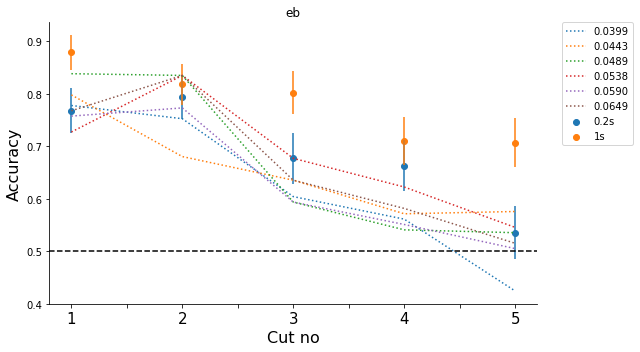

In [ ]:
test_df = df.loc[(df['participantID'] == participantId) & (df['control'] == 0)]
test_df = test_df.reset_index()
test_df = pd.concat([test_df, pd.DataFrame(allPredResp.T)], axis=1)

y_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


error = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']


y_model_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)[0,1,2,3,4,5].mean()

x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in range(0,6):
    colName = str(i)
    y_model = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId), i]
    ax.plot(x, y_model, linestyle='dotted', label = '{:.4f}'.format(cogEffort[i]))

ax.set_xticklabels(['',1,'',2,'',3,'',4,'',5], fontsize=15);

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.axhline(0.5,ls = '--', color = 'k')    
ax.set_title('{}'.format(participantId))
plt.tight_layout()

figname = 'figs/' + participantId + '/' + participantId +'_response_model_ovrll.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

## Export df

In [ ]:
df = pd.concat([eb,my_thr_df, sw_df])

In [ ]:
target_vars = ['segSize','segCentDist',
                    'intDiff', 'meanSegInt','deltaInt']
upp_mat = np.triu(df.loc[:,target_vars].corr())
plt.figure(figsize=(8,6))
sns.heatmap(df.loc[:,target_vars].corr(), annot = True, cmap = 'coolwarm', mask = upp_mat)

In [ ]:
eb.to_csv('data/eb/eb.csv', index = False)

# 09.12 - G.O.

In [ ]:
participantId = 'go'
path ='data/' + participantId + '/'
list_of_files = []

for file in os.listdir(path):
    if file.endswith(".mat"):
        list_of_files.append(file)

num_trials = []
for i,j in enumerate(list_of_files):
    mat_fname = (path + j)
    mat_contents = sio.loadmat(mat_fname)

    if i == 0:
        presentedImgs = mat_contents['presentedSegs'][:,7]
        segIntensity = mat_contents['presentedSegs'][:,8]
        segPos = mat_contents['presentedSegs'][:,9]
        respMatrix = mat_contents['respMatrix']
        num_trials.append(respMatrix.shape[0])
    else:
        newPresentedImg = mat_contents['presentedSegs'][:,7]
        presentedImgs = np.concatenate((presentedImgs, newPresentedImg), axis=0)

        newSegIntensity = mat_contents['presentedSegs'][:,8]
        segIntensity = np.concatenate((segIntensity, newSegIntensity), axis=0)

        newSegPos = mat_contents['presentedSegs'][:,9]
        segPos = np.concatenate((segPos, newSegPos), axis=0)

        newRespMatrix = mat_contents['respMatrix']
        num_trials.append(newRespMatrix.shape[0])
        respMatrix = np.concatenate((respMatrix, newRespMatrix), axis=0)


colNames = ['trialId','trialNo','blockNo','cutNo','expCond','control','keyCode',
            'shownImgID', 'shownFoilID', 'shownSegID',
            'reactionTime','segSize','segCenterX', 'segCenterY','segCentDist',
            'intDiff','intStd','segNcut','segStab', 'leaf','correct', 'meanImgInt',
            'meanSegInt','deltaInt','intOrder']

go = pd.DataFrame(respMatrix, columns = colNames)
go['participantID'] = participantId

# Make -1 nCut Values 1
go.loc[go['segNcut'] == -1,'segNcut'] = 1

# Make negative reaction Times positive
go['reactionTime'] = np.abs(go['reactionTime'])

# Assign expTime

go.loc[go['expCond'] == 1,'expTime'] = 0.2
go.loc[go['expCond'] == 2,'expTime'] = 1


go['presentedImgs'] = presentedImgs
go['segIntensity'] = segIntensity
go['segPos'] = segPos
go['intVals'] = pd.Series([np.reshape(mat_contents['settings'][1][0],-1)]*len(go))
go['intDelta'] = mat_contents['settings'][4][0][0][0]
go['date'] = '08-12-2022'
go['nmcPars'] = pd.Series([np.reshape(mat_contents['settings'][2][0],-1)]*len(go))

# Arrange positions
participantIdList = go.pop('participantID')
go.insert(0,'participantID', participantIdList)

expData = go.pop('date')
go.insert(1,'date',expData)


# Define continuous variables
contVars = ['cutNo','reactionTime', 'segSize', 'segCenterX', 'segCenterY', 'segCentDist',
            'intDiff','intStd','meanImgInt', 'meanSegInt','deltaInt', 'intOrder']

newContVars = ['normed_cutNo','normed_reactionTime', 'normed_segSize', 'normed_segCenterX', 'normed_segCenterY', 'normed_segCentDist',
            'normed_intDiff','normed_intStd','normed_meanImgInt', 'normed_meanSegInt','normed_deltaInt', 'normed_intOrder']

# Define factors
catVars = ['blockNo','expTime','control','leaf','correct', 'intOrder', 'segNcut']

go = go[go['blockNo'] > 0]
go = go.sort_values(by = 'trialId')
go.loc[go['blockNo'] > 10, 'date'] = '05-12-2022'

go = go.reset_index(drop=True)

# Normalize your data
for i,j in enumerate(contVars):
    standardize(go, j, newContVars[i])

#go = go.dropna()
go = go.set_index('trialId')

KeyError: 'presentedSegs'

In [ ]:
# Load effort scores
filename = path + 'go_cumNcuts.csv'
go_cumNcuts = pd.read_csv(filename, index_col=False, header=None)


cumNcutColNames = ['id', 'blockNo', 'trialNo', 'cutNo','effScoreAll', 'effScoreCutNo']
go_cumNcuts.columns = cumNcutColNames

go_cumNcuts = go_cumNcuts.set_index('id')
go['effortAll'] = go_cumNcuts.iloc[:,3]
go['effortUp'] = go_cumNcuts.iloc[:,4]

standardize(go, 'effortAll', 'normed_effortAll')

In [ ]:
# Load similarity scores
filename = path + 'go_similarityScores.csv'
go_similarity = pd.read_csv(filename, index_col=False, header=None)


simColNames = ['id','blockNo', 'trialNo', 'cutNo','simScore','closestCutNo']
go_similarity.columns = simColNames
go_similarity = go_similarity.set_index('id')

#go_sim_grouped = go_similarity.groupby(by ='id', as_index=False)['avgCrossCorr'].max()
#go_sim_grouped = go_sim_grouped.set_index('id')

# Assign them into the main df
go['simScore'] = go_similarity['simScore']
go['closestSeg'] = go_similarity['closestCutNo']

standardize(go, 'simScore', 'normed_simScore')


In [ ]:
go = go.dropna(subset = ['keyCode'])

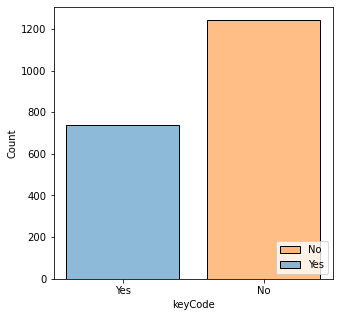

In [ ]:
plt.figure(figsize=(5,5))

keyPlot = sns.histplot(data = go, x = 'keyCode', hue = 'keyCode', multiple='layer', discrete=True, shrink=.8)
keyPlot.legend(['No','Yes'],loc = 'lower right')
keyPlot.set_xticks([0,1])
keyPlot.set_xticklabels(['Yes','No']);

figname = 'figs/' + participantId + '/' + participantId +'_key_press_dist.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

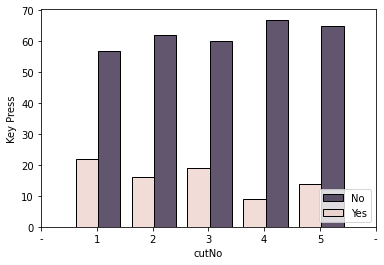

In [ ]:
participantId = 'go'

trgt_df = aes[aes['participantID'] == participantId]

min_val = trgt_df.cutNo.min()
max_val = trgt_df.cutNo.max()
val_width = max_val - min_val
n_bins = 5
bin_width = val_width/n_bins

keyPlot = sns.histplot(data=trgt_df, x="cutNo", hue="keyCode", multiple="dodge", bins=n_bins, binrange=(min_val, max_val), shrink = 0.8)
keyPlot.legend(['No','Yes'],loc = 'lower right')
#keyPlot.set_xticks(np.unique(eb['cutNo'])) # <--- set the ticks first
keyPlot.set_xticks(np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width)) # <--- set the ticks first
keyPlot.set_xticklabels(['-','1', '2', '3', '4', '5','-']);
keyPlot.set_ylabel('Key Press')

figname = 'figs/' + participantId + '/' + participantId +'_key_press_dist.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

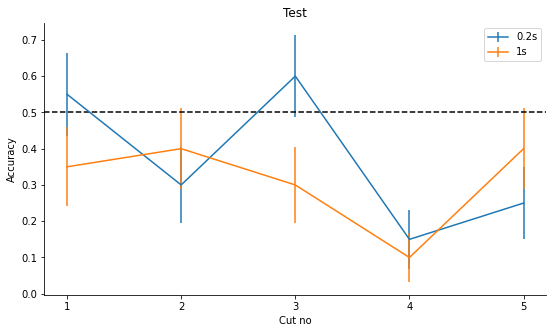

In [ ]:
error = aes.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0), 'correct']

y_mean = aes.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0),'correct']

x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Test')

figname = 'figs/' + participantId + '/' + participantId +'_test.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

Text(0.5, 1.0, 'Results Comparison with Model (Test)')

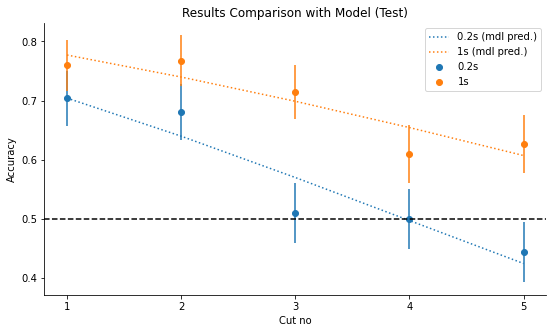

In [ ]:
participantId = 'go'

error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_cutNo'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId) ,'pHat_cutNo']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 0) & (y_model_mean['participantID'] == participantId),'pHat_cutNo']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Results Comparison with Model (Test)')

#figname = 'figs/' + participantId + '/' + participantId +'_test.png'
#plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

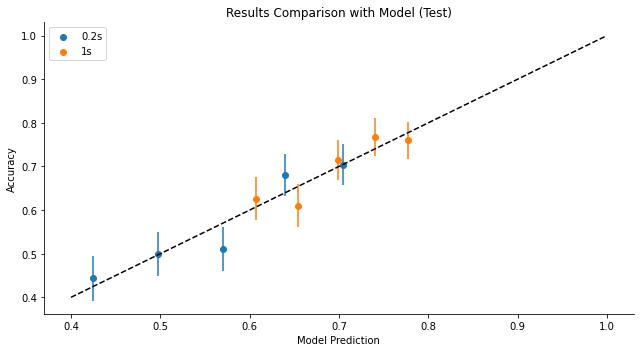

In [ ]:
participantId = 'go'

error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_cutNo'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId) ,'pHat_cutNo']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 0) & (y_model_mean['participantID'] == participantId),'pHat_cutNo']

ident = [0.4, 1.0]

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(y_model_short, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(y_model_short, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(y_model_long, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(y_model_long, y_mean_long, label='1s')
ax.set_xlabel('Model Prediction')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(ident,ident, 'k--')
ax.legend()
ax.set_title('Results Comparison with Model (Test)')

plt.tight_layout()

figname = 'figs/' + participantId + '/' + participantId +'_test_diag.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

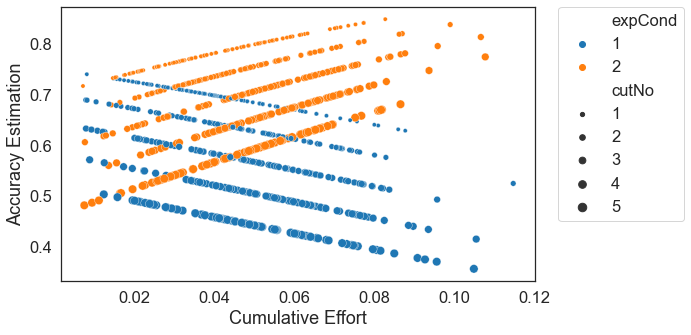

In [ ]:
# color palette as dictionary
palette = {1:"tab:blue",
           2:"tab:orange"
           }

fig = plt.figure(figsize=(10,5))
sns.scatterplot(data = df[(df['participantID'] == participantId) & (df['control'] == 0)], x = 'effortAll', y = 'pHat_effort', hue = 'expCond', palette=palette, size = 'cutNo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Cumulative Effort')
plt.ylabel('Accuracy Estimation')

plt.tight_layout()

figname = 'figs/' + participantId + '/' + participantId +'_model_pred_eff.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

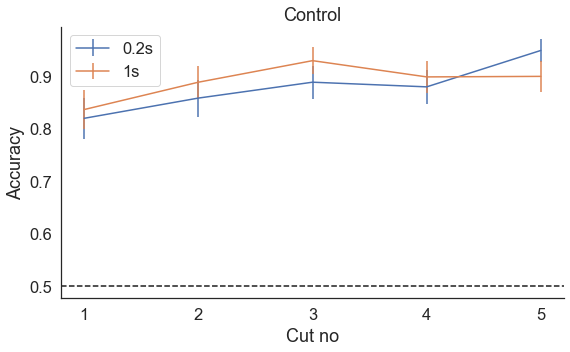

In [ ]:
participantId = 'go'
trgt_df = df.loc[df['participantID'] == participantId]

error = trgt_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1), 'correct']

y_mean = trgt_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1),'correct']

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Control')

figname = 'figs/' + participantId + '/' + participantId +'_control.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

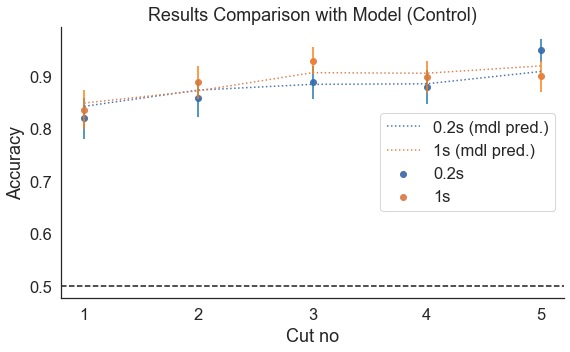

In [ ]:
error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_sim'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 1)& (y_model_mean['participantID'] == participantId) ,'pHat_sim']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 1) & (y_model_mean['participantID'] == participantId),'pHat_sim']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Results Comparison with Model (Control)')

figname = 'figs/' + participantId + '/' + participantId +'_control.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

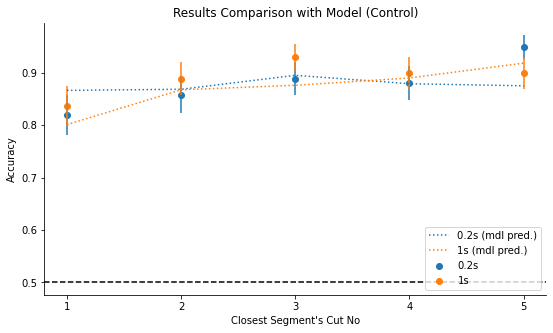

In [ ]:
participantId = 'go'
error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','closestSeg','expTime','control'],as_index=False)['pHat_seg'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 1)& (y_model_mean['participantID'] == participantId) ,'pHat_seg']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 1) & (y_model_mean['participantID'] == participantId),'pHat_seg']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel("Closest Segment's Cut No")
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend(loc = 'lower right')
ax.set_title('Results Comparison with Model (Control)')

figname = 'figs/' + participantId + '/' + participantId +'_control_closeSeg.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [ ]:
participantId = 'go'

go = df.loc[(df['participantID'] == participantId) & (df['control'] == 1)]

pred_acc = np.zeros(len(go['pHat_sim']))

for i, theta in enumerate(go['pHat_sim']): 
    nobs = 1   
    prediction = np.random.binomial(1,theta, nobs)
    pred_acc[i] = prediction

go['pred_sim'] = pred_acc

# Model results
error_mdl = go.groupby(['cutNo','expTime'],as_index=False)['pred_sim'].sem()
error_short_mdl = error_mdl.loc[(error_mdl['expTime'] == 0.2) , 'pred_sim']
error_long_mdl =  error_mdl.loc[(error_mdl['expTime'] == 1), 'pred_sim']

y_mean_mdl = go.groupby(['cutNo','expTime'],as_index=False)['pred_sim'].mean()
y_mean_short_mdl = y_mean_mdl.loc[(y_mean_mdl['expTime'] == 0.2),'pred_sim']
y_mean_long_mdl = y_mean_mdl.loc[(y_mean_mdl['expTime'] == 1),'pred_sim']

# Behavioral results
error = go.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2), 'correct']
error_long =  error.loc[(error['expTime'] == 1), 'correct']

y_mean = go.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1),'correct']


x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short_mdl, yerr = error_short_mdl, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short_mdl, label='0.2s')
ax.plot(x, y_mean_short, linestyle='dotted', label ='0.2s (mdl pred.)')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long_mdl, yerr = error_long_mdl, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long_mdl, label='1s')
ax.plot(x, y_mean_long, linestyle='dotted', label ='1s (mdl pred.)' )
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Result Comparison with Model (Control)')

figname = 'figs/' + participantId + '/' + participantId +'_control.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

Curve smoothing, check other options here:
https://stackoverflow.com/questions/46633544/smoothing-out-curve-in-python

In [ ]:
error = go.groupby(['blockNo','control'],as_index=False)['correct'].sem()
error_test = error.loc[(error['control'] == 0), 'correct']

y_mean = go.groupby(['blockNo','control'],as_index=False)['correct'].mean()
y_mean_test = y_mean.loc[(y_mean['control'] == 0),'correct']

x = np.arange(1,len(y_mean_test) + 1)

# Apply polynomial curve smoothing
poly = np.polyfit(x,y_mean_test,5)
poly_y = np.poly1d(poly)(x)

fig, ax = plt.subplots(figsize=(16,5))
ax.errorbar(x, y_mean_test, yerr = error_test, label = 'Original Data')
ax.plot(x, poly_y, label = 'Poly. App.')
ax.set_xlabel('Block No')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,26))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()

figname = 'figs/' + participantId + '/' + participantId +'_learning.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)



In [ ]:
go.to_csv('data/go/go.csv', index = False)

In [ ]:
target_vars = ['segSize','segCentDist',
                    'intDiff', 'meanSegInt','deltaInt']
upp_mat = np.triu(df.loc[:,target_vars].corr())
plt.figure(figsize=(8,6))
sns.heatmap(df.loc[:,target_vars].corr(), annot = True, cmap = 'coolwarm', mask = upp_mat)

## Image Difficulty

(array([686, 625, 668]), array([0.   , 0.04 , 0.055, 0.11 ]))

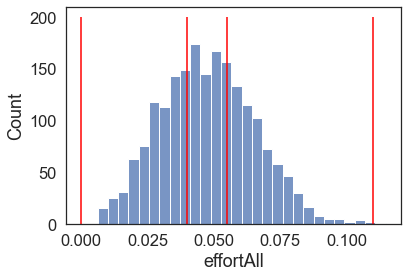

In [ ]:
bins = [0, 0.04, 0.055, 0.11]
grph = sns.histplot(trgt_df['effortAll'])
grph.vlines(x = bins, ymin = 0, ymax = 200, colors = 'red')
np.histogram(trgt_df.effortAll, bins = bins)

In [ ]:
df['eff_label'] = pd.cut(x=df['effortAll'], bins=bins,
                     labels=['Easy', 'Normal', 'Difficult'])

In [ ]:
trgt_df['effortAll'].describe()

count    1981.000000
mean        0.047701
std         0.017784
min         0.006131
25%         0.034856
50%         0.047224
75%         0.059645
max         0.114730
Name: effortAll, dtype: float64

 bins=[0, 0.048, 0.06, 13]

In [ ]:
img_diff_grpd

eff_label  expTime   correct  acc_diff
0       Easy      0.2  0.765714  0.000000
1       Easy      1.0  0.758929 -0.006786
2     Normal      0.2  0.705298  0.000000
3     Normal      1.0  0.814241  0.108943
4  Difficult      0.2  0.699405  0.000000
5  Difficult      1.0  0.807229  0.107824

No handles with labels found to put in legend.


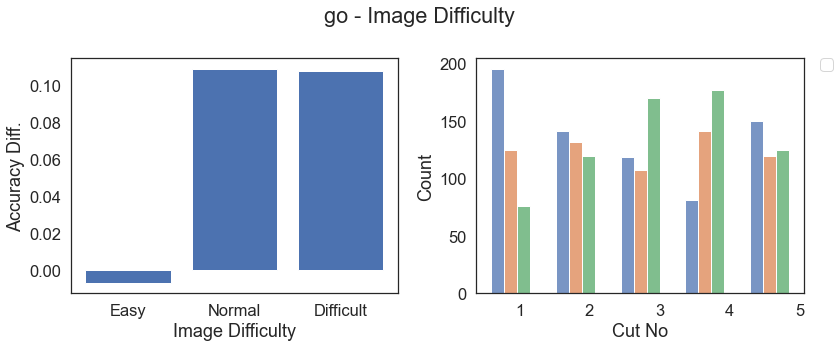

In [ ]:
participantId = 'go'

trgt_df = df.loc[df['participantID'] == participantId, :]

img_diff_grpd = trgt_df.groupby(by = ['eff_label', 'expTime'], as_index = False)['correct'].mean()
eff_labels = img_diff_grpd['eff_label'].unique()

img_diff_grpd['acc_diff'] = 0
for lbl in eff_labels:
    img_diff_grpd.loc[(img_diff_grpd['eff_label'] == lbl) & (img_diff_grpd['expTime'] == 1.0), 'acc_diff'] = img_diff_grpd.loc[(img_diff_grpd['eff_label'] == lbl) & (img_diff_grpd['expTime'] == 1.0), 'correct'].values - img_diff_grpd.loc[(img_diff_grpd['eff_label'] == lbl) & (img_diff_grpd['expTime'] == 0.2), 'correct'].values
    
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].bar(x = eff_labels, height = img_diff_grpd.loc[img_diff_grpd['expTime'] == 1.0, 'acc_diff'].values)
#sns.barplot(data = df.loc[df['participantID'] == participantId, :], x = 'eff_label', y = 'correct', hue = 'expTime', ax = ax[0])
ax[0].set_xlabel('Image Difficulty')
ax[0].set_ylabel('Accuracy Diff.')

sns.histplot(data = df.loc[df['participantID'] == participantId, :], x = 'cutNo', hue = 'eff_label', multiple = "dodge", shrink = 1.8, ax = ax[1])
ax[1].set_xlabel('Cut No')
ax[1].get_legend().set_title("Image Difficulty")

ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

fig.suptitle(participantId + ' - Image Difficulty')
plt.tight_layout()

figname = 'figs/' + participantId + '/' + participantId +'_img_diff.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

## Response Model - Cum. nCut

In [ ]:
trgt_df.groupby(by = ['cutNo','expCond'], as_index=False)['keyCode'].mean()

cutNo  expCond   keyCode
0      1        1  0.295918
1      1        2  0.240000
2      2        1  0.319588
3      2        2  0.232323
4      3        1  0.490000
5      3        2  0.285714
6      4        1  0.500000
7      4        2  0.390000
8      5        1  0.556701
9      5        2  0.373737

In [ ]:
cogEffort = np.array(allImgs.quantile(np.arange(.70,.99,.05)).cumNcut)
#cogEffort = [0.01, 0.9]

initEff = 0.005

participantId = 'go'
trgt_df = go[(go['participantID'] == participantId) & (go['control'] == 0)]

keyPress_dist = trgt_df.groupby(by = ['cutNo','expCond'], as_index=False)['keyCode'].mean()

imgs = trgt_df.shownImgID.values
segs = trgt_df.shownSegID.values
expTimes = trgt_df.expCond.values
cutNos = trgt_df.cutNo.values
img_diff = trgt_df.effortAll.values

allPredResp = np.zeros((len(cogEffort),len(trgt_df)))

for i in range(len(cogEffort)):
    thr = cogEffort[i]
    predResp = []
    
    for trgt_id in range(len(trgt_df)):
        trgt_img = imgs[trgt_id]
        trgt_seg = int(segs[trgt_id]) - 1
        trgt_expTime = expTimes[trgt_id]
        trgt_cutNo = cutNos[trgt_id]
        trgt_imgDiff = img_diff[trgt_id]

        # All the segments of the target image
        trgtImgSegs = allImgs.loc[allImgs['imgId'] == trgt_img,:] 

        # Cumulative ncut value up to that point
        cumNcut = trgtImgSegs.iloc[trgt_seg-1,4]

        # Add offset coming from img difficulty
        cumNcut = cumNcut * (1+trgt_imgDiff)
        
        # Add initial effort
        #cumNcut = cumNcut + initEff

        # Number of segments in the stock
        stockSize = len(trgtImgSegs.iloc[0:trgt_seg,4])

        # Derive how much effort the participant has

        effStored = thr

        # Predict response
        if effStored >= cumNcut:            
            prob = keyPress_dist.loc[(keyPress_dist['cutNo'] == trgt_cutNo) & (keyPress_dist['expCond'] == trgt_expTime), 'keyCode']
            resp = np.random.binomial(1, 1-prob, 1)
            #resp = 1
        else:            
            #prob = keyPress_dist.loc[(keyPress_dist['cutNo'] == trgt_cutNo) & (keyPress_dist['expCond'] == trgt_expTime), 'keyCode']
            resp = np.random.binomial(1, 0.5, 1)
            #resp = 0

        predResp.append(resp)
        
    allPredResp[i,:] = predResp

    #df.loc[(df['participantID'] == participantId) & (df['control'] == 0),'respPred'] = predResp

/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_9329/3857560653.py:61: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  allPredResp[i,:] = predResp


/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_9329/35007763.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y_model_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)[0,1,2,3,4,5].mean()
/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_9329/35007763.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',1,'',2,'',3,'',4,'',5], fontsize=15);


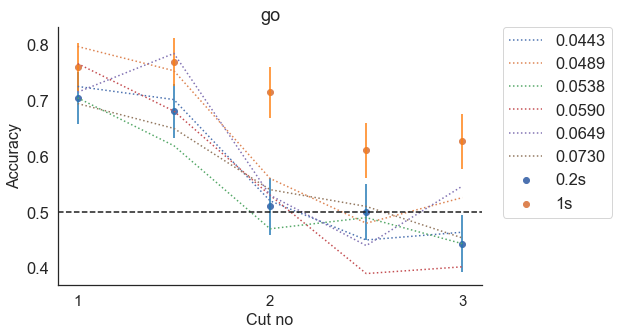

In [ ]:
test_df = df.loc[(df['participantID'] == participantId) & (df['control'] == 0)]
test_df = test_df.reset_index()
test_df = pd.concat([test_df, pd.DataFrame(allPredResp.T)], axis=1)

y_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


error = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']


y_model_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)[0,1,2,3,4,5].mean()

x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in range(0,6):
    colName = str(i)
    y_model = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId), i]
    ax.plot(x, y_model, linestyle='dotted', label = '{:.4f}'.format(cogEffort[i]))

ax.set_xticklabels(['',1,'',2,'',3,'',4,'',5], fontsize=15);

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.axhline(0.5,ls = '--', color = 'k')    
ax.set_title('{}'.format(participantId))
plt.tight_layout()

figname = 'figs/' + participantId + '/' + participantId +'_response_model_ovrll.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

## Response Model - Cut No

In [ ]:
trgt_df.groupby(by = ['cutNo','expCond'], as_index=False)['keyCode'].mean()

cutNo  expCond   keyCode
0      1        1  0.295918
1      1        2  0.240000
2      2        1  0.319588
3      2        2  0.232323
4      3        1  0.490000
5      3        2  0.285714
6      4        1  0.500000
7      4        2  0.390000
8      5        1  0.556701
9      5        2  0.373737

In [ ]:
cogEffort = [5]
#cogEffort = [0.01, 0.9]

initEff = 0.005

participantId = 'go'
trgt_df = df[(df['participantID'] == participantId) & (df['control'] == 0)]

keyPress_dist = trgt_df.groupby(by = ['cutNo','expCond'], as_index=False)['keyCode'].mean()

imgs = trgt_df.shownImgID.values
segs = trgt_df.shownSegID.values
expTimes = trgt_df.expCond.values
cutNos = trgt_df.cutNo.values
img_diff = trgt_df.effortAll.values

allPredResp = np.zeros((len(cogEffort),len(trgt_df)))

for i in range(len(cogEffort)):
    thr = cogEffort[i]
    predResp = []
    
    for trgt_id in range(len(trgt_df)):
        trgt_img = imgs[trgt_id]
        trgt_seg = int(segs[trgt_id]) - 1
        trgt_expTime = expTimes[trgt_id]
        trgt_cutNo = cutNos[trgt_id]
        trgt_imgDiff = img_diff[trgt_id]

        # All the segments of the target image
        trgtImgSegs = allImgs.loc[allImgs['imgId'] == trgt_img,:] 

        # Cumulative ncut value up to that point
        cumNcut = trgtImgSegs.iloc[trgt_seg-1,4]

        # Add offset coming from img difficulty
        cumNcut = cumNcut + trgt_imgDiff
        
        # Add initial effort
        #cumNcut = cumNcut + initEff

        # Number of segments in the stock
        stockSize = len(trgtImgSegs.iloc[0:trgt_seg,4])

        # Derive how much effort the participant has

        effStored = thr

        if trgt_imgDiff > 0.05:
            effStored = effStored - 1            

        # Predict response
        if effStored >= trgt_cutNo:            
            #prob = keyPress_dist.loc[(keyPress_dist['cutNo'] == trgt_cutNo) & (keyPress_dist['expCond'] == trgt_expTime), 'keyCode']
            #resp = np.random.binomial(1, 1-prob, 1)
            resp = 1
        else:            
            #prob = keyPress_dist.loc[(keyPress_dist['cutNo'] == trgt_cutNo) & (keyPress_dist['expCond'] == trgt_expTime), 'keyCode']
            resp = np.random.binomial(1, 0.5, 1)
            #resp = 0

        predResp.append(resp)
        
    allPredResp[i,:] = predResp

    #df.loc[(df['participantID'] == participantId) & (df['control'] == 0),'respPred'] = predResp

/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_9329/458738241.py:64: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  allPredResp[i,:] = predResp


<AxesSubplot:ylabel='Count'>

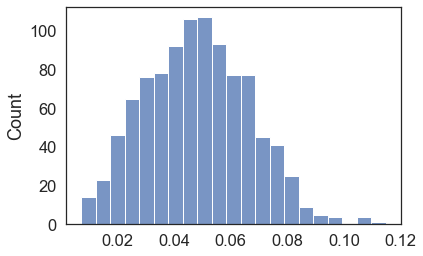

In [ ]:
sns.histplot(img_diff)

KeyError: 1

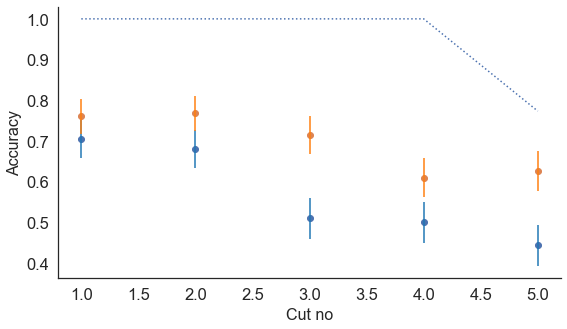

In [ ]:
test_df = df.loc[(df['participantID'] == participantId) & (df['control'] == 0)]
test_df = test_df.reset_index()
test_df = pd.concat([test_df, pd.DataFrame(allPredResp.T)], axis=1)

y_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


error = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']


y_model_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)[0].mean()

x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in range(0,6):
    colName = str(i)
    y_model = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId), i]
    ax.plot(x, y_model, linestyle='dotted', label = '{:.4f}'.format(cogEffort[i]))

ax.set_xticklabels(['',1,'',2,'',3,'',4,'',5], fontsize=15);

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.axhline(0.5,ls = '--', color = 'k')    
ax.set_title('{}'.format(participantId))
plt.tight_layout()

#figname = 'figs/' + participantId + '/' + participantId +'_response_model_ovrll.png'
#plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

## Export df

In [ ]:
go.to_csv('data/go/go.csv', index = False)

In [ ]:
target_vars = ['segSize','segCentDist',
                    'intDiff', 'meanSegInt','deltaInt']
upp_mat = np.triu(df.loc[:,target_vars].corr())
plt.figure(figsize=(8,6))
sns.heatmap(df.loc[:,target_vars].corr(), annot = True, cmap = 'coolwarm', mask = upp_mat)

# 11.01 - A.E.S

In [ ]:
participantId = 'aes'
path ='data/' + participantId + '/'
list_of_files = []

for file in os.listdir(path):
    if file.endswith(".mat"):
        list_of_files.append(file)

num_trials = []
for i,j in enumerate(list_of_files):
    mat_fname = (path + j)
    mat_contents = sio.loadmat(mat_fname)

    if i == 0:
        presentedImgs = mat_contents['presentedSegs'][:,7]
        segIntensity = mat_contents['presentedSegs'][:,8]
        segPos = mat_contents['presentedSegs'][:,9]
        respMatrix = mat_contents['respMatrix']
        num_trials.append(respMatrix.shape[0])
    else:
        newPresentedImg = mat_contents['presentedSegs'][:,7]
        presentedImgs = np.concatenate((presentedImgs, newPresentedImg), axis=0)

        newSegIntensity = mat_contents['presentedSegs'][:,8]
        segIntensity = np.concatenate((segIntensity, newSegIntensity), axis=0)

        newSegPos = mat_contents['presentedSegs'][:,9]
        segPos = np.concatenate((segPos, newSegPos), axis=0)

        newRespMatrix = mat_contents['respMatrix']
        num_trials.append(newRespMatrix.shape[0])
        respMatrix = np.concatenate((respMatrix, newRespMatrix), axis=0)


colNames = ['trialId','trialNo','blockNo','cutNo','expCond','control','keyCode',
            'shownImgID', 'shownFoilID', 'shownSegID',
            'reactionTime','segSize','segCenterX', 'segCenterY','segCentDist',
            'intDiff','intStd','segNcut','segStab', 'leaf','correct', 'meanImgInt',
            'meanSegInt','deltaInt','intOrder']

aes = pd.DataFrame(respMatrix, columns = colNames)
aes['participantID'] = participantId

# Make -1 nCut Values 1
aes.loc[aes['segNcut'] == -1,'segNcut'] = 1

# Make negative reaction Times positive
aes['reactionTime'] = np.abs(aes['reactionTime'])

# Assign expTime

aes.loc[aes['expCond'] == 1,'expTime'] = 0.2
aes.loc[aes['expCond'] == 2,'expTime'] = 1


aes['presentedImgs'] = presentedImgs
aes['segIntensity'] = segIntensity
aes['segPos'] = segPos
aes['intVals'] = pd.Series([np.reshape(mat_contents['settings'][1][0],-1)]*len(aes))
aes['intDelta'] = mat_contents['settings'][4][0][0][0]
aes['date'] = '08-12-2022'
aes['nmcPars'] = pd.Series([np.reshape(mat_contents['settings'][2][0],-1)]*len(aes))

# Arrange positions
participantIdList = aes.pop('participantID')
aes.insert(0,'participantID', participantIdList)

expData = aes.pop('date')
aes.insert(1,'date',expData)


# Define continuous variables
contVars = ['cutNo','reactionTime', 'segSize', 'segCenterX', 'segCenterY', 'segCentDist',
            'intDiff','intStd','meanImgInt', 'meanSegInt','deltaInt', 'intOrder']

newContVars = ['normed_cutNo','normed_reactionTime', 'normed_segSize', 'normed_segCenterX', 'normed_segCenterY', 'normed_segCentDist',
            'normed_intDiff','normed_intStd','normed_meanImgInt', 'normed_meanSegInt','normed_deltaInt', 'normed_intOrder']

# Define factors
catVars = ['blockNo','expTime','control','leaf','correct', 'intOrder', 'segNcut']

aes = aes[aes['blockNo'] > 0]
aes = aes.sort_values(by = 'trialId')
aes.loc[aes['blockNo'] > 10, 'date'] = '05-12-2022'

aes = aes.reset_index(drop=True)

# Normalize your data
for i,j in enumerate(contVars):
    standardize(aes, j, newContVars[i])

#go = go.dropna()
aes = aes.set_index('trialId')

In [ ]:
aes

participantID        date  trialNo  blockNo  cutNo  expCond  control  \
trialId                                                                        
1.0               aes  08-12-2022      1.0      1.0    3.0      1.0      0.0   
2.0               aes  08-12-2022      2.0      1.0    4.0      1.0      1.0   
3.0               aes  08-12-2022      3.0      1.0    1.0      1.0      1.0   
4.0               aes  08-12-2022      4.0      1.0    1.0      1.0      0.0   
5.0               aes  08-12-2022      5.0      1.0    1.0      1.0      0.0   
...               ...         ...      ...      ...    ...      ...      ...   
396.0             aes  08-12-2022     76.0      5.0    5.0      1.0      0.0   
397.0             aes  08-12-2022     77.0      5.0    2.0      2.0      0.0   
398.0             aes  08-12-2022     78.0      5.0    3.0      1.0      1.0   
399.0             aes  08-12-2022     79.0      5.0    4.0      1.0      1.0   
400.0             aes  08-12-2022     80.0      5.0    2.0      2.0      0.0   

         keyCode  shownImgID  shownFoilID  ...  normed_segSize  \
trialId                                    ...                   
1.0          1.0     89118.0          0.0  ...       -0.792331   
2.0          1.0     33016.0      36772.0  ...        1.363671   
3.0          1.0     78847.0      28993.0  ...       -0.792331   
4.0          1.0     55266.0          0.0  ...        1.559671   
5.0          0.0     90111.0          0.0  ...       -0.596331   
...          ...         ...          ...  ...             ...   
396.0        1.0     81768.0          0.0  ...        0.775671   
397.0        1.0     54379.0          0.0  ...       -0.400330   
398.0        1.0     22446.0       4867.0  ...       -0.988331   
399.0        NaN     22517.0       4428.0  ...       -0.400330   
400.0        0.0     99989.0          0.0  ...        1.755672   

         normed_segCenterX  normed_segCenterY  normed_segCentDist  \
trialId                                                             
1.0              -1.396490          -1.235786            1.360588   
2.0              -0.932733           0.896922            0.317157   
3.0               0.226662          -1.472753            0.125891   
4.0               1.386056          -1.235786            0.634069   
5.0              -1.396490           0.896922            1.104348   
...                    ...                ...                 ...   
396.0             1.617935           1.133890            0.984781   
397.0            -1.396490           1.133890            1.360588   
398.0            -0.700854          -0.761851           -0.348568   
399.0            -0.932733           0.422987           -0.165823   
400.0             1.386056          -0.998818            0.317157   

         normed_intDiff  normed_intStd  normed_meanImgInt  normed_meanSegInt  \
trialId                                                                        
1.0           -1.197128      -0.946992           0.133273          -1.235320   
2.0           -1.046069      -0.946992          -1.156473          -1.235320   
3.0            1.443705      -0.946992          -1.865874           1.280956   
4.0            1.142459       2.186384           0.706170           1.280956   
5.0            1.204972      -0.946992           0.172429           1.280956   
...                 ...            ...                ...                ...   
396.0         -0.624738       0.103037          -0.822489          -0.753905   
397.0         -1.199373      -0.946992           0.152435          -1.235320   
398.0         -1.279172      -0.946992           0.833760          -1.235320   
399.0          0.264218      -0.946992          -0.286192           0.241203   
400.0          1.153645       2.183145           0.610662           1.280956   

         normed_deltaInt  normed_intOrder  
trialId                                    
1.0             1.197128        -1.247907  
2.0             1.046069        -1.24

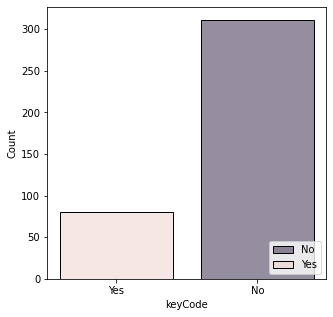

In [ ]:
plt.figure(figsize=(5,5))

keyPlot = sns.histplot(data = aes, x = 'keyCode', hue = 'keyCode', multiple='layer', discrete=True, shrink=.8)
keyPlot.legend(['No','Yes'],loc = 'lower right')
keyPlot.set_xticks([0,1])
keyPlot.set_xticklabels(['Yes','No']);

figname = 'figs/' + participantId + '/' + participantId +'_key_press_dist.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

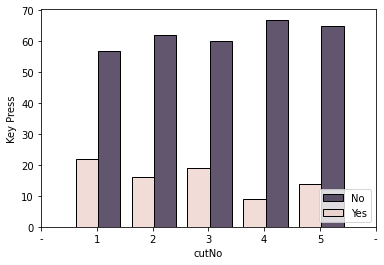

In [ ]:
participantId = 'aes'

trgt_df = aes[aes['participantID'] == participantId]

min_val = trgt_df.cutNo.min()
max_val = trgt_df.cutNo.max()
val_width = max_val - min_val
n_bins = 5
bin_width = val_width/n_bins

keyPlot = sns.histplot(data=trgt_df, x="cutNo", hue="keyCode", multiple="dodge", bins=n_bins, binrange=(min_val, max_val), shrink = 0.8)
keyPlot.legend(['No','Yes'],loc = 'lower right')
#keyPlot.set_xticks(np.unique(eb['cutNo'])) # <--- set the ticks first
keyPlot.set_xticks(np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width)) # <--- set the ticks first
keyPlot.set_xticklabels(['-','1', '2', '3', '4', '5','-']);
keyPlot.set_ylabel('Key Press')

figname = 'figs/' + participantId + '/' + participantId +'_key_press_dist.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

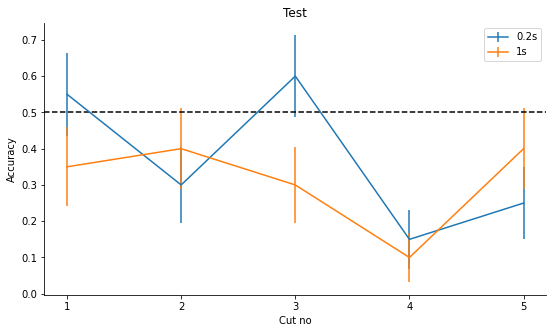

In [ ]:
error = aes.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0), 'correct']

y_mean = aes.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0),'correct']

x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Test')

figname = 'figs/' + participantId + '/' + participantId +'_test.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

# 17.01 - M.A.E.

In [ ]:
participantId = 'mae'
path ='data/' + participantId + '/'
list_of_files = []

for file in os.listdir(path):
    if file.endswith(".mat"):
        list_of_files.append(file)

num_trials = []
for i,j in enumerate(list_of_files):
    mat_fname = (path + j)
    mat_contents = sio.loadmat(mat_fname)

    if i == 0:
        presentedImgs = mat_contents['presentedSegs'][:,7]
        segIntensity = mat_contents['presentedSegs'][:,8]
        segPos = mat_contents['presentedSegs'][:,9]
        respMatrix = mat_contents['respMatrix']
        num_trials.append(respMatrix.shape[0])
    else:
        newPresentedImg = mat_contents['presentedSegs'][:,7]
        presentedImgs = np.concatenate((presentedImgs, newPresentedImg), axis=0)

        newSegIntensity = mat_contents['presentedSegs'][:,8]
        segIntensity = np.concatenate((segIntensity, newSegIntensity), axis=0)

        newSegPos = mat_contents['presentedSegs'][:,9]
        segPos = np.concatenate((segPos, newSegPos), axis=0)

        newRespMatrix = mat_contents['respMatrix']
        num_trials.append(newRespMatrix.shape[0])
        respMatrix = np.concatenate((respMatrix, newRespMatrix), axis=0)


colNames = ['trialId','trialNo','blockNo','cutNo','expCond','control','keyCode',
            'shownImgID', 'shownFoilID', 'shownSegID',
            'reactionTime','segSize','segCenterX', 'segCenterY','segCentDist',
            'intDiff','intStd','segNcut','segStab', 'leaf','correct', 'meanImgInt',
            'meanSegInt','deltaInt','intOrder']

mae = pd.DataFrame(respMatrix, columns = colNames)
mae['participantID'] = participantId

# Make -1 nCut Values 1
mae.loc[mae['segNcut'] == -1,'segNcut'] = 1

# Make negative reaction Times positive
mae['reactionTime'] = np.abs(mae['reactionTime'])

# Assign expTime

mae.loc[mae['expCond'] == 1,'expTime'] = 0.2
mae.loc[mae['expCond'] == 2,'expTime'] = 1


mae['presentedImgs'] = presentedImgs
mae['segIntensity'] = segIntensity
mae['segPos'] = segPos
mae['intVals'] = pd.Series([np.reshape(mat_contents['settings'][1][0],-1)]*len(mae))
mae['intDelta'] = mat_contents['settings'][4][0][0][0]
mae['date'] = '08-12-2022'
mae['nmcPars'] = pd.Series([np.reshape(mat_contents['settings'][2][0],-1)]*len(mae))

# Arrange positions
participantIdList = mae.pop('participantID')
mae.insert(0,'participantID', participantIdList)

expData = mae.pop('date')
mae.insert(1,'date',expData)


# Define continuous variables
contVars = ['cutNo','reactionTime', 'segSize', 'segCenterX', 'segCenterY', 'segCentDist',
            'intDiff','intStd','meanImgInt', 'meanSegInt','deltaInt', 'intOrder']

newContVars = ['normed_cutNo','normed_reactionTime', 'normed_segSize', 'normed_segCenterX', 'normed_segCenterY', 'normed_segCentDist',
            'normed_intDiff','normed_intStd','normed_meanImgInt', 'normed_meanSegInt','normed_deltaInt', 'normed_intOrder']

# Define factors
catVars = ['blockNo','expTime','control','leaf','correct', 'intOrder', 'segNcut']

mae = mae[mae['blockNo'] > 0]
mae = mae.sort_values(by = 'trialId')
mae.loc[mae['blockNo'] > 10, 'date'] = '16-01-2023'

mae = mae.reset_index(drop=True)

# Normalize your data
for i,j in enumerate(contVars):
    standardize(mae, j, newContVars[i])

#go = go.dropna()
mae = mae.set_index('trialId')

In [ ]:
# Load effort scores
filename = path + 'mae_cumNcuts.csv'
mae_cumNcuts = pd.read_csv(filename, index_col=False, header=None)


cumNcutColNames = ['id', 'blockNo', 'trialNo', 'cutNo','effScoreAll', 'effScoreCutNo']
mae_cumNcuts.columns = cumNcutColNames

mae_cumNcuts = mae_cumNcuts.set_index('id')
mae['effortAll'] = mae_cumNcuts.iloc[:,3]
mae['effortUp'] = mae_cumNcuts.iloc[:,4]

standardize(mae, 'effortAll', 'normed_effortAll')

In [ ]:
# Load similarity scores
filename = path + 'mae_similarityScores.csv'
mae_similarity = pd.read_csv(filename, index_col=False, header=None)


simColNames = ['id','blockNo', 'trialNo', 'cutNo','simScore','closestCutNo']
mae_similarity.columns = simColNames
mae_similarity = mae_similarity.set_index('id')

#go_sim_grouped = go_similarity.groupby(by ='id', as_index=False)['avgCrossCorr'].max()
#go_sim_grouped = go_sim_grouped.set_index('id')

# Assign them into the main df
mae['simScore'] = mae_similarity['simScore']
mae['closestSeg'] = mae_similarity['closestCutNo']

standardize(mae, 'simScore', 'normed_simScore')


In [ ]:
mae = mae.dropna(subset = ['keyCode'])

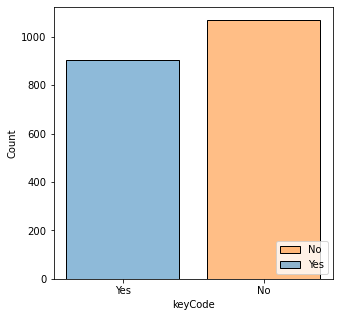

In [ ]:
plt.figure(figsize=(5,5))

keyPlot = sns.histplot(data = mae, x = 'keyCode', hue = 'keyCode', multiple='layer', discrete=True, shrink=.8)
keyPlot.legend(['No','Yes'],loc = 'lower right')
keyPlot.set_xticks([0,1])
keyPlot.set_xticklabels(['Yes','No']);

figname = 'figs/' + participantId + '/' + participantId +'_key_press_dist.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

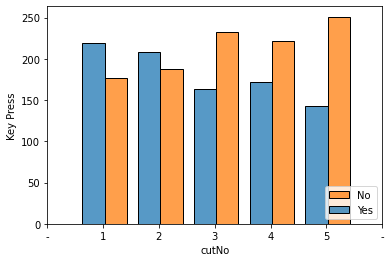

In [ ]:
participantId = 'mae'

trgt_df = mae[mae['participantID'] == participantId]

min_val = trgt_df.cutNo.min()
max_val = trgt_df.cutNo.max()
val_width = max_val - min_val
n_bins = 5
bin_width = val_width/n_bins

keyPlot = sns.histplot(data=trgt_df, x="cutNo", hue="keyCode", multiple="dodge", bins=n_bins, binrange=(min_val, max_val), shrink = 0.8)
keyPlot.legend(['No','Yes'],loc = 'lower right')
#keyPlot.set_xticks(np.unique(eb['cutNo'])) # <--- set the ticks first
keyPlot.set_xticks(np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width)) # <--- set the ticks first
keyPlot.set_xticklabels(['-','1', '2', '3', '4', '5','-']);
keyPlot.set_ylabel('Key Press')

figname = 'figs/' + participantId + '/' + participantId +'_key_press_dist.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

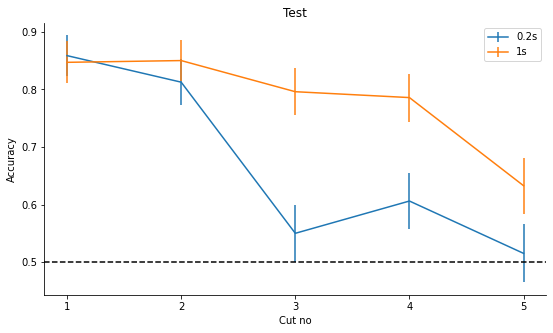

In [ ]:
error = mae.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0), 'correct']

y_mean = mae.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0),'correct']

x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Test')

figname = 'figs/' + participantId + '/' + participantId +'_test.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

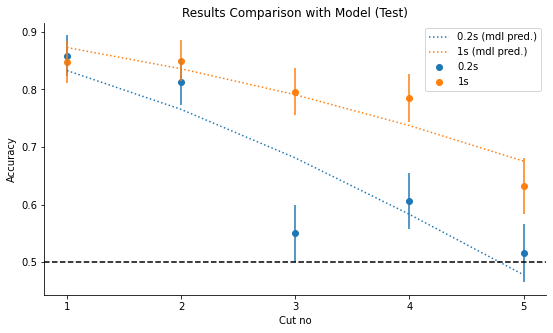

In [ ]:
participantId = 'mae'

error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_cutNo'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId) ,'pHat_cutNo']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 0) & (y_model_mean['participantID'] == participantId),'pHat_cutNo']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Results Comparison with Model (Test)')

figname = 'figs/' + participantId + '/' + participantId +'_test.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

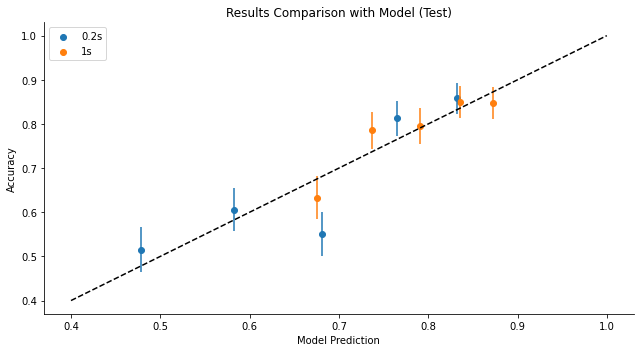

In [ ]:
participantId = 'mae'

error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_cutNo'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId) ,'pHat_cutNo']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 0) & (y_model_mean['participantID'] == participantId),'pHat_cutNo']

ident = [0.4, 1.0]

fig, ax = plt.subplots(figsize=(5,5))
ax.errorbar(y_model_short, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(y_model_short, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(y_model_long, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(y_model_long, y_mean_long, label='1s')
ax.set_xlabel('Model Prediction')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(ident,ident, 'k--')
ax.legend()
ax.set_title('Results Comparison with Model (Test)')

plt.tight_layout()

figname = 'figs/' + participantId + '/' + participantId +'_test_diag.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

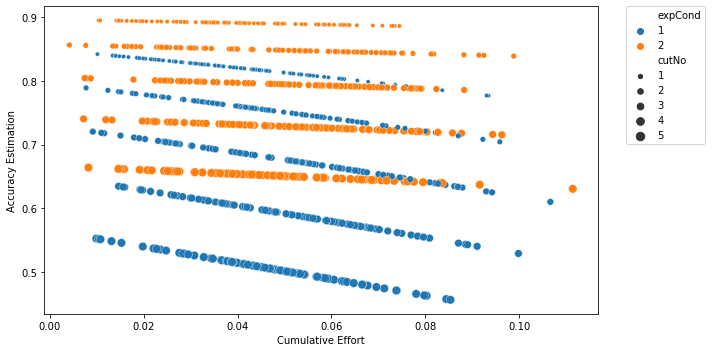

In [ ]:
# color palette as dictionary
palette = {1:"tab:blue",
           2:"tab:orange"
           }

fig = plt.figure(figsize=(10,5))
sns.scatterplot(data = df[(df['participantID'] == participantId) & (df['control'] == 0)], x = 'effortAll', y = 'pHat_effort', hue = 'expCond', palette=palette, size = 'cutNo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Cumulative Effort')
plt.ylabel('Accuracy Estimation')

plt.tight_layout()

figname = 'figs/' + participantId + '/' + participantId +'_model_pred_eff.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

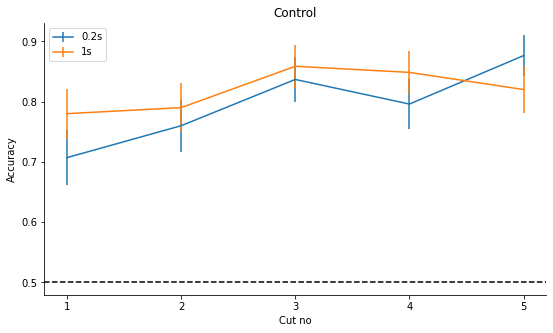

In [ ]:
participantId = 'mae'
trgt_df = df.loc[df['participantID'] == participantId]

error = trgt_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1), 'correct']

y_mean = trgt_df.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1),'correct']

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Control')

figname = 'figs/' + participantId + '/' + participantId +'_control.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

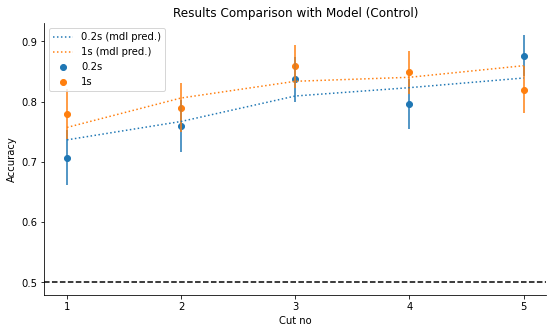

In [ ]:
error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_sim'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 1)& (y_model_mean['participantID'] == participantId) ,'pHat_sim']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 1) & (y_model_mean['participantID'] == participantId),'pHat_sim']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Results Comparison with Model (Control)')

figname = 'figs/' + participantId + '/' + participantId +'_control.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

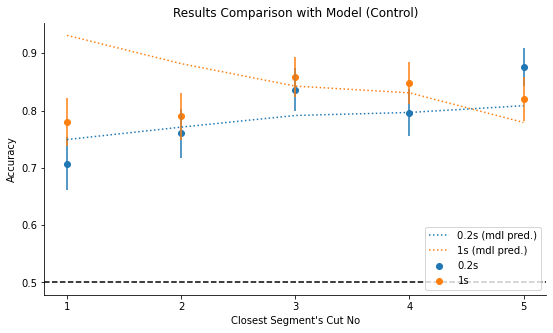

In [ ]:
participantId = 'mae'
error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','closestSeg','expTime','control'],as_index=False)['pHat_seg'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 1)& (y_model_mean['participantID'] == participantId) ,'pHat_seg']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 1) & (y_model_mean['participantID'] == participantId),'pHat_seg']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel("Closest Segment's Cut No")
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend(loc = 'lower right')
ax.set_title('Results Comparison with Model (Control)')

figname = 'figs/' + participantId + '/' + participantId +'_control_closeSeg.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

Curve smoothing, check other options here:
https://stackoverflow.com/questions/46633544/smoothing-out-curve-in-python

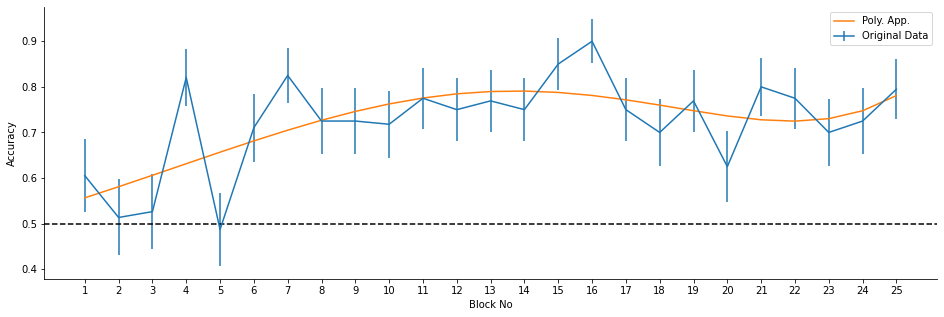

In [ ]:
error = trgt_df.groupby(['blockNo','control'],as_index=False)['correct'].sem()
error_test = error.loc[(error['control'] == 0), 'correct']

y_mean = trgt_df.groupby(['blockNo','control'],as_index=False)['correct'].mean()
y_mean_test = y_mean.loc[(y_mean['control'] == 0),'correct']

x = np.arange(1,len(y_mean_test) + 1)

# Apply polynomial curve smoothing
poly = np.polyfit(x,y_mean_test,5)
poly_y = np.poly1d(poly)(x)

fig, ax = plt.subplots(figsize=(16,5))
ax.errorbar(x, y_mean_test, yerr = error_test, label = 'Original Data')
ax.plot(x, poly_y, label = 'Poly. App.')
ax.set_xlabel('Block No')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,26))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()

figname = 'figs/' + participantId + '/' + participantId +'_learning.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)



In [ ]:
go.to_csv('data/mae/mae.csv', index = False)

In [ ]:
target_vars = ['segSize','segCentDist',
                    'intDiff', 'meanSegInt','deltaInt']
upp_mat = np.triu(df.loc[:,target_vars].corr())
plt.figure(figsize=(8,6))
sns.heatmap(df.loc[:,target_vars].corr(), annot = True, cmap = 'coolwarm', mask = upp_mat)

## Image Difficulty

(array([679, 555, 739]), array([0.   , 0.04 , 0.055, 0.11 ]))

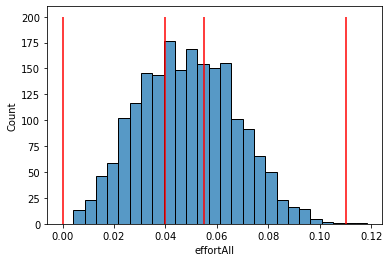

In [ ]:
bins = [0, 0.04, 0.055, 0.11]
grph = sns.histplot(trgt_df['effortAll'])
grph.vlines(x = bins, ymin = 0, ymax = 200, colors = 'red')
np.histogram(trgt_df.effortAll, bins = bins)

In [ ]:
df['eff_label'] = pd.cut(x=df['effortAll'], bins=bins,
                     labels=['Easy', 'Normal', 'Difficult'])

In [ ]:
trgt_df['effortAll'].describe()

count    1975.000000
mean        0.048634
std         0.018843
min         0.004156
25%         0.034556
50%         0.048454
75%         0.062215
max         0.118285
Name: effortAll, dtype: float64

 bins=[0, 0.048, 0.06, 13]

No handles with labels found to put in legend.


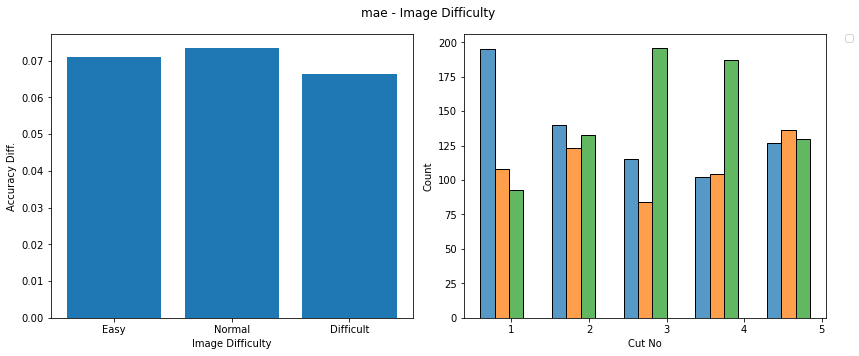

In [ ]:
participantId = 'mae'

trgt_df = df.loc[df['participantID'] == participantId, :]

img_diff_grpd = trgt_df.groupby(by = ['eff_label', 'expTime'], as_index = False)['correct'].mean()
eff_labels = img_diff_grpd['eff_label'].unique()

img_diff_grpd['acc_diff'] = 0
for lbl in eff_labels:
    img_diff_grpd.loc[(img_diff_grpd['eff_label'] == lbl) & (img_diff_grpd['expTime'] == 1.0), 'acc_diff'] = img_diff_grpd.loc[(img_diff_grpd['eff_label'] == lbl) & (img_diff_grpd['expTime'] == 1.0), 'correct'].values - img_diff_grpd.loc[(img_diff_grpd['eff_label'] == lbl) & (img_diff_grpd['expTime'] == 0.2), 'correct'].values
    
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].bar(x = eff_labels, height = img_diff_grpd.loc[img_diff_grpd['expTime'] == 1.0, 'acc_diff'].values)
#sns.barplot(data = df.loc[df['participantID'] == participantId, :], x = 'eff_label', y = 'correct', hue = 'expTime', ax = ax[0])
ax[0].set_xlabel('Image Difficulty')
ax[0].set_ylabel('Accuracy Diff.')

sns.histplot(data = df.loc[df['participantID'] == participantId, :], x = 'cutNo', hue = 'eff_label', multiple = "dodge", shrink = 1.8, ax = ax[1])
ax[1].set_xlabel('Cut No')
ax[1].get_legend().set_title("Image Difficulty")

ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

fig.suptitle(participantId + ' - Image Difficulty')
plt.tight_layout()

figname = 'figs/' + participantId + '/' + participantId +'_img_diff.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

## Response Model - Cum. nCut

In [ ]:
trgt_df.groupby(by = ['cutNo','expCond'], as_index=False)['keyCode'].mean()

cutNo  expCond   keyCode
0      1        1  0.424242
1      1        2  0.469697
2      2        1  0.479592
3      2        2  0.470000
4      3        1  0.641414
5      3        2  0.532995
6      4        1  0.593909
7      4        2  0.532995
8      5        1  0.678571
9      5        2  0.595960

In [ ]:
trgt_df = df.loc[df['participantID'] == participantId, :]

cogEffort = np.array(allImgs.quantile(np.arange(.70,.99,.05)).cumNcut)
#cogEffort = [0.01, 0.9]

initEff = 0.005

keyPress_dist = trgt_df.groupby(by = ['cutNo','expCond'], as_index=False)['keyCode'].mean()

imgs = trgt_df.shownImgID.values
segs = trgt_df.shownSegID.values
expTimes = trgt_df.expCond.values
cutNos = trgt_df.cutNo.values
img_diff = trgt_df.effortAll.values

allPredResp = np.zeros((len(cogEffort),len(trgt_df)))

for i in range(len(cogEffort)):
    thr = cogEffort[i]
    predResp = []
    
    for trgt_id in range(len(trgt_df)):
        trgt_img = imgs[trgt_id]
        trgt_seg = int(segs[trgt_id]) - 1
        trgt_expTime = expTimes[trgt_id]
        trgt_cutNo = cutNos[trgt_id]
        trgt_imgDiff = img_diff[trgt_id]

        # All the segments of the target image
        trgtImgSegs = allImgs.loc[allImgs['imgId'] == trgt_img,:] 

        # Cumulative ncut value up to that point
        cumNcut = trgtImgSegs.iloc[trgt_seg-1,4]

        # Add offset coming from img difficulty
        cumNcut = cumNcut +trgt_imgDiff
        
        # Add initial effort
        #cumNcut = cumNcut + initEff

        # Number of segments in the stock
        stockSize = len(trgtImgSegs.iloc[0:trgt_seg,4])

        # Derive how much effort the participant has

        effStored = thr

        # Predict response
        if effStored >= cumNcut:            
            prob = keyPress_dist.loc[(keyPress_dist['cutNo'] == trgt_cutNo) & (keyPress_dist['expCond'] == trgt_expTime), 'keyCode']
            resp = np.random.binomial(1, 1-prob, 1)
            #resp = 1
        else:            
            #prob = keyPress_dist.loc[(keyPress_dist['cutNo'] == trgt_cutNo) & (keyPress_dist['expCond'] == trgt_expTime), 'keyCode']
            resp = np.random.binomial(1, 0.5, 1)
            #resp = 0

        predResp.append(resp)
        
    allPredResp[i,:] = predResp

    #df.loc[(df['participantID'] == participantId) & (df['control'] == 0),'respPred'] = predResp

/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_13640/2050012726.py:60: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  allPredResp[i,:] = predResp


/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_13640/2164611823.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y_model_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)[0,1,2,3,4,5].mean()
/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_13640/2164611823.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',1,'',2,'',3,'',4,'',5], fontsize=15);
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


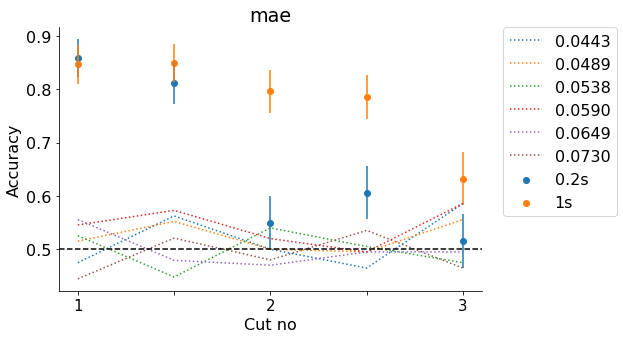

In [ ]:
test_df = df.loc[(df['participantID'] == participantId) & (df['control'] == 0)]
test_df = test_df.reset_index()
test_df = pd.concat([test_df, pd.DataFrame(allPredResp.T)], axis=1)

y_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


error = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']


y_model_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)[0,1,2,3,4,5].mean()

x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in range(0,6):
    colName = str(i)
    y_model = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId), i]
    ax.plot(x, y_model, linestyle='dotted', label = '{:.4f}'.format(cogEffort[i]))

ax.set_xticklabels(['',1,'',2,'',3,'',4,'',5], fontsize=15);

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.axhline(0.5,ls = '--', color = 'k')    
ax.set_title('{}'.format(participantId))
plt.tight_layout()

#figname = 'figs/' + participantId + '/' + participantId +'_response_model_ovrll.png'
#plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

## Response Model - Cut No

In [ ]:
trgt_df.groupby(by = ['cutNo','expCond'], as_index=False)['keyCode'].mean()

cutNo  expCond   keyCode
0      1        1  0.295918
1      1        2  0.240000
2      2        1  0.319588
3      2        2  0.232323
4      3        1  0.490000
5      3        2  0.285714
6      4        1  0.500000
7      4        2  0.390000
8      5        1  0.556701
9      5        2  0.373737

In [ ]:
cogEffort = [5]
#cogEffort = [0.01, 0.9]

initEff = 0.005

participantId = 'go'
trgt_df = df[(df['participantID'] == participantId) & (df['control'] == 0)]

keyPress_dist = trgt_df.groupby(by = ['cutNo','expCond'], as_index=False)['keyCode'].mean()

imgs = trgt_df.shownImgID.values
segs = trgt_df.shownSegID.values
expTimes = trgt_df.expCond.values
cutNos = trgt_df.cutNo.values
img_diff = trgt_df.effortAll.values

allPredResp = np.zeros((len(cogEffort),len(trgt_df)))

for i in range(len(cogEffort)):
    thr = cogEffort[i]
    predResp = []
    
    for trgt_id in range(len(trgt_df)):
        trgt_img = imgs[trgt_id]
        trgt_seg = int(segs[trgt_id]) - 1
        trgt_expTime = expTimes[trgt_id]
        trgt_cutNo = cutNos[trgt_id]
        trgt_imgDiff = img_diff[trgt_id]

        # All the segments of the target image
        trgtImgSegs = allImgs.loc[allImgs['imgId'] == trgt_img,:] 

        # Cumulative ncut value up to that point
        cumNcut = trgtImgSegs.iloc[trgt_seg-1,4]

        # Add offset coming from img difficulty
        cumNcut = cumNcut + trgt_imgDiff
        
        # Add initial effort
        #cumNcut = cumNcut + initEff

        # Number of segments in the stock
        stockSize = len(trgtImgSegs.iloc[0:trgt_seg,4])

        # Derive how much effort the participant has

        effStored = thr

        if trgt_imgDiff > 0.01:
            effStored = effStored - 1            

        # Predict response
        if effStored >= trgt_cutNo:            
            #prob = keyPress_dist.loc[(keyPress_dist['cutNo'] == trgt_cutNo) & (keyPress_dist['expCond'] == trgt_expTime), 'keyCode']
            #resp = np.random.binomial(1, 1-prob, 1)
            resp = 1
        else:            
            #prob = keyPress_dist.loc[(keyPress_dist['cutNo'] == trgt_cutNo) & (keyPress_dist['expCond'] == trgt_expTime), 'keyCode']
            resp = np.random.binomial(1, 0.5, 1)
            #resp = 0

        predResp.append(resp)
        
    allPredResp[i,:] = predResp

    #df.loc[(df['participantID'] == participantId) & (df['control'] == 0),'respPred'] = predResp

/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_13640/4025214083.py:64: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  allPredResp[i,:] = predResp


<AxesSubplot:ylabel='Count'>

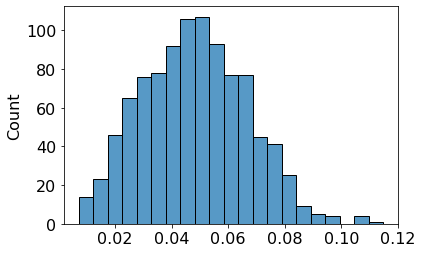

In [ ]:
sns.histplot(img_diff)

/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_13640/375188345.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',1,'',2,'',3,'',4,'',5], fontsize=15);


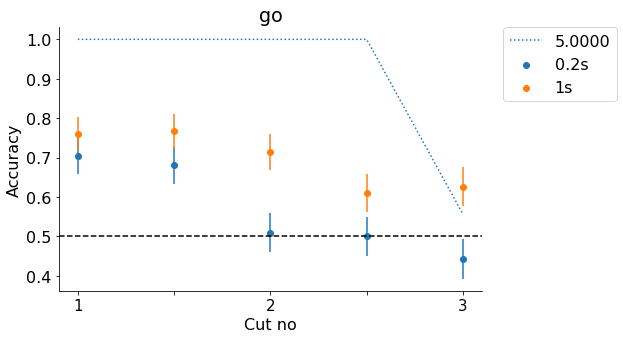

In [ ]:
test_df = df.loc[(df['participantID'] == participantId) & (df['control'] == 0)]
test_df = test_df.reset_index()
test_df = pd.concat([test_df, pd.DataFrame(allPredResp.T)], axis=1)

y_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


error = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']


y_model_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)[0].mean()

x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in range(len(cogEffort)):
    colName = str(i)
    y_model = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId), :].iloc[:,4 + i]
    ax.plot(x, y_model, linestyle='dotted', label = '{:.4f}'.format(cogEffort[i]))

ax.set_xticklabels(['',1,'',2,'',3,'',4,'',5], fontsize=15);

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.axhline(0.5,ls = '--', color = 'k')    
ax.set_title('{}'.format(participantId))
plt.tight_layout()

#figname = 'figs/' + participantId + '/' + participantId +'_response_model_ovrll.png'
#plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [ ]:
y_model

0    0
2    0
4    0
6    0
8    0
Name: control, dtype: int64

In [ ]:
y_model_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)[0].mean()

## Export df

In [ ]:
go.to_csv('data/go/go.csv', index = False)

In [ ]:
target_vars = ['segSize','segCentDist',
                    'intDiff', 'meanSegInt','deltaInt']
upp_mat = np.triu(df.loc[:,target_vars].corr())
plt.figure(figsize=(8,6))
sns.heatmap(df.loc[:,target_vars].corr(), annot = True, cmap = 'coolwarm', mask = upp_mat)

# 19.01 - U.M.

In [ ]:
participantId = 'um'
path ='data/' + participantId + '/'
list_of_files = []

for file in os.listdir(path):
    if file.endswith(".mat"):
        list_of_files.append(file)

num_trials = []
for i,j in enumerate(list_of_files):
    mat_fname = (path + j)
    mat_contents = sio.loadmat(mat_fname)

    if i == 0:
        presentedImgs = mat_contents['presentedSegs'][:,7]
        segIntensity = mat_contents['presentedSegs'][:,8]
        segPos = mat_contents['presentedSegs'][:,9]
        respMatrix = mat_contents['respMatrix']
        num_trials.append(respMatrix.shape[0])
    else:
        newPresentedImg = mat_contents['presentedSegs'][:,7]
        presentedImgs = np.concatenate((presentedImgs, newPresentedImg), axis=0)

        newSegIntensity = mat_contents['presentedSegs'][:,8]
        segIntensity = np.concatenate((segIntensity, newSegIntensity), axis=0)

        newSegPos = mat_contents['presentedSegs'][:,9]
        segPos = np.concatenate((segPos, newSegPos), axis=0)

        newRespMatrix = mat_contents['respMatrix']
        num_trials.append(newRespMatrix.shape[0])
        respMatrix = np.concatenate((respMatrix, newRespMatrix), axis=0)


colNames = ['trialId','trialNo','blockNo','cutNo','expCond','control','keyCode',
            'shownImgID', 'shownFoilID', 'shownSegID',
            'reactionTime','segSize','segCenterX', 'segCenterY','segCentDist',
            'intDiff','intStd','segNcut','segStab', 'leaf','correct', 'meanImgInt',
            'meanSegInt','deltaInt','intOrder']

um = pd.DataFrame(respMatrix, columns = colNames)
um['participantID'] = participantId

# Make -1 nCut Values 1
um.loc[um['segNcut'] == -1,'segNcut'] = 1

# Make negative reaction Times positive
um['reactionTime'] = np.abs(um['reactionTime'])

# Assign expTime

um.loc[um['expCond'] == 1,'expTime'] = 0.2
um.loc[um['expCond'] == 2,'expTime'] = 1


um['presentedImgs'] = presentedImgs
um['segIntensity'] = segIntensity
um['segPos'] = segPos
um['intVals'] = pd.Series([np.reshape(mat_contents['settings'][1][0],-1)]*len(um))
um['intDelta'] = mat_contents['settings'][4][0][0][0]
um['date'] = '19-01-2023'
um['nmcPars'] = pd.Series([np.reshape(mat_contents['settings'][2][0],-1)]*len(um))

# Arrange positions
participantIdList = um.pop('participantID')
um.insert(0,'participantID', participantIdList)

expData = um.pop('date')
um.insert(1,'date',expData)


# Define continuous variables
contVars = ['cutNo','reactionTime', 'segSize', 'segCenterX', 'segCenterY', 'segCentDist',
            'intDiff','intStd','meanImgInt', 'meanSegInt','deltaInt', 'intOrder']

newContVars = ['normed_cutNo','normed_reactionTime', 'normed_segSize', 'normed_segCenterX', 'normed_segCenterY', 'normed_segCentDist',
            'normed_intDiff','normed_intStd','normed_meanImgInt', 'normed_meanSegInt','normed_deltaInt', 'normed_intOrder']

# Define factors
catVars = ['blockNo','expTime','control','leaf','correct', 'intOrder', 'segNcut']

um = um[um['blockNo'] > 0]
um = um.sort_values(by = 'trialId')
um.loc[um['blockNo'] > 10, 'date'] = '16-01-2023'

um = um.reset_index(drop=True)

# Normalize your data
for i,j in enumerate(contVars):
    standardize(um, j, newContVars[i])

#go = go.dropna()
um = um.set_index('trialId')

Text(0.5, 1.0, 'Test')

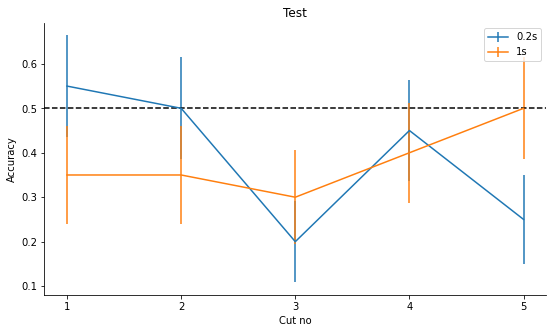

In [ ]:
error = um.groupby(['cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0), 'correct']

y_mean = um.groupby(['cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0),'correct']

x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Test')

#figname = 'figs/' + participantId + '/' + participantId +'_test.png'
#plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

# 20.01 - J.S.

In [ ]:
participantId = 'js'
path ='data/' + participantId + '/'
list_of_files = []

for file in os.listdir(path):
    if file.endswith(".mat"):
        list_of_files.append(file)

num_trials = []
for i,j in enumerate(list_of_files):
    mat_fname = (path + j)
    mat_contents = sio.loadmat(mat_fname)

    if i == 0:
        presentedImgs = mat_contents['presentedSegs'][:,7]
        segIntensity = mat_contents['presentedSegs'][:,8]
        segPos = mat_contents['presentedSegs'][:,9]
        respMatrix = mat_contents['respMatrix']
        num_trials.append(respMatrix.shape[0])
    else:
        newPresentedImg = mat_contents['presentedSegs'][:,7]
        presentedImgs = np.concatenate((presentedImgs, newPresentedImg), axis=0)

        newSegIntensity = mat_contents['presentedSegs'][:,8]
        segIntensity = np.concatenate((segIntensity, newSegIntensity), axis=0)

        newSegPos = mat_contents['presentedSegs'][:,9]
        segPos = np.concatenate((segPos, newSegPos), axis=0)

        newRespMatrix = mat_contents['respMatrix']
        num_trials.append(newRespMatrix.shape[0])
        respMatrix = np.concatenate((respMatrix, newRespMatrix), axis=0)


colNames = ['trialId','trialNo','blockNo','cutNo','expCond','control','keyCode',
            'shownImgID', 'shownFoilID', 'shownSegID',
            'reactionTime','segSize','segCenterX', 'segCenterY','segCentDist',
            'intDiff','intStd','segNcut','segStab', 'leaf','correct', 'meanImgInt',
            'meanSegInt','deltaInt','intOrder']

js = pd.DataFrame(respMatrix, columns = colNames)
js['participantID'] = participantId

# Make -1 nCut Values 1
js.loc[js['segNcut'] == -1,'segNcut'] = 1

# Make negative reaction Times positive
js['reactionTime'] = np.abs(js['reactionTime'])

# Assign expTime

js.loc[js['expCond'] == 1,'expTime'] = 0.2
js.loc[js['expCond'] == 2,'expTime'] = 1


js['presentedImgs'] = presentedImgs
js['segIntensity'] = segIntensity
js['segPos'] = segPos
js['intVals'] = pd.Series([np.reshape(mat_contents['settings'][1][0],-1)]*len(js))
js['intDelta'] = mat_contents['settings'][4][0][0][0]
js['date'] = '19-01-2023'
js['nmcPars'] = pd.Series([np.reshape(mat_contents['settings'][2][0],-1)]*len(js))

# Arrange positions
participantIdList = js.pop('participantID')
js.insert(0,'participantID', participantIdList)

expData = js.pop('date')
js.insert(1,'date',expData)


# Define continuous variables
contVars = ['cutNo','reactionTime', 'segSize', 'segCenterX', 'segCenterY', 'segCentDist',
            'intDiff','intStd','meanImgInt', 'meanSegInt','deltaInt', 'intOrder']

newContVars = ['normed_cutNo','normed_reactionTime', 'normed_segSize', 'normed_segCenterX', 'normed_segCenterY', 'normed_segCentDist',
            'normed_intDiff','normed_intStd','normed_meanImgInt', 'normed_meanSegInt','normed_deltaInt', 'normed_intOrder']

# Define factors
catVars = ['blockNo','expTime','control','leaf','correct', 'intOrder', 'segNcut']

js = js[js['blockNo'] > 0]
js = js.sort_values(by = 'trialId')
js.loc[js['blockNo'] > 10, 'date'] = '16-01-2023'

js = js.reset_index(drop=True)

# Normalize your data
for i,j in enumerate(contVars):
    standardize(js, j, newContVars[i])

#go = go.dropna()
js = js.set_index('trialId')

In [ ]:
# Load effort scores
filename = path + 'js_cumNcuts.csv'
js_cumNcuts = pd.read_csv(filename, index_col=False, header=None)


cumNcutColNames = ['id', 'blockNo', 'trialNo', 'cutNo','effScoreAll', 'effScoreCutNo']
js_cumNcuts.columns = cumNcutColNames

js_cumNcuts = js_cumNcuts.set_index('id')
js['effortAll'] = js_cumNcuts.iloc[:,3]
js['effortUp'] = js_cumNcuts.iloc[:,4]

standardize(js, 'effortAll', 'normed_effortAll')

In [ ]:
# Load similarity scores
filename = path + 'js_similarityScores.csv'
js_similarity = pd.read_csv(filename, index_col=False, header=None)


simColNames = ['id','blockNo', 'trialNo', 'cutNo','simScore','closestCutNo']
js_similarity.columns = simColNames
js_similarity = js_similarity.set_index('id')

#go_sim_grouped = go_similarity.groupby(by ='id', as_index=False)['avgCrossCorr'].max()
#go_sim_grouped = go_sim_grouped.set_index('id')

# Assign them into the main df
js['simScore'] = js_similarity['simScore']
js['closestSeg'] = js_similarity['closestCutNo']

standardize(js, 'simScore', 'normed_simScore')


In [ ]:
js = js.dropna(subset = ['keyCode'])

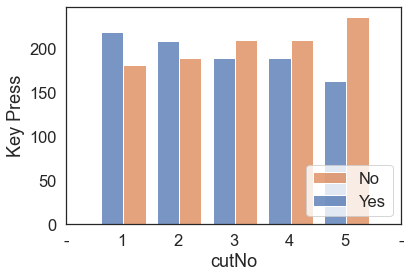

In [ ]:
participantId = 'js'

trgt_df = df[df['participantID'] == participantId]

min_val = trgt_df.cutNo.min()
max_val = trgt_df.cutNo.max()
val_width = max_val - min_val
n_bins = 5
bin_width = val_width/n_bins

keyPlot = sns.histplot(data=trgt_df, x="cutNo", hue="keyCode", multiple="dodge", bins=n_bins, binrange=(min_val, max_val), shrink = 0.8)
keyPlot.legend(['No','Yes'],loc = 'lower right')
#keyPlot.set_xticks(np.unique(eb['cutNo'])) # <--- set the ticks first
keyPlot.set_xticks(np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width)) # <--- set the ticks first
keyPlot.set_xticklabels(['-','1', '2', '3', '4', '5','-']);
keyPlot.set_ylabel('Key Press')

figname = 'figs/' + participantId + '/' + participantId +'_key_press_dist.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

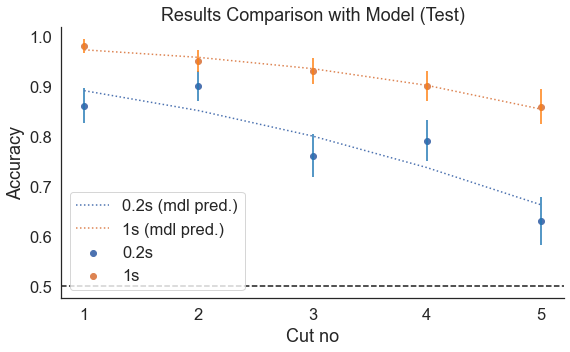

In [ ]:
participantId = 'js'

error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_cutNo'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId) ,'pHat_cutNo']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 0) & (y_model_mean['participantID'] == participantId),'pHat_cutNo']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Results Comparison with Model (Test)')

figname = 'figs/' + participantId + '/' + participantId +'_test.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

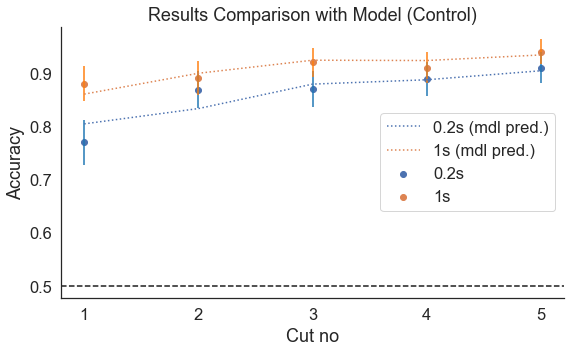

In [ ]:
participantId = 'js'

error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_sim'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 1)& (y_model_mean['participantID'] == participantId) ,'pHat_sim']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 1) & (y_model_mean['participantID'] == participantId),'pHat_sim']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Results Comparison with Model (Control)')

figname = 'figs/' + participantId + '/' + participantId +'_cntrl.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

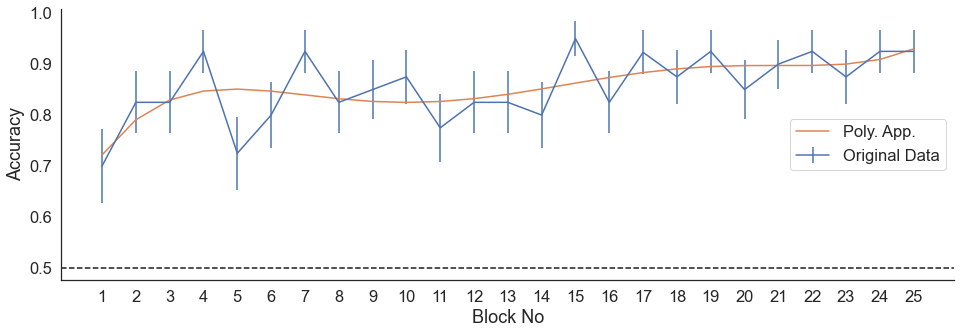

In [ ]:
participantId = 'js'
trgt_df = df.loc[df['participantID'] == participantId]

error = trgt_df.groupby(['blockNo','control'],as_index=False)['correct'].sem()
error_test = error.loc[(error['control'] == 0), 'correct']

y_mean = trgt_df.groupby(['blockNo','control'],as_index=False)['correct'].mean()
y_mean_test = y_mean.loc[(y_mean['control'] == 0),'correct']

x = np.arange(1,len(y_mean_test) + 1)

# Apply polynomial curve smoothing
poly = np.polyfit(x,y_mean_test,5)
poly_y = np.poly1d(poly)(x)

fig, ax = plt.subplots(figsize=(16,5))
ax.errorbar(x, y_mean_test, yerr = error_test, label = 'Original Data')
ax.plot(x, poly_y, label = 'Poly. App.')
ax.set_xlabel('Block No')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,26))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()

figname = 'figs/' + participantId + '/' + participantId +'_learning.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)



# 26.01 / 30.1 - D.A.

In [ ]:
participantId = 'da'
path ='data/' + participantId + '/'
list_of_files = []

for file in os.listdir(path):
    if file.endswith(".mat"):
        list_of_files.append(file)

num_trials = []
for i,j in enumerate(list_of_files):
    mat_fname = (path + j)
    mat_contents = sio.loadmat(mat_fname)

    if i == 0:
        presentedImgs = mat_contents['presentedSegs'][:,7]
        segIntensity = mat_contents['presentedSegs'][:,8]
        segPos = mat_contents['presentedSegs'][:,9]
        respMatrix = mat_contents['respMatrix']
        num_trials.append(respMatrix.shape[0])
    else:
        newPresentedImg = mat_contents['presentedSegs'][:,7]
        presentedImgs = np.concatenate((presentedImgs, newPresentedImg), axis=0)

        newSegIntensity = mat_contents['presentedSegs'][:,8]
        segIntensity = np.concatenate((segIntensity, newSegIntensity), axis=0)

        newSegPos = mat_contents['presentedSegs'][:,9]
        segPos = np.concatenate((segPos, newSegPos), axis=0)

        newRespMatrix = mat_contents['respMatrix']
        num_trials.append(newRespMatrix.shape[0])
        respMatrix = np.concatenate((respMatrix, newRespMatrix), axis=0)


colNames = ['trialId','trialNo','blockNo','cutNo','expCond','control','keyCode',
            'shownImgID', 'shownFoilID', 'shownSegID',
            'reactionTime','segSize','segCenterX', 'segCenterY','segCentDist',
            'intDiff','intStd','segNcut','segStab', 'leaf','correct', 'meanImgInt',
            'meanSegInt','deltaInt','intOrder']

da = pd.DataFrame(respMatrix, columns = colNames)
da['participantID'] = participantId

# Make -1 nCut Values 1
da.loc[da['segNcut'] == -1,'segNcut'] = 1

# Make negative reaction Times positive
da['reactionTime'] = np.abs(da['reactionTime'])

# Assign expTime

da.loc[da['expCond'] == 1,'expTime'] = 0.2
da.loc[da['expCond'] == 2,'expTime'] = 1


da['presentedImgs'] = presentedImgs
da['segIntensity'] = segIntensity
da['segPos'] = segPos
da['intVals'] = pd.Series([np.reshape(mat_contents['settings'][1][0],-1)]*len(da))
da['intDelta'] = mat_contents['settings'][4][0][0][0]
da['date'] = '26-01-2023'
da['nmcPars'] = pd.Series([np.reshape(mat_contents['settings'][2][0],-1)]*len(da))

# Arrange positions
participantIdList = da.pop('participantID')
da.insert(0,'participantID', participantIdList)

expData = da.pop('date')
da.insert(1,'date',expData)


# Define continuous variables
contVars = ['cutNo','reactionTime', 'segSize', 'segCenterX', 'segCenterY', 'segCentDist',
            'intDiff','intStd','meanImgInt', 'meanSegInt','deltaInt', 'intOrder']

newContVars = ['normed_cutNo','normed_reactionTime', 'normed_segSize', 'normed_segCenterX', 'normed_segCenterY', 'normed_segCentDist',
            'normed_intDiff','normed_intStd','normed_meanImgInt', 'normed_meanSegInt','normed_deltaInt', 'normed_intOrder']

# Define factors
catVars = ['blockNo','expTime','control','leaf','correct', 'intOrder', 'segNcut']

da = da[da['blockNo'] > 0]
da = da.sort_values(by = 'trialId')
da.loc[da['blockNo'] > 10, 'date'] = '16-01-2023'

da = da.reset_index(drop=True)

# Normalize your data
for i,j in enumerate(contVars):
    standardize(da, j, newContVars[i])

#go = go.dropna()
da = da.set_index('trialId')

In [ ]:
da = da.dropna(subset = ['keyCode'])

In [ ]:
# Load effort scores
filename = path + 'da_cumNcuts.csv'
da_cumNcuts = pd.read_csv(filename, index_col=False, header=None)


cumNcutColNames = ['id', 'blockNo', 'trialNo', 'cutNo','effScoreAll', 'effScoreCutNo']
da_cumNcuts.columns = cumNcutColNames

da_cumNcuts = da_cumNcuts.set_index('id')
da['effortAll'] = da_cumNcuts.iloc[:,3]
da['effortUp'] = da_cumNcuts.iloc[:,4]

standardize(da, 'effortAll', 'normed_effortAll')

In [ ]:
# Load similarity scores
filename = path + 'da_similarityScores.csv'
da_similarity = pd.read_csv(filename, index_col=False, header=None)


simColNames = ['id','blockNo', 'trialNo', 'cutNo','simScore','closestCutNo']
da_similarity.columns = simColNames
da_similarity = da_similarity.set_index('id')

#go_sim_grouped = go_similarity.groupby(by ='id', as_index=False)['avgCrossCorr'].max()
#go_sim_grouped = go_sim_grouped.set_index('id')

# Assign them into the main df
da['simScore'] = da_similarity['simScore']
da['closestSeg'] = da_similarity['closestCutNo']

standardize(da, 'simScore', 'normed_simScore')


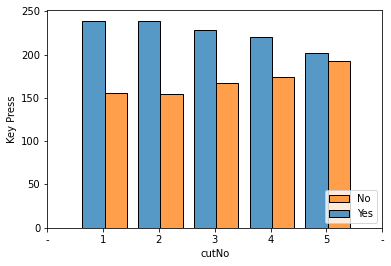

In [ ]:
participantId = 'da'

trgt_df = df[df['participantID'] == participantId]

min_val = trgt_df.cutNo.min()
max_val = trgt_df.cutNo.max()
val_width = max_val - min_val
n_bins = 5
bin_width = val_width/n_bins

keyPlot = sns.histplot(data=trgt_df, x="cutNo", hue="keyCode", multiple="dodge", bins=n_bins, binrange=(min_val, max_val), shrink = 0.8)
keyPlot.legend(['No','Yes'],loc = 'lower right')
#keyPlot.set_xticks(np.unique(eb['cutNo'])) # <--- set the ticks first
keyPlot.set_xticks(np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width)) # <--- set the ticks first
keyPlot.set_xticklabels(['-','1', '2', '3', '4', '5','-']);
keyPlot.set_ylabel('Key Press')

figname = 'figs/' + participantId + '/' + participantId +'_key_press_dist.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

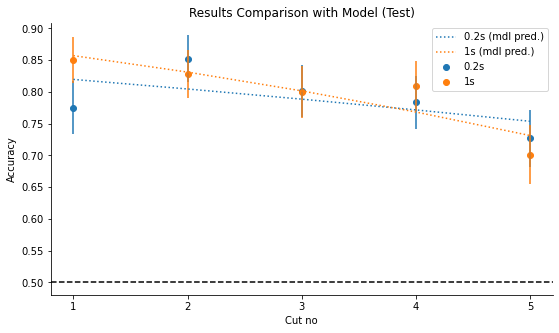

In [ ]:
participantId = 'da'

error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_cutNo'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId) ,'pHat_cutNo']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 0) & (y_model_mean['participantID'] == participantId),'pHat_cutNo']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Results Comparison with Model (Test)')

figname = 'figs/' + participantId + '/' + participantId +'_test.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

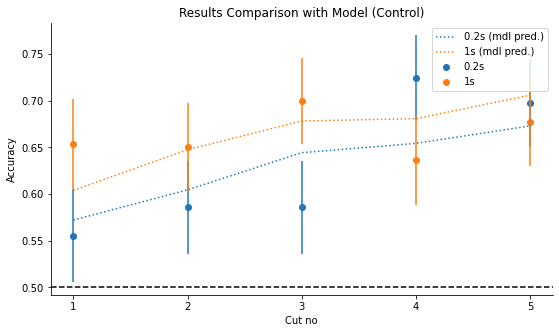

In [ ]:
participantId = 'da'

error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_sim'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 1)& (y_model_mean['participantID'] == participantId) ,'pHat_sim']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 1) & (y_model_mean['participantID'] == participantId),'pHat_sim']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Results Comparison with Model (Control)')

figname = 'figs/' + participantId + '/' + participantId +'_cntrl.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

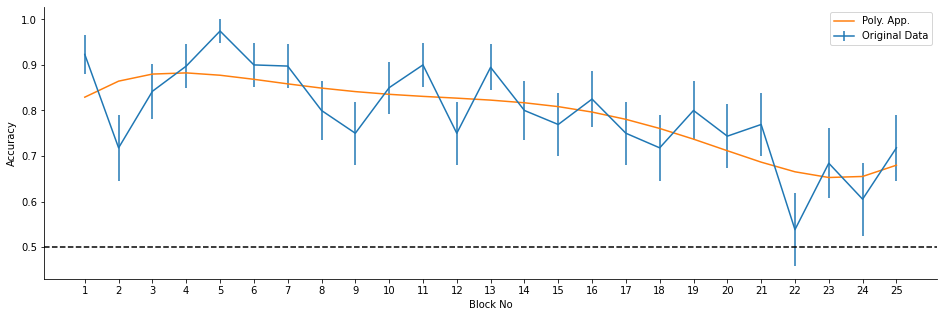

In [ ]:
error = da.groupby(['blockNo','control'],as_index=False)['correct'].sem()
error_test = error.loc[(error['control'] == 0), 'correct']

y_mean = da.groupby(['blockNo','control'],as_index=False)['correct'].mean()
y_mean_test = y_mean.loc[(y_mean['control'] == 0),'correct']

x = np.arange(1,len(y_mean_test) + 1)

# Apply polynomial curve smoothing
poly = np.polyfit(x,y_mean_test,5)
poly_y = np.poly1d(poly)(x)

fig, ax = plt.subplots(figsize=(16,5))
ax.errorbar(x, y_mean_test, yerr = error_test, label = 'Original Data')
ax.plot(x, poly_y, label = 'Poly. App.')
ax.set_xlabel('Block No')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,26))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()

figname = 'figs/' + participantId + '/' + participantId +'_learning.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)



# 28.1 - R.E.

In [ ]:
participantId = 're'
path ='data/' + participantId + '/'
list_of_files = []

for file in os.listdir(path):
    if file.endswith(".mat"):
        list_of_files.append(file)

num_trials = []
for i,j in enumerate(list_of_files):
    mat_fname = (path + j)
    mat_contents = sio.loadmat(mat_fname)

    if i == 0:
        presentedImgs = mat_contents['presentedSegs'][:,7]
        segIntensity = mat_contents['presentedSegs'][:,8]
        segPos = mat_contents['presentedSegs'][:,9]
        respMatrix = mat_contents['respMatrix']
        num_trials.append(respMatrix.shape[0])
    else:
        newPresentedImg = mat_contents['presentedSegs'][:,7]
        presentedImgs = np.concatenate((presentedImgs, newPresentedImg), axis=0)

        newSegIntensity = mat_contents['presentedSegs'][:,8]
        segIntensity = np.concatenate((segIntensity, newSegIntensity), axis=0)

        newSegPos = mat_contents['presentedSegs'][:,9]
        segPos = np.concatenate((segPos, newSegPos), axis=0)

        newRespMatrix = mat_contents['respMatrix']
        num_trials.append(newRespMatrix.shape[0])
        respMatrix = np.concatenate((respMatrix, newRespMatrix), axis=0)


colNames = ['trialId','trialNo','blockNo','cutNo','expCond','control','keyCode',
            'shownImgID', 'shownFoilID', 'shownSegID',
            'reactionTime','segSize','segCenterX', 'segCenterY','segCentDist',
            'intDiff','intStd','segNcut','segStab', 'leaf','correct', 'meanImgInt',
            'meanSegInt','deltaInt','intOrder']

re = pd.DataFrame(respMatrix, columns = colNames)
re['participantID'] = participantId

# Make -1 nCut Values 1
re.loc[re['segNcut'] == -1,'segNcut'] = 1

# Make negative reaction Times positive
re['reactionTime'] = np.abs(re['reactionTime'])

# Assign expTime

re.loc[re['expCond'] == 1,'expTime'] = 0.2
re.loc[re['expCond'] == 2,'expTime'] = 1


re['presentedImgs'] = presentedImgs
re['segIntensity'] = segIntensity
re['segPos'] = segPos
re['intVals'] = pd.Series([np.reshape(mat_contents['settings'][1][0],-1)]*len(re))
re['intDelta'] = mat_contents['settings'][4][0][0][0]
re['date'] = '27-01-2023'
re['nmcPars'] = pd.Series([np.reshape(mat_contents['settings'][2][0],-1)]*len(re))

# Arrange positions
participantIdList = re.pop('participantID')
re.insert(0,'participantID', participantIdList)

expData = re.pop('date')
re.insert(1,'date',expData)


# Define continuous variables
contVars = ['cutNo','reactionTime', 'segSize', 'segCenterX', 'segCenterY', 'segCentDist',
            'intDiff','intStd','meanImgInt', 'meanSegInt','deltaInt', 'intOrder']

newContVars = ['normed_cutNo','normed_reactionTime', 'normed_segSize', 'normed_segCenterX', 'normed_segCenterY', 'normed_segCentDist',
            'normed_intDiff','normed_intStd','normed_meanImgInt', 'normed_meanSegInt','normed_deltaInt', 'normed_intOrder']

# Define factors
catVars = ['blockNo','expTime','control','leaf','correct', 'intOrder', 'segNcut']

re = re[re['blockNo'] > 0]
re = re.sort_values(by = 'trialId')
re.loc[re['blockNo'] > 10, 'date'] = '28-01-2023'

re = re.reset_index(drop=True)

# Normalize your data
for i,j in enumerate(contVars):
    standardize(re, j, newContVars[i])

#go = go.dropna()
re = re.set_index('trialId')

In [ ]:
re = re.dropna(subset = ['keyCode'])

In [ ]:
# Load effort scores
filename = path + 're_cumNcuts.csv'
re_cumNcuts = pd.read_csv(filename, index_col=False, header=None)


cumNcutColNames = ['id', 'blockNo', 'trialNo', 'cutNo','effScoreAll', 'effScoreCutNo']
re_cumNcuts.columns = cumNcutColNames

re_cumNcuts = re_cumNcuts.set_index('id')
re['effortAll'] = re_cumNcuts.iloc[:,3]
re['effortUp'] = re_cumNcuts.iloc[:,4]

standardize(re, 'effortAll', 'normed_effortAll')

In [ ]:
# Load similarity scores
filename = path + 're_similarityScores.csv'
re_similarity = pd.read_csv(filename, index_col=False, header=None)


simColNames = ['id','blockNo', 'trialNo', 'cutNo','simScore','closestCutNo']
re_similarity.columns = simColNames
re_similarity = re_similarity.set_index('id')

#go_sim_grouped = go_similarity.groupby(by ='id', as_index=False)['avgCrossCorr'].max()
#go_sim_grouped = go_sim_grouped.set_index('id')

# Assign them into the main df
re['simScore'] = re_similarity['simScore']
re['closestSeg'] = re_similarity['closestCutNo']

standardize(re, 'simScore', 'normed_simScore')


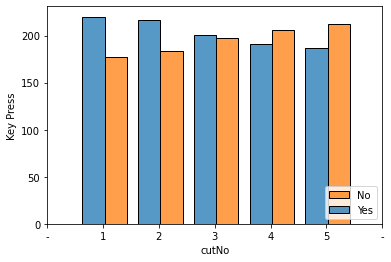

In [ ]:
participantId = 're'

trgt_df = re[re['participantID'] == participantId]

min_val = trgt_df.cutNo.min()
max_val = trgt_df.cutNo.max()
val_width = max_val - min_val
n_bins = 5
bin_width = val_width/n_bins

keyPlot = sns.histplot(data=trgt_df, x="cutNo", hue="keyCode", multiple="dodge", bins=n_bins, binrange=(min_val, max_val), shrink = 0.8)
keyPlot.legend(['No','Yes'],loc = 'lower right')
#keyPlot.set_xticks(np.unique(eb['cutNo'])) # <--- set the ticks first
keyPlot.set_xticks(np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width)) # <--- set the ticks first
keyPlot.set_xticklabels(['-','1', '2', '3', '4', '5','-']);
keyPlot.set_ylabel('Key Press')

figname = 'figs/' + participantId + '/' + participantId +'_key_press_dist.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

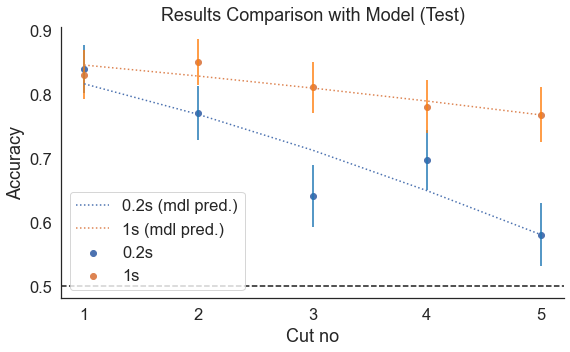

In [ ]:
participantId = 're'

error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_cutNo'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId) ,'pHat_cutNo']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 0) & (y_model_mean['participantID'] == participantId),'pHat_cutNo']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Results Comparison with Model (Test)')

figname = 'figs/' + participantId + '/' + participantId +'_test.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

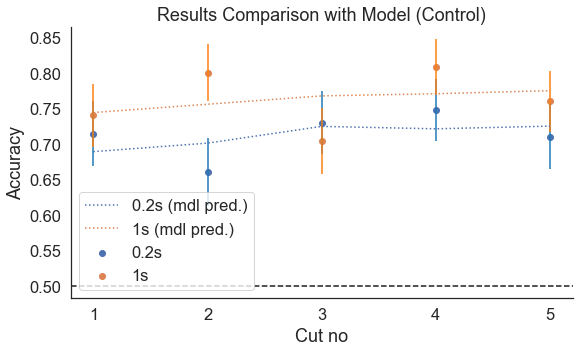

In [ ]:
participantId = 're'

error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 1) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 1) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_sim'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 1)& (y_model_mean['participantID'] == participantId) ,'pHat_sim']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 1) & (y_model_mean['participantID'] == participantId),'pHat_sim']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('Results Comparison with Model (Control)')

figname = 'figs/' + participantId + '/' + participantId +'_cntrl.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

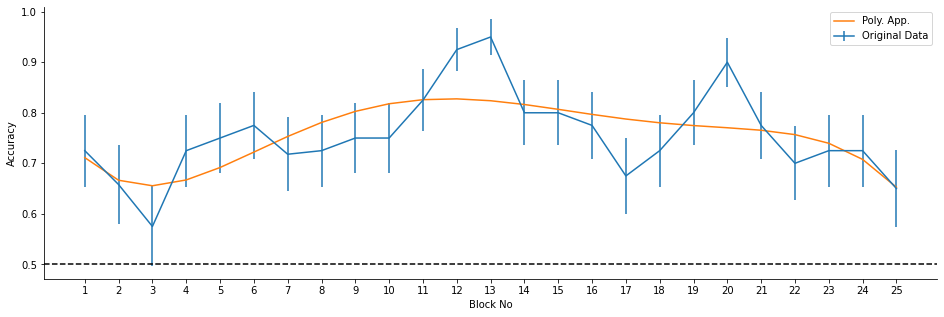

In [ ]:
error = re.groupby(['blockNo','control'],as_index=False)['correct'].sem()
error_test = error.loc[(error['control'] == 0), 'correct']

y_mean = re.groupby(['blockNo','control'],as_index=False)['correct'].mean()
y_mean_test = y_mean.loc[(y_mean['control'] == 0),'correct']

x = np.arange(1,len(y_mean_test) + 1)

# Apply polynomial curve smoothing
poly = np.polyfit(x,y_mean_test,5)
poly_y = np.poly1d(poly)(x)

fig, ax = plt.subplots(figsize=(16,5))
ax.errorbar(x, y_mean_test, yerr = error_test, label = 'Original Data')
ax.plot(x, poly_y, label = 'Poly. App.')
ax.set_xlabel('Block No')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(1,26))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()

figname = 'figs/' + participantId + '/' + participantId +'_learning.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)



# Combine Data Frames

In [ ]:
df = pd.concat([eb,my_thr_df, sw_df, go, mae, re])
df = df.reset_index()
df.to_csv('data/all.csv', index = False)
df.to_pickle('data/all.pkl')


In [ ]:
df = pd.concat([df, js])
df = df.reset_index()
df = df.drop(columns = ['index'])
df.to_csv('data/all3.csv', index = False)
df.to_pickle('data/all3.pkl')
df


participantID        date  trialNo  blockNo  cutNo  expCond  control  \
0                eb  03-12-2022      3.0      1.0    4.0      1.0      0.0   
1                eb  03-12-2022      4.0      1.0    5.0      2.0      0.0   
2                eb  03-12-2022      5.0      1.0    3.0      1.0      1.0   
3                eb  03-12-2022      6.0      1.0    2.0      1.0      1.0   
4                eb  03-12-2022      7.0      1.0    5.0      2.0      0.0   
...             ...         ...      ...      ...    ...      ...      ...   
15075            js  16-01-2023     76.0     25.0    4.0      1.0      0.0   
15076            js  16-01-2023     77.0     25.0    5.0      1.0      0.0   
15077            js  16-01-2023     78.0     25.0    3.0      2.0      0.0   
15078            js  16-01-2023     79.0     25.0    4.0      1.0      0.0   
15079            js  16-01-2023     80.0     25.0    3.0      2.0      0.0   

       keyCode  shownImgID  shownFoilID  ...  normed_effortAll  simScore  \
0          1.0     60578.0          0.0  ...          1.071508       NaN   
1          1.0     14475.0          0.0  ...         -0.334981       NaN   
2          1.0     13753.0      34952.0  ...         -0.100489  0.583333   
3          1.0     92495.0      48386.0  ...         -1.839053  0.666667   
4          1.0     50416.0          0.0  ...          0.755910       NaN   
...        ...         ...          ...  ...               ...       ...   
15075      1.0     82398.0          0.0  ...          0.548728       NaN   
15076      1.0     75622.0          0.0  ...          0.857142       NaN   
15077      0.0     72326.0          0.0  ...         -0.287802       NaN   
15078      0.0     86148.0          0.0  ...          0.430768       NaN   
15079      0.0     53421.0          0.0  ...         -0.839086       NaN   

       closestSeg  normed_simScore  trialId  pHat_effort  pHat_cutNo  \
0             NaN              NaN      NaN     0.585933    0.630416   
1             NaN              NaN      NaN     0.683085    0.685759   
2             4.0         0.400192      NaN          NaN         NaN   
3             5.0         1.056474      NaN          NaN         NaN   
4             NaN              NaN      NaN     0.690781    0.685759   
...           ...              ...      ...          ...         ...   
15075         NaN              NaN      NaN          NaN         NaN   
15076         NaN              NaN      NaN          NaN         NaN   
15077         NaN              NaN      NaN          NaN         NaN   
15078         NaN              NaN      NaN          NaN         NaN   
15079         NaN              NaN      NaN          NaN         NaN   

       pHat_sim  pHat_seg  eff_label  
0           NaN       NaN  Difficult  
1           NaN       NaN       Easy  
2      0.759347  0.734600       Easy  
3      0.711467  0.781106       Easy  
4           NaN       NaN  Difficult  
...         ...       ...        ...  
15075       NaN       NaN        NaN  
15076       NaN       NaN        NaN  
15077       NaN       NaN        NaN  
15078       NaN       NaN        NaN  
15079       NaN       NaN        NaN  

[15080 rows x 57 columns]

In [ ]:
df.to_csv('data/all_last.csv', index = False)
df.to_pickle('data/all_last.pkl')


# Response Model

In [ ]:
file_pth = 'data/all_img_cumNcuts.csv'

# Load all the cumulative Ncut values
allImgs = pd.read_csv(file_pth, header= None)

imgColNames = ['imgId', 'cutNo', 'ncut', 'stab','cumNcut']
allImgs.columns = imgColNames


In [ ]:
cogEffort = np.array(allImgs.quantile([.75, .8]).cumNcut)
#cogEffort = [0.01, 0.9]

participantId = 'eb'
trgt_df = df[(df['participantID'] == participantId) & (df['control'] == 0)]

imgs = trgt_df.shownImgID.values
segs = trgt_df.shownSegID.values
expTimes = trgt_df.expCond.values
cutNos = trgt_df.cutNo.values

predResp = []

for trgt_id in range(len(trgt_df)):
    trgt_img = imgs[trgt_id]
    trgt_seg = int(segs[trgt_id]) - 1
    trgt_expTime = expTimes[trgt_id]
    trgt_cutNo = cutNos[trgt_id]

    # All the segments of the target image
    trgtImgSegs = allImgs.loc[allImgs['imgId'] == df,:] 

    # Cumulative ncut value up to that point
    cumNcut = trgtImgSegs.iloc[trgt_seg-1,4]

    # Number of segments in the stock
    stockSize = len(trgtImgSegs.iloc[0:trgt_seg,4])

    # Derive how much effort the participant has
    if trgt_expTime == 1:
        effStored = cogEffort[0]
    elif trgt_expTime == 2:
        effStored = cogEffort[1]

    # Predict response
    if effStored >= cumNcut:
        resp = 1
    else:
        resp = 0

    predResp.append(resp)
        

df.loc[(df['participantID'] == participantId) & (df['control'] == 0),'respPred'] = predResp

/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_59902/1264935370.py:21: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  trgtImgSegs = allImgs.loc[allImgs['imgId'] == df,:]


: 

: 

In [ ]:
participantId = 'eb'

error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['respPred'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId) ,'respPred']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 0) & (y_model_mean['participantID'] == participantId),'respPred']


sns.set(font_scale = 1.5, style="white")
x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')

ax.set_xlabel('Cut no', fontsize = 16)
ax.set_ylabel('Accuracy', fontsize = 16)

ax.set_xticklabels(x, fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('{} - Response Model Accuracy (Test)'.format(participantId))



figname = 'figs/' + participantId + '/' + participantId +'_response_model.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [ ]:
cogEffort = np.array(allImgs.quantile(np.arange(.65,.95,.05)).cumNcut)
#cogEffort = [0.01, 0.9]

initEff = 0.005

participantId = 'eb'
trgt_df = df[(df['participantID'] == participantId) & (df['control'] == 0)]

imgs = trgt_df.shownImgID.values
segs = trgt_df.shownSegID.values
expTimes = trgt_df.expCond.values
cutNos = trgt_df.cutNo.values


allPredResp = np.zeros((len(cogEffort),len(trgt_df)))

for i in range(len(cogEffort)):
    thr = cogEffort[i]
    predResp = []
    
    for trgt_id in range(len(trgt_df)):
        trgt_img = imgs[trgt_id]
        trgt_seg = int(segs[trgt_id]) - 1
        trgt_expTime = expTimes[trgt_id]
        trgt_cutNo = cutNos[trgt_id]

        # All the segments of the target image
        trgtImgSegs = allImgs.loc[allImgs['imgId'] == trgt_img,:] 

        # Cumulative ncut value up to that point
        cumNcut = trgtImgSegs.iloc[trgt_seg-1,4]
        
        # Add initial effort
        initEff = 0.005
        cumNcut = cumNcut + initEff

        # Number of segments in the stock
        stockSize = len(trgtImgSegs.iloc[0:trgt_seg,4])

        # Derive how much effort the participant has

        effStored = thr

        # Predict response
        if effStored >= cumNcut:
            resp = 1
        else:
            resp = 0

        predResp.append(resp)
        
    allPredResp[i,:] = predResp

    #df.loc[(df['participantID'] == participantId) & (df['control'] == 0),'respPred'] = predResp

/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_16562/4288276982.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y_model_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)[0,1,2,3,4,5].mean()
/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_16562/4288276982.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',1,'',2,'',3,'',4,'',5], fontsize=15);


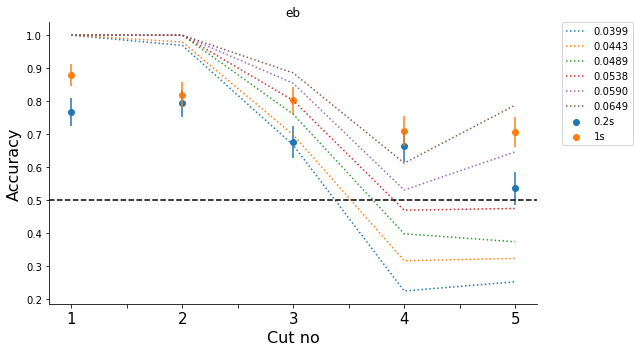

In [ ]:
test_df = df.loc[(df['participantID'] == participantId) & (df['control'] == 0)]
test_df = test_df.reset_index()
test_df = pd.concat([test_df, pd.DataFrame(allPredResp.T)], axis=1)

y_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


error = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']


y_model_mean = test_df.groupby(['participantID','cutNo','expTime','control'],as_index=False)[0,1,2,3,4,5].mean()

x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in range(0,6):
    colName = str(i)
    y_model = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId), i]
    ax.plot(x, y_model, linestyle='dotted', label = '{:.4f}'.format(cogEffort[i]))

ax.set_xticklabels(['',1,'',2,'',3,'',4,'',5], fontsize=15);

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.axhline(0.5,ls = '--', color = 'k')    
ax.set_title('{}'.format(participantId))

plt.tight_layout()

figname = 'figs/' + participantId + '/' + participantId +'_response_model_ovrll.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [ ]:
participantId = 'go'

error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']

y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['respPred'].mean()
y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId) ,'respPred']
y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 0) & (y_model_mean['participantID'] == participantId),'respPred']



x = np.arange(1,6)

fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
ax.scatter(x, y_mean_short, label='0.2s')
ax.set_xlabel('cut no')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
ax.scatter(x, y_mean_long, label='1s')
ax.set_xlabel('Cut no', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)

ax.set_xticklabels(x, fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
ax.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

ax.set_xticks(np.arange(1,6))
ax.axhline(0.5,ls = '--', color = 'k')    
ax.legend()
ax.set_title('{} - Response Model Accuracy (Test)'.format(participantId))


figname = 'figs/' + participantId + '/' + participantId +'_response_model.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

KeyError: 'Column not found: respPred'

In [ ]:
df['effortAll'].describe()

count    3946.000000
mean        0.047858
std         0.018056
min         0.004364
25%         0.034591
50%         0.047500
75%         0.060116
max         0.121967
Name: effortAll, dtype: float64

<AxesSubplot:xlabel='effortAll', ylabel='Count'>

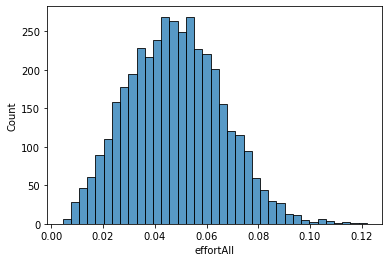

In [ ]:
sns.histplot(df['effortAll'])

In [ ]:
df.groupby(by = ['eff_label', 'expTime'], as_index=False)['correct'].sem()

eff_label  expTime   correct
0       Easy      0.2  0.013870
1       Easy      1.0  0.013267
2     Normal      0.2  0.020727
3     Normal      1.0  0.018794
4  Difficult      0.2  0.020869
5  Difficult      1.0  0.017985

<AxesSubplot:xlabel='cutNo', ylabel='effortAll'>

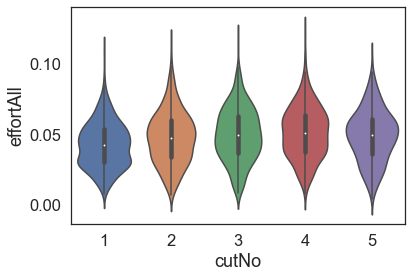

In [ ]:
sns.violinplot(data = df.loc[df['participantID'] == participantId, :], x = 'cutNo', y = 'effortAll')

# Plotting All Subjects

## Plot Behavioral Stats

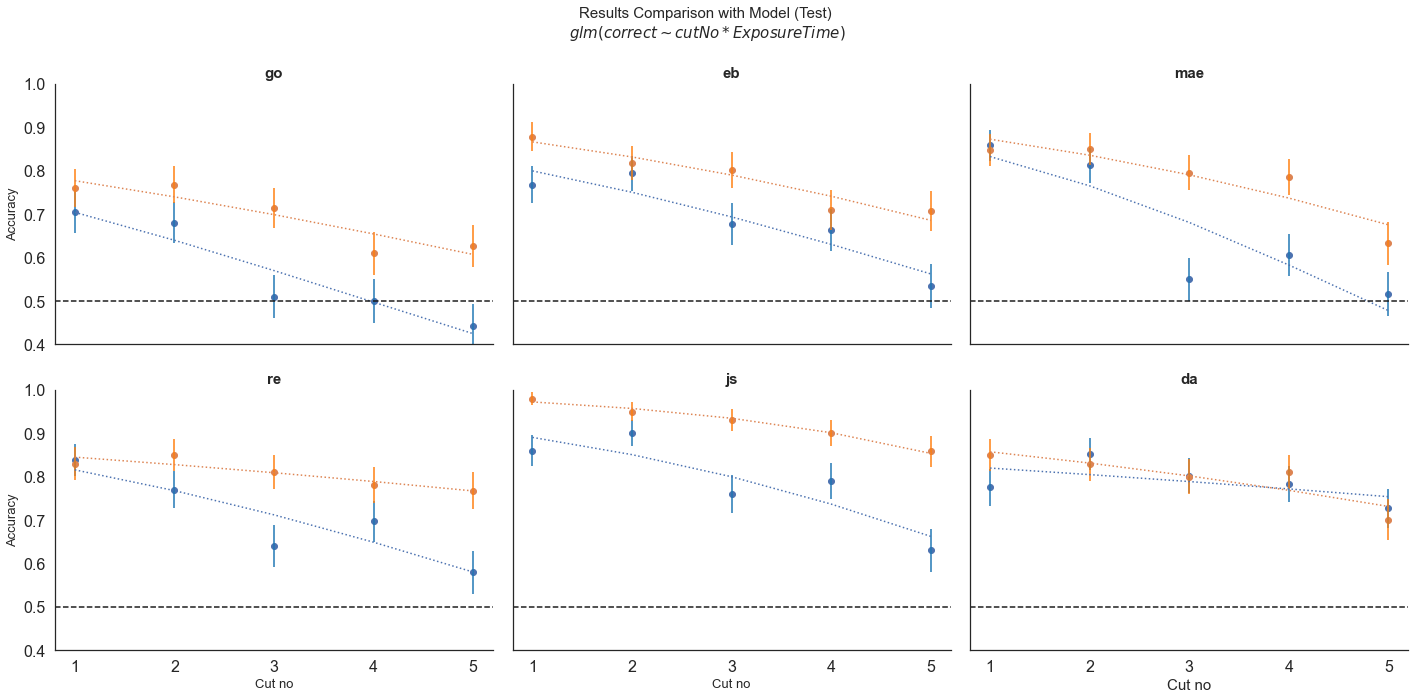

In [ ]:
allParticipants = ['go', 'eb', 'mae', 're','js', 'da']
cntrl = 0
comp_model = 'pHat_cutNo'

fig, axes = plt.subplots(2,3, figsize = (20,10), sharex=True, sharey=True)
axes = axes.ravel()


for i in range(len(allParticipants)):
        
    participantId = allParticipants[i]
    
    error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
    error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == cntrl) & (error['participantID'] == participantId), 'correct']
    error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == cntrl) & (error['participantID'] == participantId), 'correct']

    y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
    y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == cntrl) & (y_mean['participantID'] == participantId),'correct']
    y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == cntrl) & (y_mean['participantID'] == participantId),'correct']


    y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)[comp_model].mean()
    y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == cntrl)& (y_model_mean['participantID'] == participantId) ,comp_model]
    y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == cntrl) & (y_model_mean['participantID'] == participantId), comp_model]

    x = np.arange(1,6)


    axes[i].errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
    axes[i].scatter(x, y_mean_short, label='0.2s')
    #axes[i].set_xlabel('cut no')
    #axes[i].set_ylabel('Accuracy')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
    axes[i].scatter(x, y_mean_long, label='1s')    
    #axes[i].set_ylabel('Accuracy')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
    axes[i].plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

    axes[i].set_xticks(np.arange(1,6))
    axes[i].axhline(0.5,ls = '--', color = 'k')    
    
    axes[i].tick_params(axis='both', which='major', labelsize=16)
    axes[i].set_title('{}'.format(participantId), fontsize = 15, fontweight="bold")
    axes[i].set_ylim(bottom = 0.4, top = 1)

#axes[i].legend()

axes[0].set_ylabel('Accuracy', fontsize=13)
axes[3].set_ylabel('Accuracy', fontsize=13)
axes[3].set_xlabel('Cut no', fontsize=13)
axes[4].set_xlabel('Cut no', fontsize=13)
axes[5].set_xlabel('Cut no', fontsize=15)


fig.suptitle('Results Comparison with Model (Test) \n' + r'$\it{glm(correct \sim cut No * Exposure Time)}$', fontsize = 15)
plt.tight_layout()

figname = 'figs/'+'test_all.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)


### Test

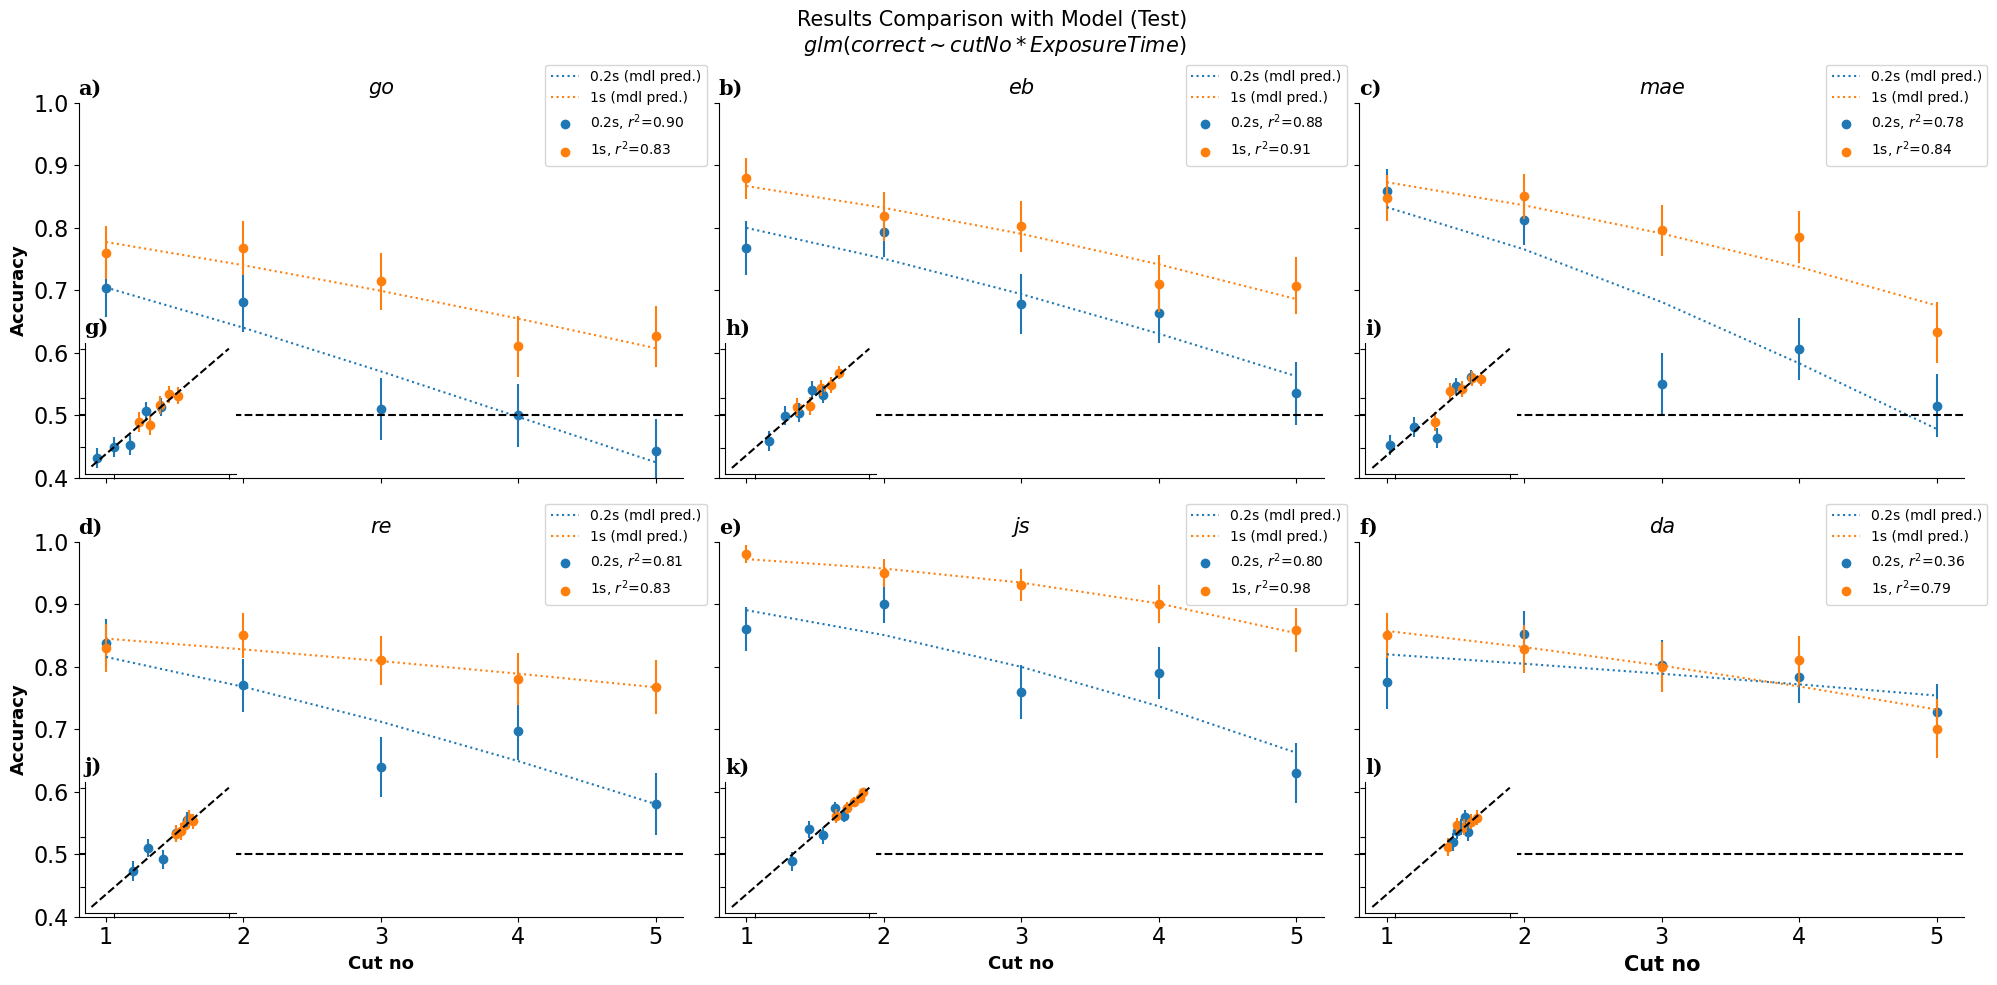

In [26]:
plotTitles = ['a)', 'b)', 'c)', 'd)', 'e)','f)']
subplotTitles = ['g)', 'h)', 'i)', 'j)', 'k)','l)']

allParticipants = ['go', 'eb', 'mae', 're','js', 'da']
cntrl = 0
comp_model = 'pHat_cutNo'

fig, axes = plt.subplots(2,3, figsize = (20,10), sharex=True, sharey=True)
axes = axes.ravel()


for i in range(len(allParticipants)):
        
    participantId = allParticipants[i]
    
    error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
    error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == cntrl) & (error['participantID'] == participantId), 'correct']
    error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == cntrl) & (error['participantID'] == participantId), 'correct']

    y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
    y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == cntrl) & (y_mean['participantID'] == participantId),'correct']
    y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == cntrl) & (y_mean['participantID'] == participantId),'correct']


    y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)[comp_model].mean()
    y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == cntrl)& (y_model_mean['participantID'] == participantId) ,comp_model]
    y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == cntrl) & (y_model_mean['participantID'] == participantId), comp_model]

    
    ## Compute R^2
    short_r2 = r_2(y_mean_short, y_model_short)
    long_r2 = r_2(y_mean_long, y_model_long)


    x = np.arange(1,6)

    axes[i].errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
    axes[i].scatter(x, y_mean_short, label=r'0.2s, $r^2$={:.2f}'.format(short_r2))
    #axes[i].set_xlabel('cut no')
    #axes[i].set_ylabel('Accuracy')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
    axes[i].scatter(x, y_mean_long, label=r'1s, $r^2$={:.2f}'.format(long_r2))    
    #axes[i].set_ylabel('Accuracy')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
    axes[i].plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

    axes[i].set_xticks(np.arange(1,6))
    axes[i].axhline(0.5,ls = '--', color = 'k')    
    
    axes[i].tick_params(axis='both', which='major', labelsize=16)
    #axes[i].set_title('{}'.format(participantId), fontsize = 15, fontweight="bold")
    axes[i].set_title('{}'.format(participantId), fontsize = 15, style = 'italic')
    axes[i].set_title(plotTitles[i], fontfamily='serif', loc='left', fontsize = 15, fontweight = 'bold')
    axes[i].set_ylim(bottom = 0.4, top = 1)
    axes[i].legend(loc = 'upper right', bbox_to_anchor=(1.05, 1.12))

    ## Add r^2 plots
    # Add small plots        
    error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
    error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
    error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']

    y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
    y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
    y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


    y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_cutNo'].mean()
    y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId) ,'pHat_cutNo']
    y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 0) & (y_model_mean['participantID'] == participantId),'pHat_cutNo']
    

    ident = [0.4, 1.0]
    
    # this is an inset axes over the main axes
    inset = axes[i].inset_axes([0.01, 0.01, 0.25, 0.35])

    inset.errorbar(y_model_short, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
    inset.scatter(y_model_short, y_mean_short, label=r'0.2s, $r^2$={:.2f}'.format(short_r2))    
    inset.spines['top'].set_visible(False)
    inset.spines['right'].set_visible(False)

    inset.errorbar(y_model_long, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
    inset.scatter(y_model_long, y_mean_long, label=r'1s, $r^2$={:.2f}'.format(long_r2)) 
    inset.spines['top'].set_visible(False)
    inset.spines['right'].set_visible(False)

    inset.tick_params(axis='both', which='major', labelsize=14)
    inset.plot(ident,ident, 'k--')
    inset.set_yticklabels([])
    inset.set_xticklabels([])    
    #inset.legend(fontsize = 'x-small', loc = 'lower right', bbox_to_anchor=(3.5, 2.1), frameon = True, columnspacing = 1)
    inset.set_title(subplotTitles[i], fontfamily='serif', loc='left',fontsize = 15, fontweight = 'bold' )
    #inset.set_title('{}'.format(participantId), fontsize = 15, fontweight='bold' )

    

#axes[i].legend()

axes[0].set_ylabel('Accuracy', fontsize=13,fontweight='bold' )
axes[3].set_ylabel('Accuracy', fontsize=13, fontweight='bold' )
axes[3].set_xlabel('Cut no', fontsize=13, fontweight='bold'  )
axes[4].set_xlabel('Cut no', fontsize=13, fontweight='bold' )
axes[5].set_xlabel('Cut no', fontsize=15, fontweight='bold' )

    
fig.suptitle('Results Comparison with Model (Test) \n' + r'$\it{glm(correct \sim cut No * Exposure Time)}$', fontsize = 15)
plt.tight_layout()

figname = 'figs/'+'test_all.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)


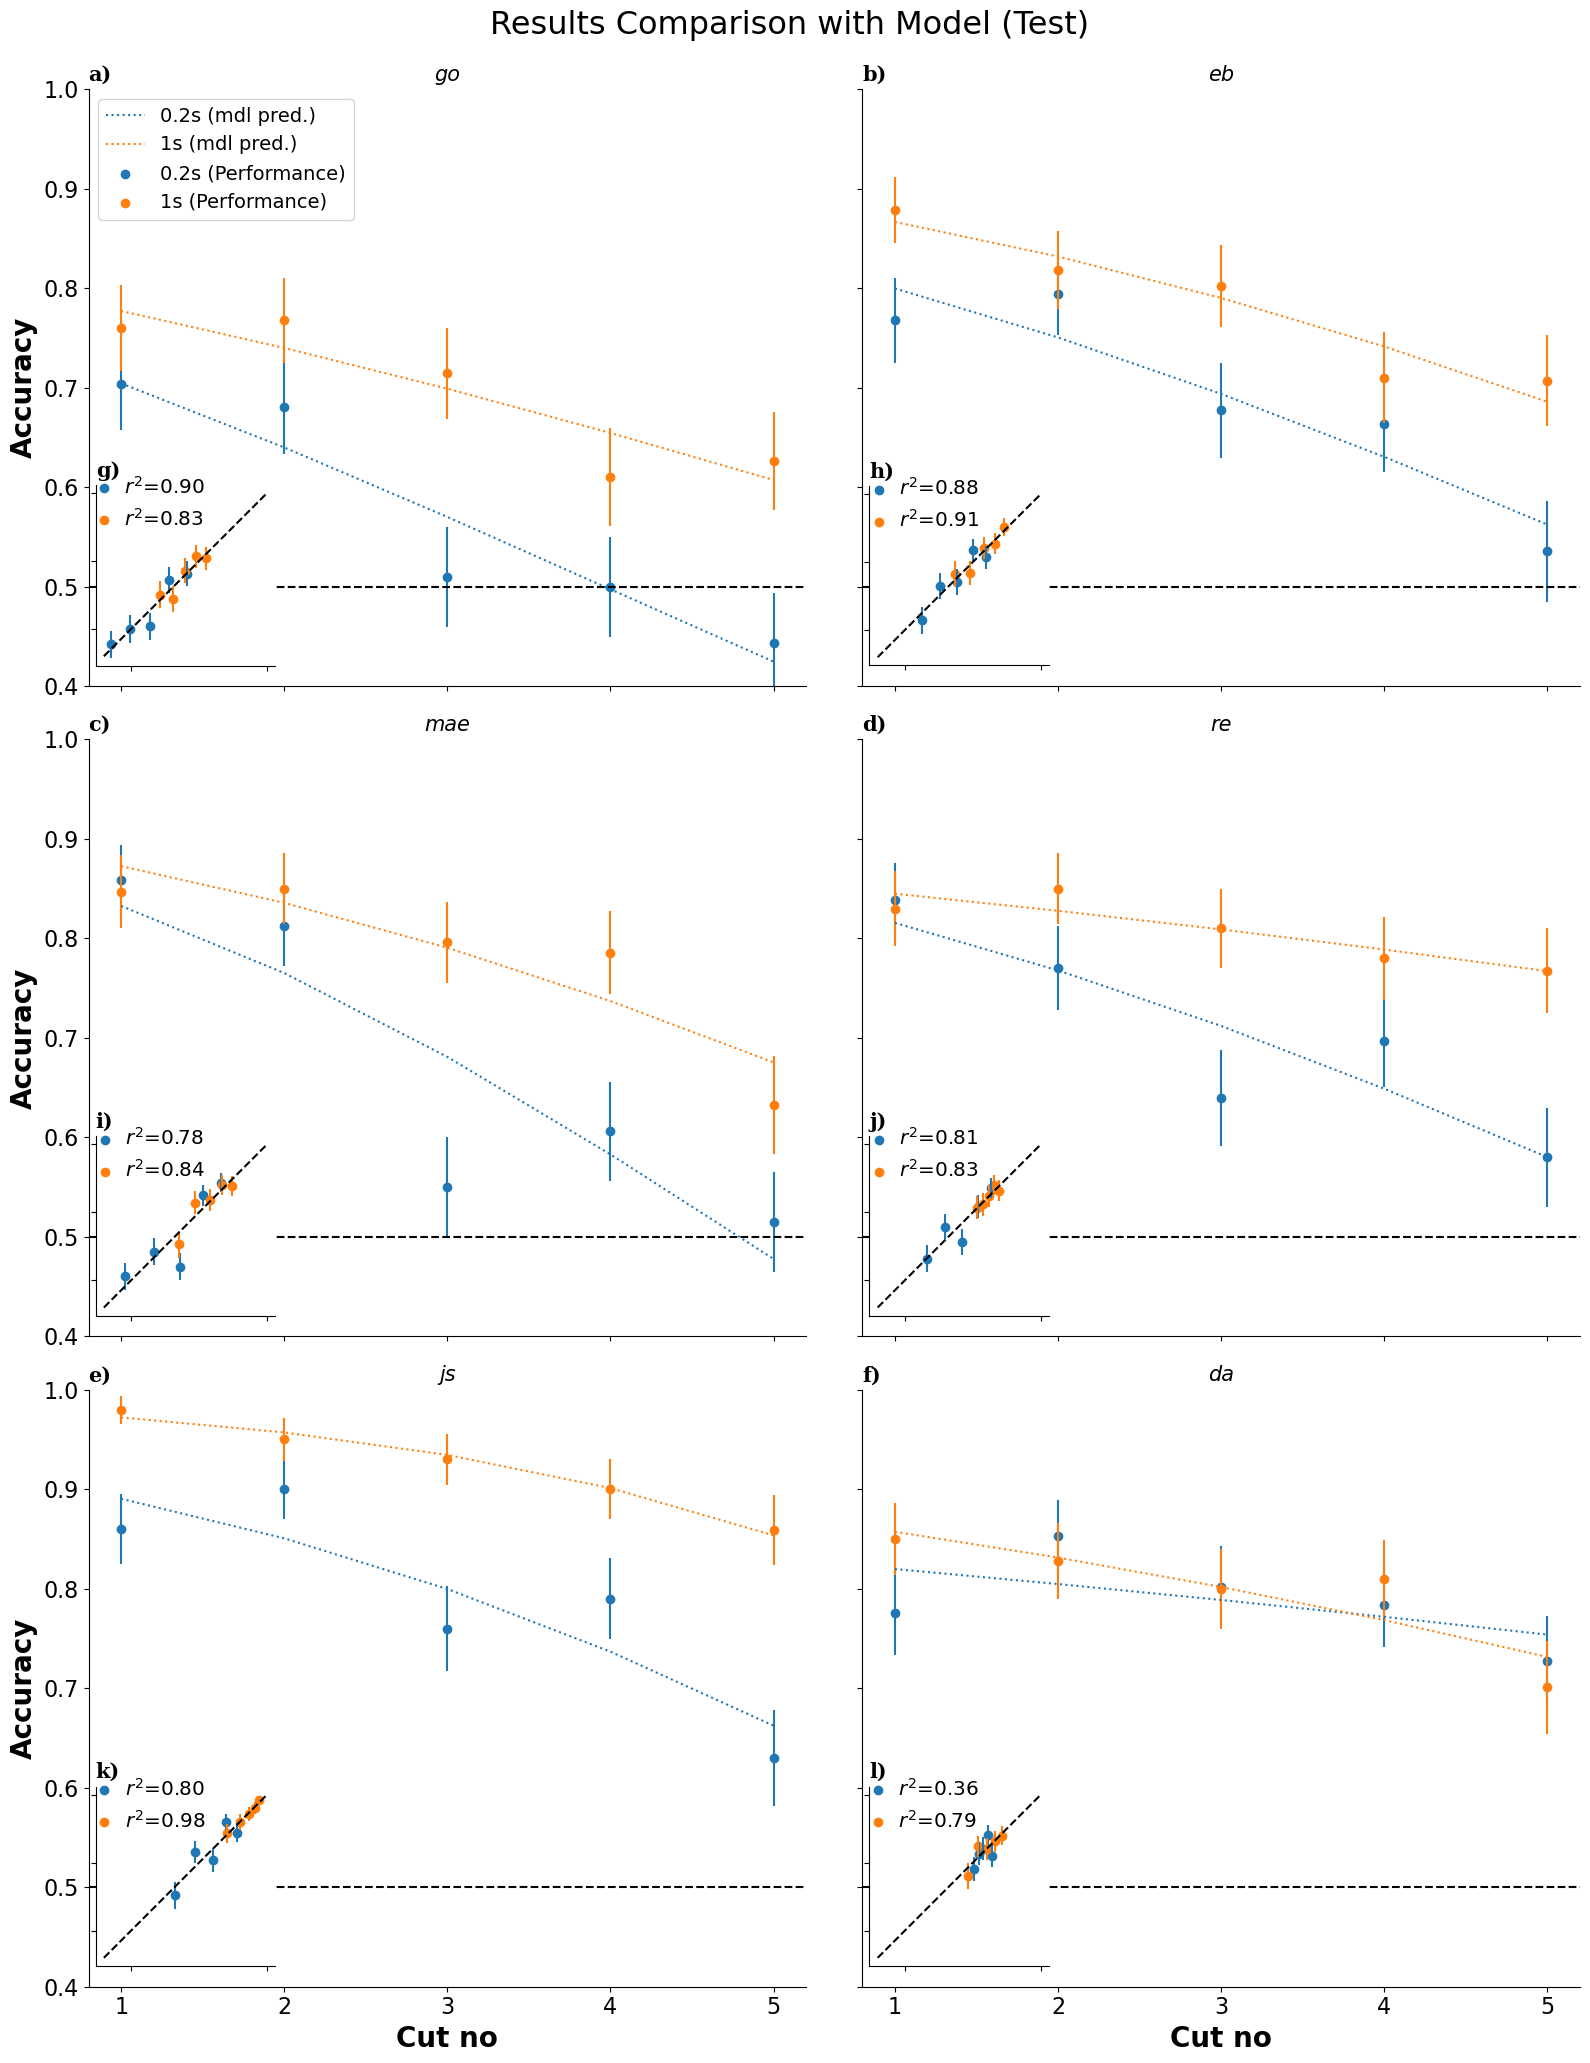

In [19]:
plotTitles = ['a)', 'b)', 'c)', 'd)', 'e)','f)']
subplotTitles = ['g)', 'h)', 'i)', 'j)', 'k)','l)']

allParticipants = ['go', 'eb', 'mae', 're','js', 'da']
cntrl = 0
comp_model = 'pHat_cutNo'

fig, axes = plt.subplots(3,2, figsize = (16,21), sharex=True, sharey=True)
axes = axes.ravel()


for i in range(len(allParticipants)):
        
    participantId = allParticipants[i]
    
    error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
    error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == cntrl) & (error['participantID'] == participantId), 'correct']
    error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == cntrl) & (error['participantID'] == participantId), 'correct']

    y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
    y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == cntrl) & (y_mean['participantID'] == participantId),'correct']
    y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == cntrl) & (y_mean['participantID'] == participantId),'correct']


    y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)[comp_model].mean()
    y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == cntrl)& (y_model_mean['participantID'] == participantId) ,comp_model]
    y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == cntrl) & (y_model_mean['participantID'] == participantId), comp_model]

    
    ## Compute R^2
    short_r2 = r_2(y_mean_short, y_model_short)
    long_r2 = r_2(y_mean_long, y_model_long)


    x = np.arange(1,6)

    axes[i].errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
    axes[i].scatter(x, y_mean_short, label = '0.2s (Performance)')
    #axes[i].set_xlabel('cut no')
    #axes[i].set_ylabel('Accuracy')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
    axes[i].scatter(x, y_mean_long, label = '1s (Performance)')    
    #axes[i].set_ylabel('Accuracy')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
    axes[i].plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

    axes[i].set_xticks(np.arange(1,6))
    axes[i].axhline(0.5,ls = '--', color = 'k')    
    
    axes[i].tick_params(axis='both', which='major', labelsize=16)
    #axes[i].set_title('{}'.format(participantId), fontsize = 15, fontweight="bold")
    axes[i].set_title('{}'.format(participantId), fontsize = 15, style = 'italic')
    axes[i].set_title(plotTitles[i], fontfamily='serif', loc='left', fontsize = 15, fontweight = 'bold')
    axes[i].set_ylim(bottom = 0.4, top = 1)
    

    ## Add r^2 plots
    # Add small plots        
    error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
    error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
    error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']

    y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
    y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
    y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


    y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_cutNo'].mean()
    y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId) ,'pHat_cutNo']
    y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 0) & (y_model_mean['participantID'] == participantId),'pHat_cutNo']
    

    ident = [0.4, 1.0]
    
    # this is an inset axes over the main axes
    inset = axes[i].inset_axes([0.01, 0.01, 0.25, 0.35])

    inset.errorbar(y_model_short, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
    inset.scatter(y_model_short, y_mean_short, label=r'$r^2$={:.2f}'.format(short_r2))    
    inset.spines['top'].set_visible(False)
    inset.spines['right'].set_visible(False)

    inset.errorbar(y_model_long, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
    inset.scatter(y_model_long, y_mean_long, label=r'$r^2$={:.2f}'.format(long_r2)) 
    inset.spines['top'].set_visible(False)
    inset.spines['right'].set_visible(False)

    inset.tick_params(axis='both', which='major', labelsize=18)
    inset.plot(ident,ident, 'k--')
    inset.set_yticklabels([])
    inset.set_xticklabels([])    
    #inset.legend(fontsize = 'x-small', loc = 'lower right', bbox_to_anchor=(3.5, 2.1), frameon = True, columnspacing = 1)
    inset.set_title(subplotTitles[i], fontfamily='serif', loc='left',fontsize = 15, fontweight = 'bold' )
    #inset.set_title('{}'.format(participantId), fontsize = 15, fontweight='bold' )
    inset.set_aspect('equal', adjustable='box')
    inset.legend(loc = 'upper right', bbox_to_anchor=(0.71, 1.15), frameon = False, handletextpad = 0.01, fontsize = 'x-large')

#axes[i].legend()

axes[0].set_ylabel('Accuracy', fontsize=20,fontweight='bold' )
axes[2].set_ylabel('Accuracy', fontsize=20, fontweight='bold' )
axes[4].set_ylabel('Accuracy', fontsize=20, fontweight='bold' )
axes[4].set_xlabel('Cut no', fontsize=20, fontweight='bold' )
axes[5].set_xlabel('Cut no', fontsize=20, fontweight='bold' )
axes[0].legend(loc = 'upper left', title_fontsize='large', prop={'size':14})

#fig.suptitle('Results Comparison with Model (Test) \n' + r'$\it{glm(correct \sim cut No * Exposure Time)}$', fontsize = 15)
fig.suptitle('Results Comparison with Model (Test) \n', fontsize = 23)
plt.tight_layout()

figname = 'figs/'+'test_all.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)


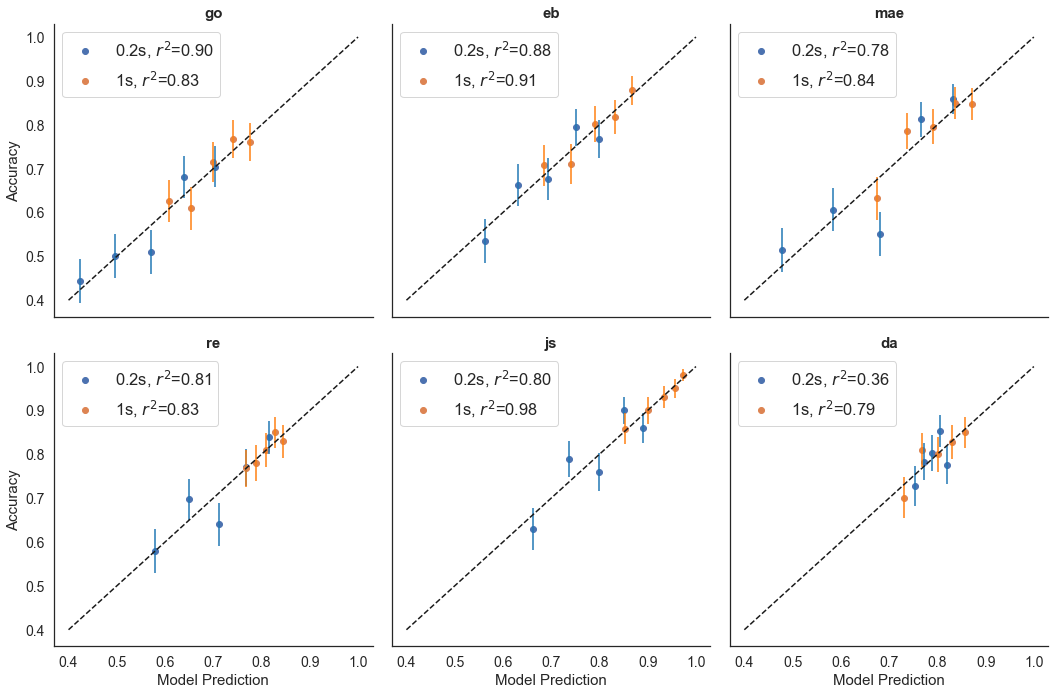

In [ ]:
allParticipants = ['go', 'eb', 'mae', 're','js','da']
cntrl = 1
comp_model = 'pHat_sim'

fig, axes = plt.subplots(2,3, figsize = (15,10), sharex=True, sharey=True)
axes = axes.ravel()


for i in range(len(allParticipants)):
        
    participantId = allParticipants[i]
    
    error = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].sem()
    error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']
    error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == 0) & (error['participantID'] == participantId), 'correct']

    y_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['correct'].mean()
    y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']
    y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == 0) & (y_mean['participantID'] == participantId),'correct']


    y_model_mean = df.groupby(['participantID','cutNo','expTime','control'],as_index=False)['pHat_cutNo'].mean()
    y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == 0)& (y_model_mean['participantID'] == participantId) ,'pHat_cutNo']
    y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == 0) & (y_model_mean['participantID'] == participantId),'pHat_cutNo']

    ## Compute R^2
    short_r2 = r_2(y_mean_short, y_model_short)
    long_r2 = r_2(y_mean_long, y_model_long)


    ident = [0.4, 1.0]
    
    axes[i].errorbar(y_model_short, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
    axes[i].scatter(y_model_short, y_mean_short, label=r'0.2s, $r^2$={:.2f}'.format(short_r2))    
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].errorbar(y_model_long, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
    axes[i].scatter(y_model_long, y_mean_long, label=r'1s, $r^2$={:.2f}'.format(long_r2)) 
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].tick_params(axis='both', which='major', labelsize=14)
    axes[i].plot(ident,ident, 'k--')
    axes[i].legend()
    axes[i].set_title('{}'.format(participantId), fontsize = 15, fontweight='bold' )

axes[i].legend()
axes[0].set_ylabel('Accuracy', fontsize = 15)
axes[3].set_ylabel('Accuracy', fontsize = 15)
axes[3].set_xlabel('Model Prediction', fontsize = 15)   
axes[4].set_xlabel('Model Prediction', fontsize = 15)   
axes[5].set_xlabel('Model Prediction', fontsize = 15)   


#fig.suptitle('Results Comparison with Model (Test)')
plt.tight_layout()

figname = 'figs/'+'cntrl_all_diag.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)



### Control

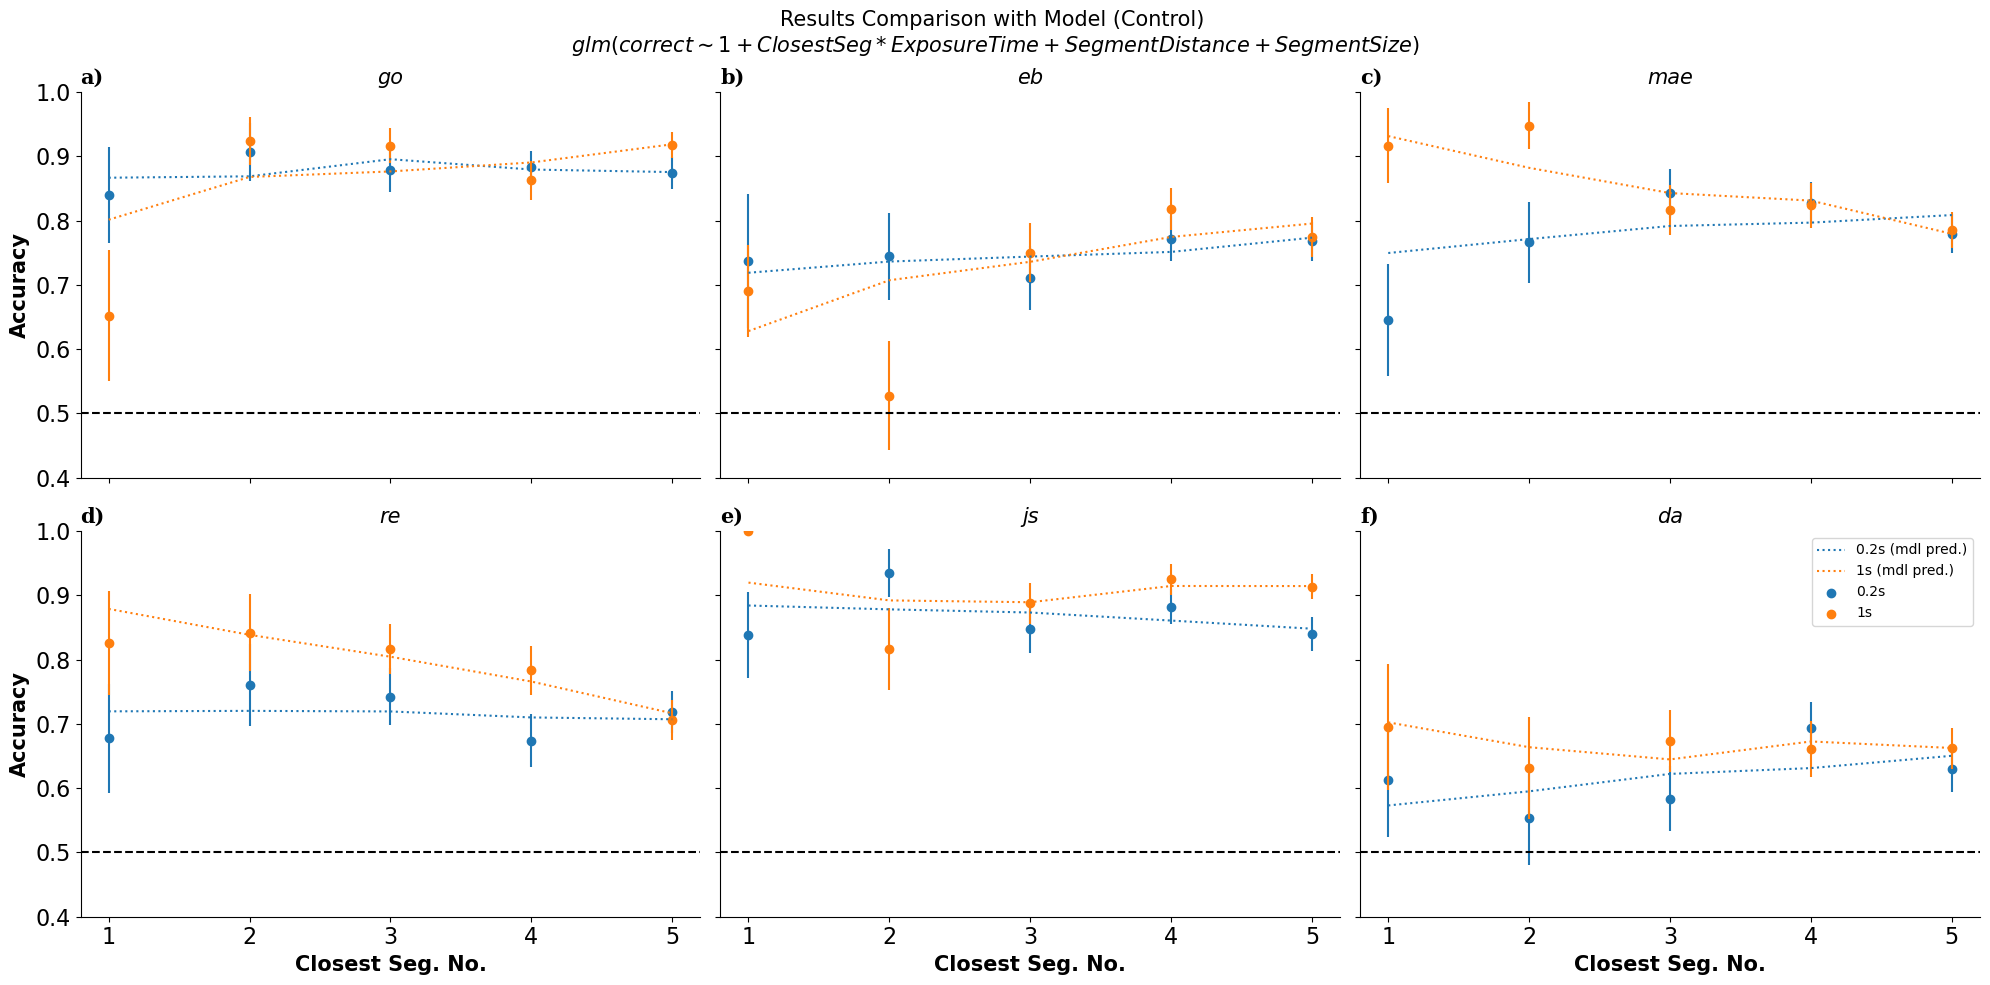

In [34]:
plotTitles = ['a)', 'b)', 'c)', 'd)', 'e)','f)']

allParticipants = ['go', 'eb', 'mae', 're', 'js','da']
cntrl = 1
comp_model = 'pHat_seg'

fig, axes = plt.subplots(2,3, figsize = (20,10), sharex=True, sharey=True)
axes = axes.ravel()


for i in range(len(allParticipants)):
        
    participantId = allParticipants[i]
    
    error = df.groupby(['participantID','closestSeg','expTime','control'],as_index=False)['correct'].sem()
    error_short = error.loc[(error['expTime'] == 0.2) & (error['control'] == cntrl) & (error['participantID'] == participantId), 'correct']
    error_long =  error.loc[(error['expTime'] == 1) & (error['control'] == cntrl) & (error['participantID'] == participantId), 'correct']

    y_mean = df.groupby(['participantID','closestSeg','expTime','control'],as_index=False)['correct'].mean()
    y_mean_short = y_mean.loc[(y_mean['expTime'] == 0.2) & (y_mean['control'] == cntrl) & (y_mean['participantID'] == participantId),'correct']
    y_mean_long = y_mean.loc[(y_mean['expTime'] == 1) & (y_mean['control'] == cntrl) & (y_mean['participantID'] == participantId),'correct']


    y_model_mean = df.groupby(['participantID','closestSeg','expTime','control'],as_index=False)[comp_model].mean()
    y_model_short = y_model_mean.loc[(y_model_mean['expTime'] == 0.2) & (y_model_mean['control'] == cntrl)& (y_model_mean['participantID'] == participantId) ,comp_model]
    y_model_long = y_model_mean.loc[(y_model_mean['expTime'] == 1) & (y_model_mean['control'] == cntrl) & (y_model_mean['participantID'] == participantId), comp_model]

    x = np.arange(1,6)


    axes[i].errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
    axes[i].scatter(x, y_mean_short, label='0.2s')
    #axes[i].set_xlabel('cut no')
    #axes[i].set_ylabel('Accuracy')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
    axes[i].scatter(x, y_mean_long, label='1s')    
    #axes[i].set_ylabel('Accuracy')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
    axes[i].plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

    axes[i].set_xticks(np.arange(1,6))
    axes[i].axhline(0.5,ls = '--', color = 'k')    
    
    axes[i].tick_params(axis='both', which='major', labelsize=16)
    axes[i].set_title('{}'.format(participantId), fontsize = 15, style = 'italic')
    axes[i].set_title(plotTitles[i], fontfamily='serif', loc='left', fontsize = 15, fontweight = 'bold')
    axes[i].set_ylim(bottom = 0.4, top = 1)

axes[-1].legend()
#axes[-1].axis('off')

axes[0].set_ylabel('Accuracy', fontsize=15,fontweight='bold' )
axes[3].set_ylabel('Accuracy', fontsize=15, fontweight='bold' )
axes[3].set_xlabel('Closest Seg. No.', fontsize=15, fontweight='bold'  )
axes[4].set_xlabel('Closest Seg. No.', fontsize=15, fontweight='bold' )
axes[5].set_xlabel('Closest Seg. No.', fontsize=15, fontweight='bold' )


fig.suptitle('Results Comparison with Model (Control) \n' + r'$\it{glm(correct \sim 1 + Closest Seg * Exposure Time + Segment Distance + Segment Size)}$', fontsize = 15)
plt.tight_layout()

figname = 'figs/'+'cntrl_all.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)


### Alternative

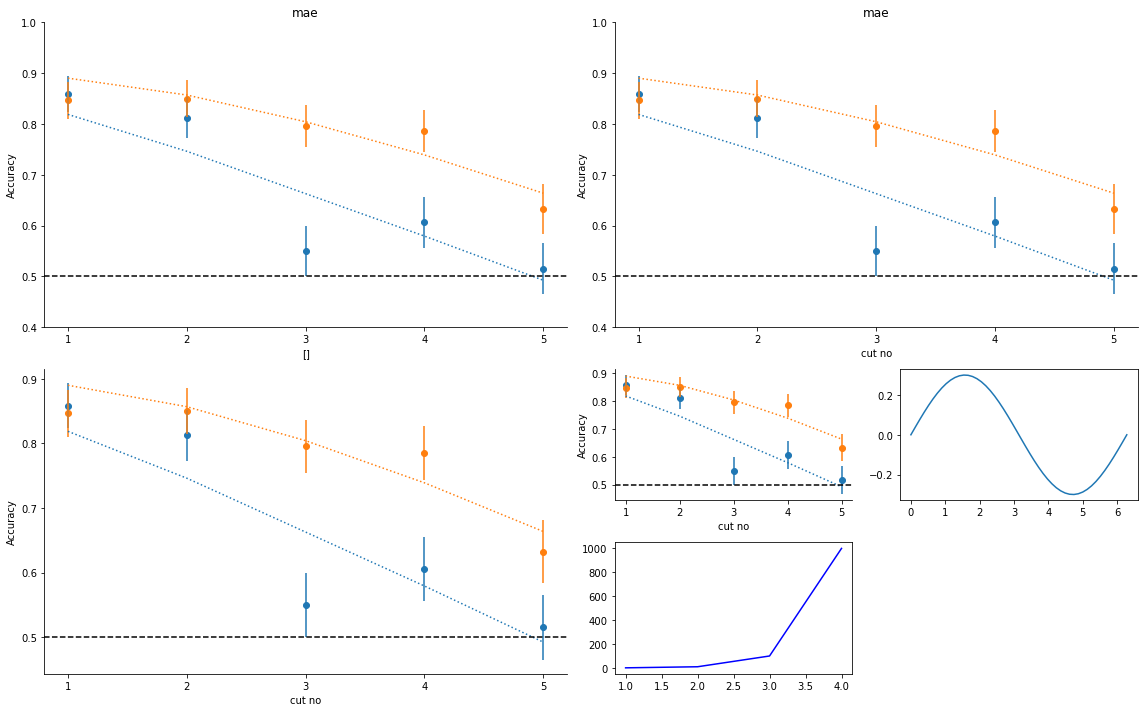

In [ ]:
plt.figure(figsize=(16, 10))
G = gridspec.GridSpec(4, 4)

X = np.linspace(0, 2 * np.pi, 50, endpoint=True)
F1 = 2.8 * np.cos(X)
F2 = 5 * np.sin(X)
F3 = 0.3 * np.sin(X)

axes_1 = plt.subplot(G[:2, :-2])
axes_1.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
axes_1.scatter(x, y_mean_short, label='0.2s')
axes_1.set_xlabel('cut no')
axes_1.set_ylabel('Accuracy')
axes_1.spines['top'].set_visible(False)
axes_1.spines['right'].set_visible(False)

axes_1.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
axes_1.scatter(x, y_mean_long, label='1s')
axes_1.set_xlabel('cut no')
axes_1.set_ylabel('Accuracy')
axes_1.spines['top'].set_visible(False)
axes_1.spines['right'].set_visible(False)

axes_1.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
axes_1.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')
axes_1.set_xticks(np.arange(1,6))
axes_1.axhline(0.5,ls = '--', color = 'k')    
axes_1.set_title('{}'.format(participantId))
axes_1.set_ylim(bottom = 0.4, top = 1)


axes_2 = plt.subplot(G[:2, 2:4])
axes_2.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
axes_2.scatter(x, y_mean_short, label='0.2s')
axes_2.set_xlabel('cut no')
axes_2.set_ylabel('Accuracy')
axes_2.spines['top'].set_visible(False)
axes_2.spines['right'].set_visible(False)

axes_2.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
axes_2.scatter(x, y_mean_long, label='1s')
axes_2.set_xlabel('cut no')
axes_2.set_ylabel('Accuracy')
axes_2.spines['top'].set_visible(False)
axes_2.spines['right'].set_visible(False)

axes_2.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
axes_2.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

axes_2.set_xticks(np.arange(1,6))
axes_2.axhline(0.5,ls = '--', color = 'k')    
       
axes_2.set_title('{}'.format(participantId))
axes_2.set_ylim(bottom = 0.4, top = 1)



axes_3 = plt.subplot(G[2:, :-2])
axes_3.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
axes_3.scatter(x, y_mean_short, label='0.2s')
axes_3.set_xlabel('cut no')
axes_3.set_ylabel('Accuracy')
axes_3.spines['top'].set_visible(False)
axes_3.spines['right'].set_visible(False)

axes_3.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
axes_3.scatter(x, y_mean_long, label='1s')
axes_3.set_xlabel('cut no')
axes_3.set_ylabel('Accuracy')
axes_3.spines['top'].set_visible(False)
axes_3.spines['right'].set_visible(False)

axes_3.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
axes_3.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

axes_3.set_xticks(np.arange(1,6))
axes_3.axhline(0.5,ls = '--', color = 'k')    
    

axes_4 = plt.subplot(G[2, 2])
axes_4.errorbar(x, y_mean_short, yerr = error_short, fmt = 'none', c = 'tab:blue')
axes_4.scatter(x, y_mean_short, label='0.2s')
axes_4.set_xlabel('cut no')
axes_4.set_ylabel('Accuracy')
axes_4.spines['top'].set_visible(False)
axes_4.spines['right'].set_visible(False)

axes_4.errorbar(x, y_mean_long, yerr = error_long, fmt = 'none', c = 'tab:orange')
axes_4.scatter(x, y_mean_long, label='1s')
axes_4.set_xlabel('cut no')
axes_4.set_ylabel('Accuracy')
axes_4.spines['top'].set_visible(False)
axes_4.spines['right'].set_visible(False)

axes_4.plot(x, y_model_short, linestyle='dotted', label = '0.2s (mdl pred.)')
axes_4.plot(x, y_model_long, linestyle='dotted', label = '1s (mdl pred.)')

axes_4.set_xticks(np.arange(1,6))
axes_4.axhline(0.5,ls = '--', color = 'k')    
    

axes_5 = plt.subplot(G[2, 3])
axes_5.plot(X, F3)

axes_6 = plt.subplot(G[3, 2])
axes_6.plot([1,2,3,4], [1,10,100,1000], 'b-')

plt.tight_layout()

## Plot Coefficients

### Separate GLMs

In [11]:
path ='data/test_all_coeffs.csv'
coeffs_test = pd.read_csv(path)
coeffs_test['error'] = (coeffs_test['ub'] - coeffs_test['lb'])/2


path ='data/cntrl_all_coeffs_closeSeg.csv'
coeffs_cntrl = pd.read_csv(path)
coeffs_cntrl['error'] = (coeffs_cntrl['ub'] - coeffs_cntrl['lb'])/2

subjects = coeffs_test.id.unique()
subjects = np.sort(subjects)

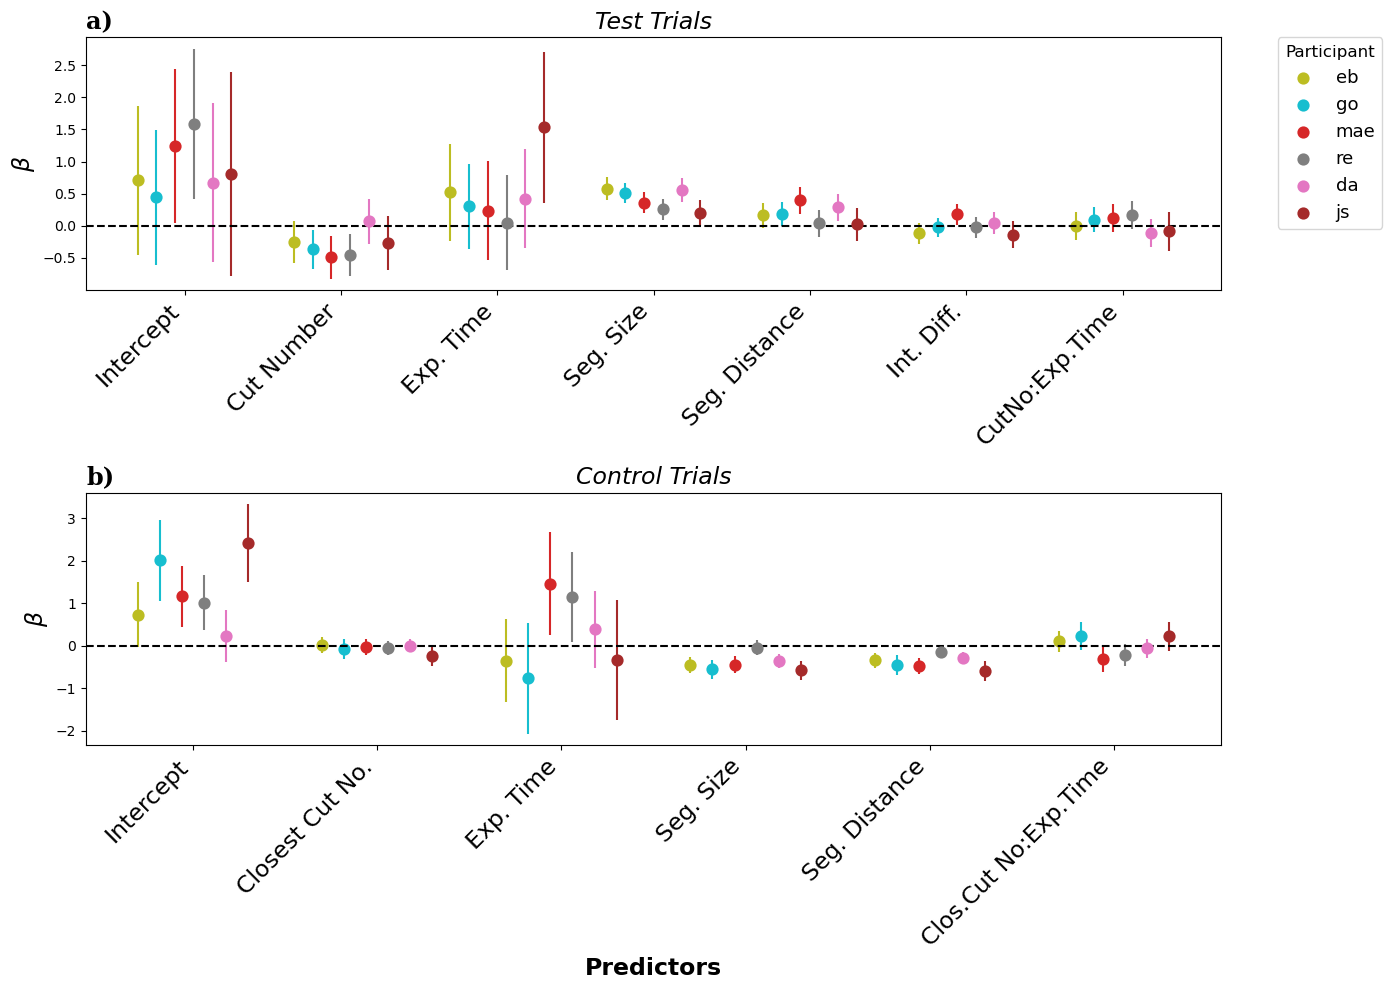

In [53]:
color = {"eb": 'tab:olive',
         "go": 'tab:cyan',
         "mae":'tab:red',
         "re": 'tab:grey',
         "js": 'brown',
         "da": 'tab:pink'
        }


fig, ax = plt.subplots(2,1, figsize = (14,10))

# Plot test
xLabels = ['Intercept', 'Cut Number', 'Exp. Time', 'Seg. Size', 'Seg. Distance', 'Int. Diff.', 'CutNo:Exp.Time']
noPredictors = len(xLabels)
colors = ['tab:olive']*noPredictors + ['tab:cyan']*noPredictors + ['tab:red']*noPredictors + ['tab:grey']*noPredictors + ['tab:pink']*noPredictors + ['brown']*noPredictors 

sns.pointplot(data = coeffs_test, x = 'coef_names', y = 'coefs', hue = 'id', palette = color, dodge=0.6, join=False, ax = ax[0])
ax[0].set_xticklabels(xLabels, rotation=45, horizontalalignment='right')
ax[0].axhline(0,ls = '--', color = 'k')    
ax[0].set_ylabel(r'$\beta$', fontsize = 17, fontdict=dict(weight='bold'))
ax[0].set_xlabel('')
ax[0].set_xticklabels(ax[0].get_xmajorticklabels(),fontsize = 17)

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

errors = coeffs_test['error']
ax[0].errorbar(x_coords, y_coords, yerr= errors, fmt=' ', zorder=-1,ecolor=colors)
ax[0].get_legend().remove()
ax[0].set_title('a)', fontfamily='serif', loc='left', fontsize='xx-large', fontweight = 'bold')
ax[0].set_title('Test Trials', style = 'italic', fontsize = 17)

leg = ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, prop={'size': 13}, fontsize='small')
leg.set_title('Participant',prop={'size':'large'})

# Plot control
xLabels = ['Intercept', 'Closest Cut No.', 'Exp. Time', 'Seg. Size', 'Seg. Distance', 'Clos.Cut No:Exp.Time']

noPredictors = len(xLabels)
colors = ['tab:olive']*noPredictors + ['tab:cyan']*noPredictors + ['tab:red']*noPredictors + ['tab:grey']*noPredictors + ['tab:pink']*noPredictors + ['brown']*noPredictors 

sns.pointplot(data = coeffs_cntrl, x = 'coef_names', y = 'coefs', hue = 'id', palette = color, dodge=0.6, join=False, ax = ax[1], legend = None)
ax[1].set_xticklabels(xLabels, rotation=45, horizontalalignment='right')
ax[1].axhline(0,ls = '--', color = 'k')    
ax[1].set_ylabel(r'$\beta$', fontsize = 17, fontdict=dict(weight='bold'))
ax[1].set_xlabel('Predictors', fontsize = 17, fontdict=dict(weight='bold'))
ax[1].set_title('Control Trials', style = 'italic', fontsize = 17)

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

errors = coeffs_cntrl['error']

ax[1].errorbar(x_coords, y_coords, yerr= errors, fmt=' ', zorder=-1,ecolor=colors)
ax[1].set_title('b)', fontfamily='serif', loc='left', fontsize='xx-large', fontweight = 'bold')
ax[1].set_xticklabels(ax[1].get_xmajorticklabels(),fontsize = 17)

leg = ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, prop={'size': 16}, fontsize='small')
leg.remove()

plt.tight_layout()

figname = 'figs/'+'coefficients_combined.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)


### With block no for learning

In [54]:
path ='data/learning/test_all_coeffs_learn.csv'
coeffs_test = pd.read_csv(path)
coeffs_test['error'] = (coeffs_test['ub'] - coeffs_test['lb'])/2


path ='data/learning/cntrl_all_coeffs_closeSeg_learning.csv'
coeffs_cntrl = pd.read_csv(path)
coeffs_cntrl['error'] = (coeffs_cntrl['ub'] - coeffs_cntrl['lb'])/2

subjects = coeffs_test.id.unique()
subjects = np.sort(subjects)

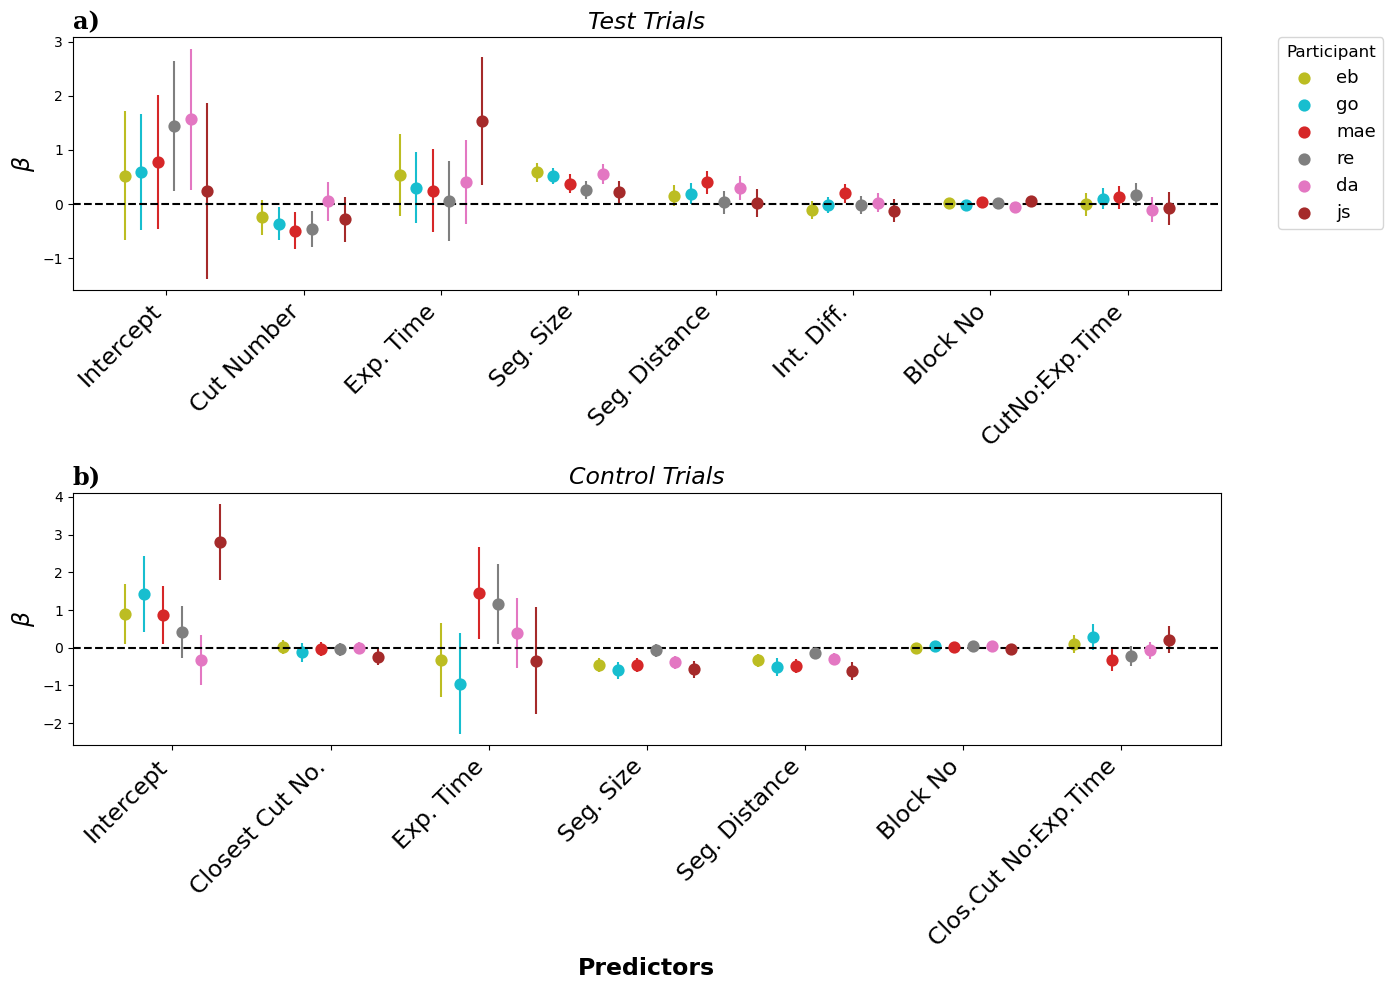

In [57]:
color = {"eb": 'tab:olive',
         "go": 'tab:cyan',
         "mae":'tab:red',
         "re": 'tab:grey',
         "js": 'brown',
         "da": 'tab:pink'
        }


fig, ax = plt.subplots(2,1, figsize = (14,10))

# Plot test
xLabels = ['Intercept', 'Cut Number', 'Exp. Time', 'Seg. Size', 'Seg. Distance', 'Int. Diff.', 'Block No', 'CutNo:Exp.Time']
noPredictors = len(xLabels)
colors = ['tab:olive']*noPredictors + ['tab:cyan']*noPredictors + ['tab:red']*noPredictors + ['tab:grey']*noPredictors + ['tab:pink']*noPredictors + ['brown']*noPredictors 

sns.pointplot(data = coeffs_test, x = 'coef_names', y = 'coefs', hue = 'id', palette = color, dodge=0.6, join=False, ax = ax[0])
ax[0].set_xticklabels(xLabels, rotation=45, horizontalalignment='right')
ax[0].axhline(0,ls = '--', color = 'k')    
ax[0].set_ylabel(r'$\beta$', fontsize = 17, fontdict=dict(weight='bold'))
ax[0].set_xlabel('')
ax[0].set_xticklabels(ax[0].get_xmajorticklabels(),fontsize = 17)

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

errors = coeffs_test['error']
ax[0].errorbar(x_coords, y_coords, yerr= errors, fmt=' ', zorder=-1,ecolor=colors)
ax[0].get_legend().remove()
ax[0].set_title('a)', fontfamily='serif', loc='left', fontsize='xx-large', fontweight = 'bold')
ax[0].set_title('Test Trials', style = 'italic', fontsize = 17)

leg = ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, prop={'size': 13}, fontsize='small')
leg.set_title('Participant',prop={'size':'large'})

# Plot control
xLabels = ['Intercept', 'Closest Cut No.', 'Exp. Time', 'Seg. Size', 'Seg. Distance', 'Block No', 'Clos.Cut No:Exp.Time']

noPredictors = len(xLabels)
colors = ['tab:olive']*noPredictors + ['tab:cyan']*noPredictors + ['tab:red']*noPredictors + ['tab:grey']*noPredictors + ['tab:pink']*noPredictors + ['brown']*noPredictors 

sns.pointplot(data = coeffs_cntrl, x = 'coef_names', y = 'coefs', hue = 'id', palette = color, dodge=0.6, join=False, ax = ax[1], legend = None)
ax[1].set_xticklabels(xLabels, rotation=45, horizontalalignment='right')
ax[1].axhline(0,ls = '--', color = 'k')    
ax[1].set_ylabel(r'$\beta$', fontsize = 17, fontdict=dict(weight='bold'))
ax[1].set_xlabel('Predictors', fontsize = 17, fontdict=dict(weight='bold'))
ax[1].set_title('Control Trials', style = 'italic', fontsize = 17)

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

errors = coeffs_cntrl['error']

ax[1].errorbar(x_coords, y_coords, yerr= errors, fmt=' ', zorder=-1,ecolor=colors)
ax[1].set_title('b)', fontfamily='serif', loc='left', fontsize='xx-large', fontweight = 'bold')
ax[1].set_xticklabels(ax[1].get_xmajorticklabels(),fontsize = 17)

leg = ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, prop={'size': 16}, fontsize='small')
leg.remove()

plt.tight_layout()

figname = 'figs/'+'coefficients_combined.png'
#plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)


### Random Intercept Model

In [38]:
path ='data/rndm_int_test_cutNo.csv'
rndInt_test_cutNo = pd.read_csv(path)
rndInt_test_cutNo['error'] = (rndInt_test_cutNo['ub'] - rndInt_test_cutNo['lb'])/2

path ='data/rndm_int_test_cumEff.csv'
rndInt_test_cumEff = pd.read_csv(path)
rndInt_test_cumEff['error'] = (rndInt_test_cumEff['ub'] - rndInt_test_cumEff['lb'])/2

path ='data/rndm_int_cntrl.csv'
rndInt_cntrl = pd.read_csv(path)
rndInt_cntrl['error'] = (rndInt_cntrl['ub'] - rndInt_cntrl['lb'])/2

In [40]:
rndInt_cntrl

coefs       std        lb        ub           coef_names     error
0  5.095616  0.407291  4.297325  5.893906          (Intercept)  0.798291
1 -0.050947  0.038769 -0.126934  0.025040           closestSeg  0.075987
2  0.226432  0.227173 -0.218827  0.671691             expTime1  0.445259
3 -0.130366  0.011335 -0.152582 -0.108150              segSize  0.022216
4 -0.280927  0.037754 -0.354925 -0.206929          segCentDist  0.073998
5 -2.445860  0.353857 -3.139419 -1.752300             simScore  0.693559
6 -0.014515  0.056149 -0.124567  0.095537  closestSeg:expTime1  0.110052

/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_19354/914733004.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(xLabels, rotation=45, horizontalalignment='right')
/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_19354/914733004.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xmajorticklabels(),fontsize = 17)
/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_19354/914733004.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(xLabels, rotation=45, horizontalalignment='right')
/var/folders/zg/xkfchz8d7w7g72p8t57_91100000gn/T/ipykernel_19354/914733004.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xmajorticklabels(),fontsize = 17)


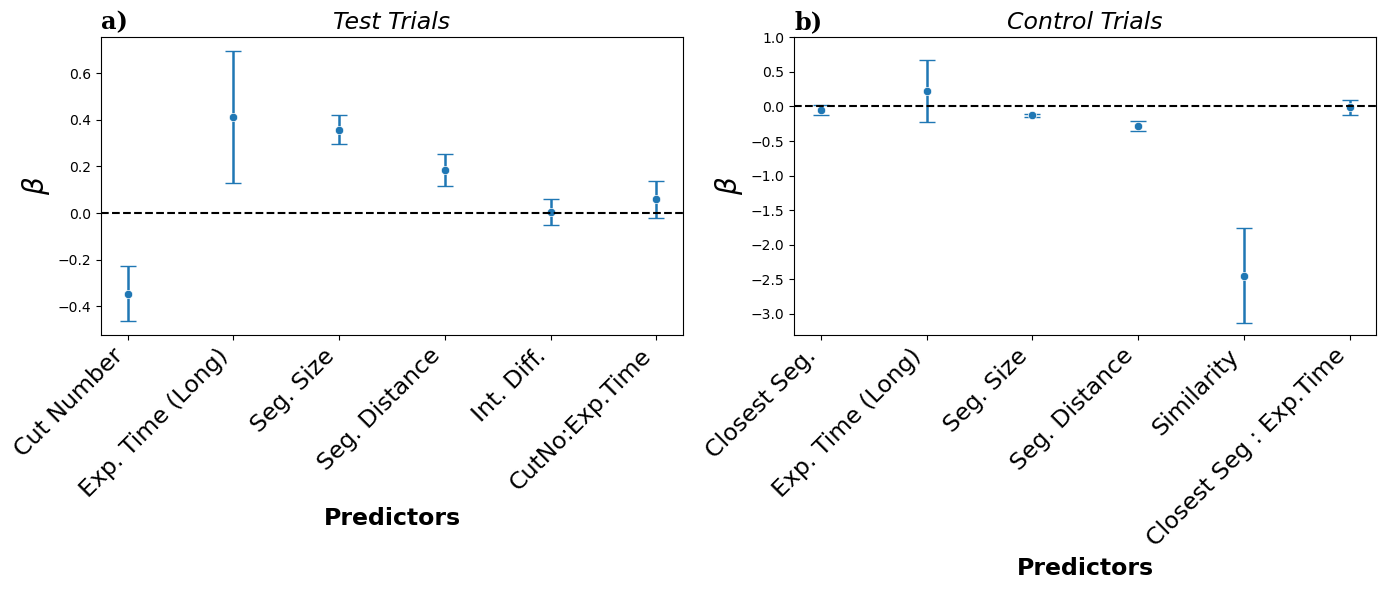

In [52]:
fig, ax = plt.subplots(1,2, figsize = (14,6))

# Plot test
xLabels = ['Cut Number', 'Exp. Time (Long)', 'Seg. Size', 'Seg. Distance', 'Int. Diff.', 'CutNo:Exp.Time']
noPredictors = len(xLabels)
colors = ['tab:olive']*noPredictors + ['tab:cyan']*noPredictors + ['tab:red']*noPredictors + ['tab:grey']*noPredictors + ['brown']*noPredictors + ['tab:pink']*noPredictors 

sns.scatterplot(data = rndInt_test_cutNo[1::], x = 'coef_names', y = 'coefs', ax = ax[0])
ax[0].set_xticklabels(xLabels, rotation=45, horizontalalignment='right')
ax[0].axhline(0,ls = '--', color = 'k')    
ax[0].set_ylabel(r'$\beta$', fontsize = 20, fontdict=dict(weight='bold'))
ax[0].set_xlabel('Predictors', fontsize = 17, fontdict=dict(weight='bold'))
ax[0].set_xticklabels(ax[0].get_xmajorticklabels(),fontsize = 17)

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

errors = rndInt_test_cutNo['error'][1::]
ax[0].errorbar(x_coords, y_coords, yerr= errors, capsize = 5.5, elinewidth = 1.8, fmt=' ', zorder=-1)
ax[0].set_title('Test Trials', style = 'italic', fontsize = 17)
ax[0].set_title('a)', fontfamily='serif', loc='left', fontsize='xx-large', fontweight = 'bold')

# Plot control
xLabels = ['Closest Seg.', 'Exp. Time (Long)', 'Seg. Size', 'Seg. Distance', 'Similarity', 'Closest Seg : Exp.Time']
noPredictors = len(xLabels)
colors = ['tab:olive']*noPredictors + ['tab:cyan']*noPredictors + ['tab:red']*noPredictors + ['tab:grey']*noPredictors + ['brown']*noPredictors + ['tab:pink']*noPredictors 

sns.scatterplot(data = rndInt_cntrl[1::], x = 'coef_names', y = 'coefs', ax = ax[1])
ax[1].set_xticklabels(xLabels, rotation=45, horizontalalignment='right')
ax[1].axhline(0,ls = '--', color = 'k')    
ax[1].set_ylabel(r'$\beta$', fontsize = 20, fontdict=dict(weight='bold'))
ax[1].set_xlabel('Predictors', fontsize = 17, fontdict=dict(weight='bold'))
ax[1].set_ylim(bottom=-3.3, top = 1)
ax[1].set_xticklabels(ax[1].get_xmajorticklabels(),fontsize = 17)

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

errors = rndInt_cntrl['error'][1::]
ax[1].errorbar(x_coords, y_coords, yerr= errors, capsize = 5.5, elinewidth = 1.8, fmt=' ', zorder=-1)
ax[1].set_title('Control Trials', style = 'italic', fontsize = 17)
ax[1].set_title('b)', fontfamily='serif', loc='left', fontsize='xx-large', fontweight = 'bold')

plt.tight_layout()

figname = 'figs/' +'coefficients_rndInt.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)
print(test_anova.pivot_table(index='id', columns='predictor', values='Pr..Chi.').to_latex(index=True))

## Plot Anova

In [7]:
participantId = 'eb'
path ='data/' + participantId + '/'
eb_anova = pd.read_csv(path + participantId + '_anova.csv')

participantId = 'go'
path ='data/' + participantId + '/'
go_anova = pd.read_csv(path + participantId + '_anova.csv')

participantId = 'mae'
path ='data/' + participantId + '/'
mae_anova = pd.read_csv(path + participantId + '_anova.csv')

participantId = 're'
path ='data/' + participantId + '/'
re_anova = pd.read_csv(path + participantId + '_anova.csv')

participantId = 'da'
path ='data/' + participantId + '/'
da_anova = pd.read_csv(path + participantId + '_anova.csv')

participantId = 'js'
path ='data/' + participantId + '/'
js_anova = pd.read_csv(path + participantId + '_anova.csv')


anova = pd.concat([eb_anova, go_anova, mae_anova, re_anova, da_anova, js_anova])

anova['significant'] = False
anova.loc[anova['Pr..Chi.'] < 0.05, 'significant'] = True

In [8]:
## Plotting Settings
sns.set(font_scale = 1.5, style="white")

markers = {True:"d",
           False:"o"}


color = {"eb": 'tab:olive',
         "go": 'tab:cyan',
         "mae":'tab:red',
         "re": 'tab:grey',
         "js": 'brown',
         "da": 'tab:pink'
        }

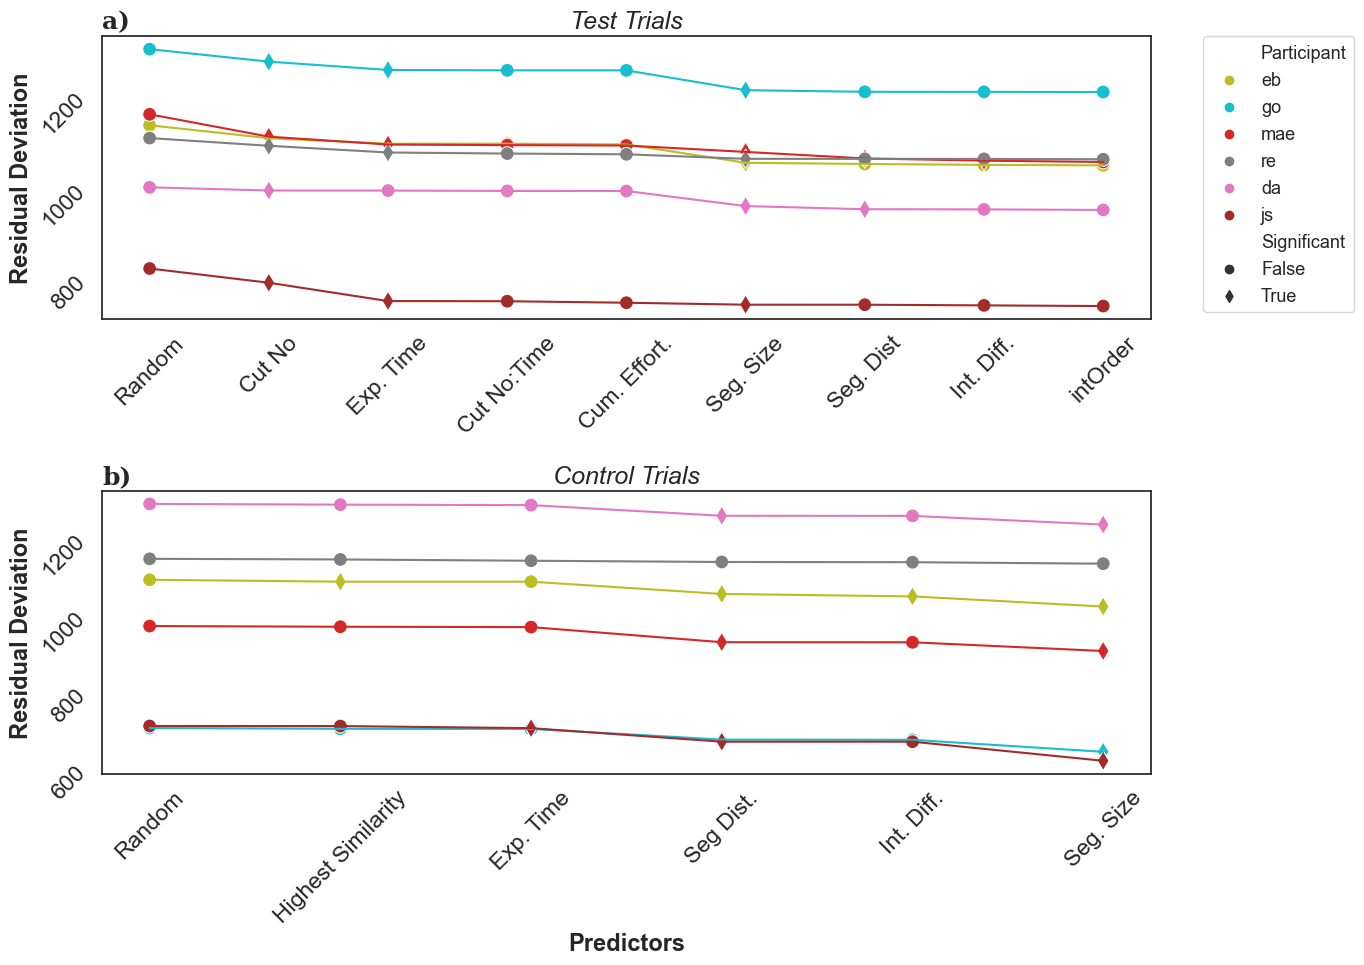

In [24]:
fig, ax = plt.subplots(2,1, figsize = (14,10))

anova = anova.rename(columns={'id':'Participant', 'significant':'Significant'})

# Plot ANOVA table for test 
model = 'cutNo'
sns.scatterplot(data = anova[anova['model'] == model], x = 'predictor', y = 'Resid..Dev', style = 'Significant',markers = markers, s = 100, hue = 'Participant', palette = color, ax=ax[0])
sns.lineplot(data = anova[anova['model'] == model], x = 'predictor', y = 'Resid..Dev', hue = 'Participant', palette = color, ci= None, legend=False, ax = ax[0])
#plt.xticks(rotation=45, ha='right')
ax[0].set_ylabel('Residual Deviation', fontsize = 17, fontdict=dict(weight='bold'))
ax[0].tick_params(labelrotation=45) 
ax[0].set_title('Test Trials', style ='italic')
ax[0].set_xlabel('')   
ax[0].set_title('a)', fontfamily='serif', loc='left', fontsize='medium', fontweight = 'bold')

ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, prop={'size': 13}, fontsize='small')

# Plot ANOVA table for control
model = 'similarity'
sns.scatterplot(data = anova[anova['model'] == model], x = 'predictor', y = 'Resid..Dev', style = 'Significant',markers = markers, s = 100, hue = 'Participant', palette = color, legend=False, ax = ax[1])
sns.lineplot(data = anova[anova['model'] == model], x = 'predictor', y = 'Resid..Dev', hue = 'Participant', palette = color, ci= None, legend=False,  ax = ax[1])
#ax[0].set_xticks(rotation=45, ha='right')
ax[1].set_ylabel('Residual Deviation', fontsize = 17, fontdict=dict(weight='bold'))
ax[1].set_xlabel('Predictors', fontsize = 17, fontdict=dict(weight='bold'))   
ax[1].tick_params(labelrotation=45) 
ax[1].set_title('Control Trials', style ='italic')
ax[1].set_title('b)', fontfamily='serif', loc='left', fontsize='medium', fontweight = 'bold')

plt.tight_layout()

figname = 'figs/' +'anova_combined.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [8]:
test_anova = anova.loc[(anova['control'] == 0) & (anova['model'] == 'cutNo')]
cntrl_anova = anova.loc[(anova['control'] == 1) & (anova['model'] == 'similarity')]

In [12]:
pd.set_option('display.float_format', '{:.3f}'.format)
print(cntrl_anova.pivot_table(index='id', columns='predictor', values='Pr..Chi.'))

predictor  Exp. Time  Highest Similarity  Int. Diff.  Seg Dist.  Seg. Size
id                                                                        
da             0.275               0.172       0.620      0.000      0.000
eb             0.935               0.027       0.012      0.000      0.000
go             0.574               0.164       0.450      0.000      0.000
js             0.021               0.666       0.904      0.000      0.000
mae            0.338               0.182       0.633      0.000      0.000
re             0.068               0.197       0.438      0.075      0.052


In [17]:
pd.set_option('display.float_format', '{:.3f}'.format)
print(test_anova.pivot_table(index='id', columns='predictor', values='Pr..Chi.').to_latex(index=True))

\begin{tabular}{lrrrrrrrr}
\toprule
predictor &  Cum. Effort. &  Cut No &  Cut No:Time &  Exp. Time &  Int. Diff. &  Seg. Dist &  Seg. Size &  intOrder \\
id  &               &         &              &            &             &            &            &           \\
\midrule
da  &         0.698 &   0.008 &        0.381 &      0.690 &       0.554 &      0.009 &      0.000 &     0.276 \\
eb  &         0.215 &   0.000 &        0.919 &      0.001 &       0.166 &      0.105 &      0.000 &     0.298 \\
go  &         0.769 &   0.000 &        0.356 &      0.000 &       0.755 &      0.059 &      0.000 &     0.570 \\
js  &         0.070 &   0.000 &        0.555 &      0.000 &       0.228 &      0.835 &      0.039 &     0.230 \\
mae &         0.365 &   0.000 &        0.250 &      0.000 &       0.028 &      0.000 &      0.000 &     0.091 \\
re  &         0.202 &   0.000 &        0.129 &      0.000 &       0.857 &      0.743 &      0.002 &     0.349 \\
\bottomrule
\end{tabular}



# Prepare for Latex

In [55]:
participantId = 'da'
colNames = ['Resid..Df', 'Resid..Dev', 'Df',  'Deviance', r'$p > \chi$', 'Predictor']
dfToPrint = cntrl_anova.loc[cntrl_anova['id'] == participantId,:].iloc[:,[0,1,2,3,4,8]]
print(dfToPrint.to_latex(column_format = 'cccccc', float_format="%0.3f",  na_rep = ' ', index=False, header=colNames))

\begin{tabular}{cccccc}
\toprule
Resid..Df & Resid..Dev &    Df & Deviance & \$p > \textbackslash chi\$ &          Predictor \\
\midrule
      989 &   1286.223 &       &          &            &             Random \\
      988 &   1284.355 & 1.000 &    1.868 &      0.172 & Highest Similarity \\
      987 &   1283.164 & 1.000 &    1.192 &      0.275 &          Exp. Time \\
      986 &   1255.570 & 1.000 &   27.594 &      0.000 &          Seg Dist. \\
      985 &   1255.324 & 1.000 &    0.246 &      0.620 &         Int. Diff. \\
      984 &   1232.912 & 1.000 &   22.412 &      0.000 &          Seg. Size \\
\bottomrule
\end{tabular}



In [62]:
participantId = 'da'
colNames = ['Resid..Df', 'Resid..Dev', 'Df',  'Deviance', r'$p > \chi$', 'Predictor']
dfToPrint = cntrl_anova.loc[cntrl_anova['id'] == participantId,:].iloc[:,[0,1,2,3,4,8]]
print(dfToPrint.to_latex(column_format = 'cccccc', float_format="%0.3f",  na_rep = ' ', index=False, header=colNames))

\begin{tabular}{cccccc}
\toprule
Resid..Df & Resid..Dev &    Df & Deviance & \$p > \textbackslash chi\$ &          Predictor \\
\midrule
      989 &   1286.223 &       &          &            &             Random \\
      988 &   1284.355 & 1.000 &    1.868 &      0.172 & Highest Similarity \\
      987 &   1283.164 & 1.000 &    1.192 &      0.275 &          Exp. Time \\
      986 &   1255.570 & 1.000 &   27.594 &      0.000 &          Seg Dist. \\
      985 &   1255.324 & 1.000 &    0.246 &      0.620 &         Int. Diff. \\
      984 &   1232.912 & 1.000 &   22.412 &      0.000 &          Seg. Size \\
\bottomrule
\end{tabular}



In [56]:
coeffs_test

id  coefs   std     lb    ub          coef_names  error
0    eb  1.347 0.887 -0.391 3.086         (Intercept)  1.739
1    eb -0.406 0.231 -0.859 0.046               cutNo  0.453
2    eb  0.061 0.567 -1.050 1.172             expCond  1.111
3    eb  0.530 0.097  0.341 0.720      normed_segSize  0.189
4    eb  0.255 0.101  0.057 0.453  normed_segCentDist  0.198
5    eb -0.127 0.095 -0.314 0.059      normed_intDiff  0.186
6    eb  0.111 0.149 -0.180 0.402       cutNo:expCond  0.291
7    go -0.001 0.805 -1.580 1.577         (Intercept)  1.578
8    go -0.249 0.215 -0.671 0.172               cutNo  0.421
9    go  0.562 0.514 -0.446 1.570             expCond  1.008
10   go  0.448 0.084  0.283 0.612      normed_segSize  0.165
11   go  0.244 0.103  0.043 0.445  normed_segCentDist  0.201
12   go -0.069 0.089 -0.243 0.104      normed_intDiff  0.174
13   go  0.031 0.138 -0.239 0.301       cutNo:expCond  0.270
14  mae  0.483 0.871 -1.224 2.191         (Intercept)  1.708
15  mae -0.309 0.228 -0.756 0.139               cutNo  0.448
16  mae  0.710 0.574 -0.415 1.836             expCond  1.125
17  mae  0.420 0.092  0.239 0.601      normed_segSize  0.181
18  mae  0.384 0.111  0.165 0.602  normed_segCentDist  0.219
19  mae  0.219 0.097  0.028 0.409      normed_intDiff  0.191
20  mae  0.010 0.150 -0.284 0.304       cutNo:expCond  0.294
21   re  0.945 0.858 -0.737 2.626         (Intercept)  1.682
22   re -0.298 0.226 -0.741 0.145               cutNo  0.443
23   re  0.430 0.566 -0.679 1.539             expCond  1.109
24   re  0.235 0.092  0.055 0.414      normed_segSize  0.179
25   re  0.046 0.113 -0.177 0.268  normed_segCentDist  0.222
26   re -0.092 0.098 -0.283 0.100      normed_intDiff  0.192
27   re  0.074 0.150 -0.219 0.368       cutNo:expCond  0.293
28   da  1.819 0.996 -0.134 3.772         (Intercept)  1.953
29   da -0.213 0.259 -0.720 0.295               cutNo  0.507
30   da -0.222 0.620 -1.436 0.993             expCond  1.214
31   da  0.562 0.105  0.356 0.769      normed_segSize  0.207
32   da  0.318 0.116  0.091 0.546  normed_segCentDist  0.227
33   da  0.003 0.106 -0.205 0.210      normed_intDiff  0.208
34   da  0.045 0.162 -0.272 0.363       cutNo:expCond  0.318
35   js  1.912 1.121 -0.285 4.110         (Intercept)  2.198
36   js -0.544 0.281 -1.096 0.007               cutNo  0.551
37   js  0.796 0.800 -0.772 2.363             expCond  1.567
38   js  0.318 0.113  0.097 0.539      normed_segSize  0.221
39   js  0.016 0.134 -0.247 0.279  normed_segCentDist  0.263
40   js -0.132 0.122 -0.372 0.107      normed_intDiff  0.240
41   js  0.094 0.200 -0.299 0.486       cutNo:expCond  0.392

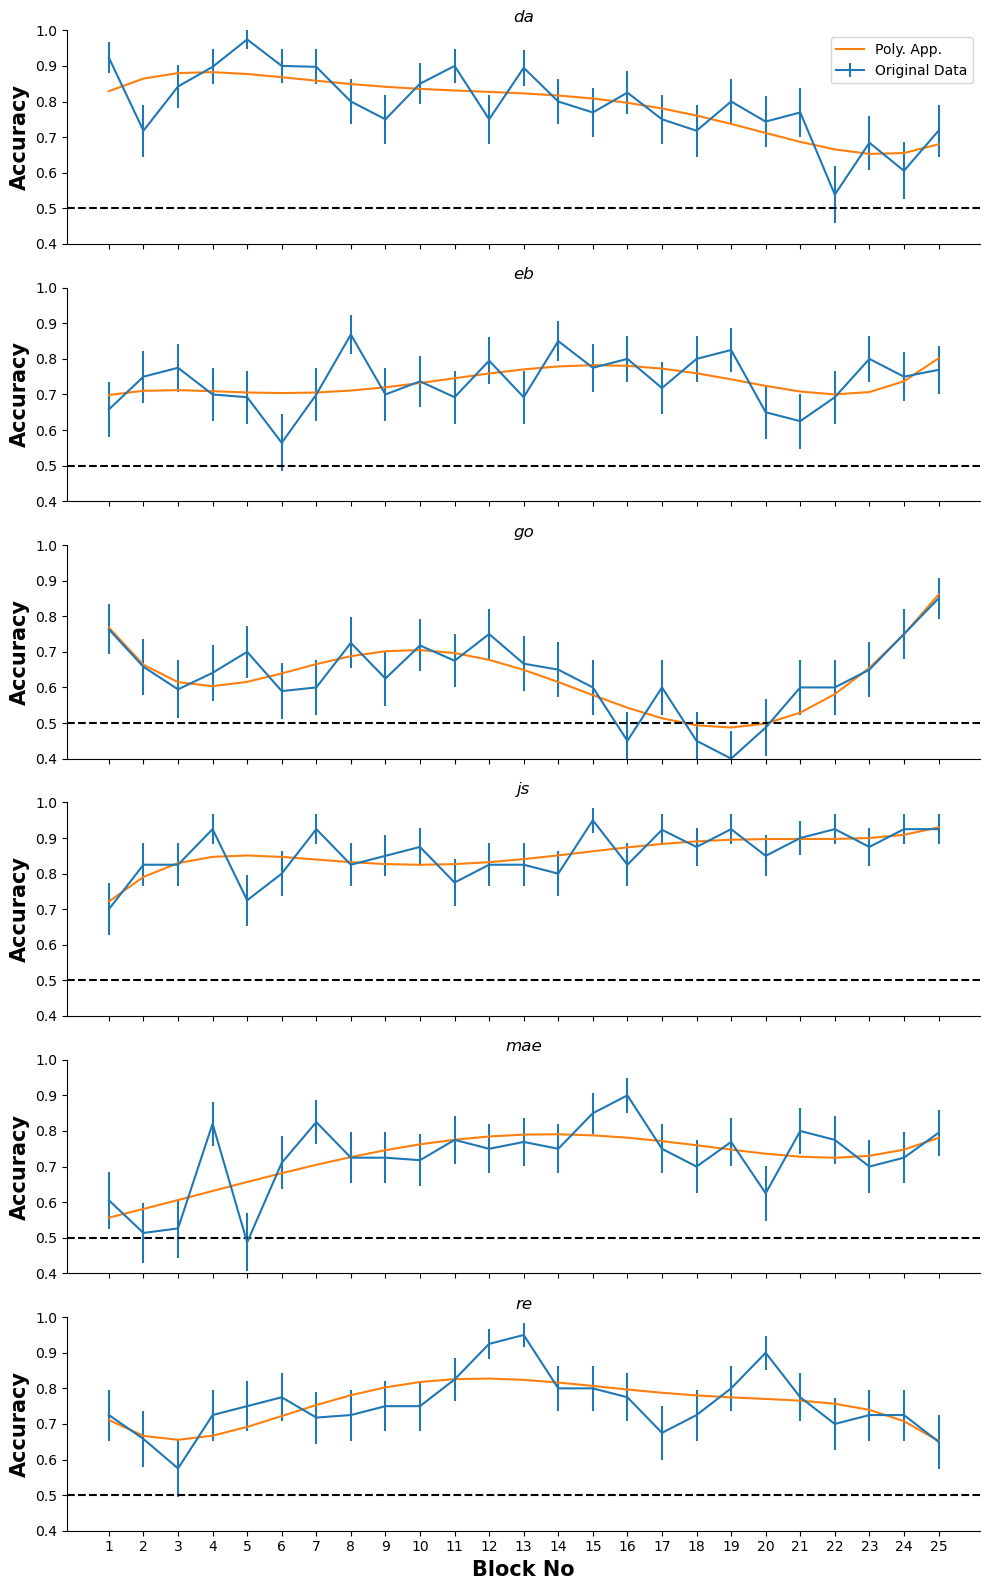

In [84]:
participants = ['re', 'js', 'mae', 'go', 'eb', 'da']
participants.sort()


fig, axes = plt.subplots(len(participants),1, figsize = (10,16), sharex=True, sharey='row')
axes = axes.ravel()

for i in range(len(participants)):    
    participantId = participants[i]
    trgt_df = df.loc[(df['participantID'] == participantId),:]

    error = trgt_df.groupby(['blockNo','control'],as_index=False)['correct'].sem()
    error_test = error.loc[(error['control'] == 0), 'correct']

    y_mean = trgt_df.groupby(['blockNo','control'],as_index=False)['correct'].mean()
    y_mean_test = y_mean.loc[(y_mean['control'] == 0),'correct']

    x = np.arange(1,len(y_mean_test) + 1)

    # Apply polynomial curve smoothing
    poly = np.polyfit(x,y_mean_test,5)
    poly_y = np.poly1d(poly)(x)

    axes[i].errorbar(x, y_mean_test, yerr = error_test, label = 'Original Data')
    axes[i].plot(x, poly_y, label = 'Poly. App.')
    
    axes[i].set_ylabel('Accuracy',  fontweight = 'bold', fontsize = 15)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].set_xticks(np.arange(1,26))
    axes[i].axhline(0.5,ls = '--', color = 'k')    
    axes[i].set_ylim(bottom = 0.4, top = 1)
    axes[i].set_title('{}'.format(participantId), style = 'italic')

axes[0].legend()
axes[-1].set_xlabel('Block No',  fontweight = 'bold', fontsize = 15)
#fig.suptitle('  Learning Curve Over Blocks \n', fontsize = 15)
plt.tight_layout()


figname = 'figs/learning.png'
plt.savefig(figname, facecolor='white', transparent=False, dpi = 300)

In [66]:
participants = ['re', 'js', 'mae', 'go', 'eb', 'da']
participants.sort()